# PLANE TİCKET PRİCE PREDİCTİON DATASET

### Uçak bileti tahmini veri setinde Hindistanın şehirleri arasında yapılan uçuşları göstermektedir. 
### Uçuş saatlerine ve iniş yerine göre fiyatlar değişebilmektedir. 
### Hava yolu şirketine göre fiyatlar değişmektedir.
### Ek uçuşlar, gün ve uçuşa dahilö olan platformlar fiyatı etkilemektedir.
### insanların bu biletlere ne kadar para harcadığını gözlemlemek amacıyla bu veri seti seçilmiştir.

In [1]:
#Kütüphaneler import edilir.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## VERİYE İLK BAKIŞ

In [2]:
df=pd.read_excel(r"C:\Users\meliha\python final\Data_Train.xlsx" )
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [3]:
df.head()
##veri setinin ilk 5 satırı gözlemlendi.

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
df.tail()
#veri setinin son 5 satırı gözlemlendi.

Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20        11:20       3h    non-stop   
10681              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753

In [5]:
df.shape
#(Row,Coloumn) burada ne kadar özelliğin ve özelliklere ait satırların olduğu sorulur.

(10683, 11)

In [6]:
df.describe()
#Veri setindeki price kısmı tanımlandı.

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [7]:
df.info()
#veri seti hakkında detaylı bilgi alnır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
#Toplamda null olan verilerin toplamı istendi.
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#Tekrar eden veri var mı kontrol edilir.
#toplam tekrar eden veriler istenir.
df.duplicated().sum()

220

In [10]:
#df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(axis=0, subset=['Total_Stops', 'Route'], inplace=True)
#Tek tek null ve tekrar eden veriler veri setinden kaldırılır. İnplace metodu ile kalıcı olarak kaldırılır.

In [11]:
df.isnull().sum()
#Eksik veriler temizlendikten sonra kontrol yapldı.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.duplicated().sum()
#Tekrar eden veriler temizlendikten sonra kontrol yapldı.

0

## VERİYİ ANLAMDIRMA

In [13]:
df.columns
#veri setindeki sütunlara göz gezdirildi.

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# COLUMNS

1. Airline = Hava yolu şirketi
2. Date_of_Journey= Seyahat edilecek tarih
3. Source= Kalkış yapılan yer
4. Destination= İnilen yer
5. Route= Uçakla nereden nereye uçuş olduğu gösteren rota
6. Dep_Time= Kalkış zamanı
7. Arrival_Time= Varış zamanı
8. Duration= Yolculuk süresi
9. Total_Stops= Toplamda kaç kere aktarma olduğu
10. Additinal_Info= Ekstra bilgi
11. Price= Uçuş ücreti

In [13]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

## VERİLERİ DÜZENLEME

### Burada düzenlememiz gereken veriler mevcuttur. Örnek olarak uçuş süresi içerisinde sayısal ve sözel ifade barındırmaktadır.

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
#Date Of Journey kısmındaki tarihleri ayrıştırıyoruz.
df['Date_of_Journey']=pd.to_datetime(df.Date_of_Journey)
df["Journey_DayName"]=df['Date_of_Journey'].dt.day_name()
df["Journey_Day"]=df["Date_of_Journey"].dt.day
df["Journey_Month"]=df["Date_of_Journey"].dt.month
df["Journey_Year"]=df["Date_of_Journey"].dt.year

df.drop('Date_of_Journey',axis=1,inplace=True)
df.drop('Journey_Day',axis=1,inplace=True)

#
# Gün adı, Gün ,Ay, Yıl ayrıştırılır.

In [16]:
df.head()
#Bu kısımda ayrıdığımız verileri görebiliriz.
#Journey_Day, Journey Month, Journey_Year vs.

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price Journey_DayName  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897          Sunday   
1         13:15   7h 25m     2 stops         No info   7662        Saturday   
2  04:25 10 Jun      19h     2 stops         No info  13882          Friday   
3         23:30   5h 25m      1 stop         No info   6218        Thursday   
4         21:35   4h 45m      1 stop         No info  13302        Thursday   

   Journey_Month  Journey_Year  
0              3          2019  
1              1          2019  
2              9          2019  
3             12          2019  
4              1          2019

In [17]:
df.Journey_Month.unique()
#toplamda 7 tane ay görünüyor bu ayları kategorik değiişknene çevirelim

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

In [18]:
def ay_ekle(x):
    if x == 1:
        return 'January'
    elif x == 3:
        return 'March'
    elif x == 4:
        return 'April'
    elif x == 5:
        return 'May'
    elif x==6:
        return 'Jun'
    elif x==9:
        return 'September'
    else:
        return 'December'

In [19]:
df['Journey_Month'] = df['Journey_Month'].apply(ay_ekle)
df.head()
#apply metoduyla aylar verisetine yazıldı.

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price Journey_DayName  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897          Sunday   
1         13:15   7h 25m     2 stops         No info   7662        Saturday   
2  04:25 10 Jun      19h     2 stops         No info  13882          Friday   
3         23:30   5h 25m      1 stop         No info   6218        Thursday   
4         21:35   4h 45m      1 stop         No info  13302        Thursday   

  Journey_Month  Journey_Year  
0         March          2019  
1       January          2019  
2     September          2019  
3      December          2019  
4       January          2019

In [20]:
df.Journey_Year.unique()
#bu veri setinde sadece tek bir yıla ait veriler var bu yüzden işimize yaramyacaktır.

array([2019], dtype=int64)

In [21]:
df.drop("Journey_Year",axis=1,inplace=True)
df.head()
#bu veri setinde sadece tek bir yıla ait veriler olduğu için siliyoruz

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price Journey_DayName  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897          Sunday   
1         13:15   7h 25m     2 stops         No info   7662        Saturday   
2  04:25 10 Jun      19h     2 stops         No info  13882          Friday   
3         23:30   5h 25m      1 stop         No info   6218        Thursday   
4         21:35   4h 45m      1 stop         No info  13302        Thursday   

  Journey_Month  
0         March  
1       January  
2     September  
3      December  
4       January

In [22]:
#Hindistan'da bizim 4 mevsimden başka mevsim de mevcuttur. bu da muson dur. 
#veri seti Hindistan'ın şehirler arası uçuşları kapsadığından mevsim eklenmesi uygun görülmüştür.
def mevsim_ekle(x):
    if x == "January" or x == "February":
        return 'Winter'
    elif x == "March" or x == "April":
        return 'Spring'
    elif x == "May" or x == "Jun":
        return 'Summer'
    elif x == "July" or x == "August":
        return 'Monsoon'
    elif x== "September" or x == "October":
        return 'Autumn'
    else:
        return 'Pre Winter'

In [23]:
#mevsimler eklendi.
df['Season'] = df['Journey_Month'].apply(mevsim_ekle)
df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price Journey_DayName  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897          Sunday   
1         13:15   7h 25m     2 stops         No info   7662        Saturday   
2  04:25 10 Jun      19h     2 stops         No info  13882          Friday   
3         23:30   5h 25m      1 stop         No info   6218        Thursday   
4         21:35   4h 45m      1 stop         No info  13302        Thursday   

  Journey_Month      Season  
0         March      Spring  
1       January      Winter  
2     September      Autumn  
3      December  Pre Winter  
4       January      Winter

In [24]:
#Dep_Time ve Arrival Time kategorik verilere çevrilir. 
#Split metodu kullanarak saat kısmı alınır.
#uçuş zamanına bir örnek olarak 18.05 olsun. bu saat akşam vakti olduğunu gösteriyor.
#bu yüzden sabah öncesi, sabah, öğle, akşam, gece ve gece yarısı değişkenleri kullanılmıştır.
def zaman(x):
    x=float(x.split(':')[0])
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [25]:
#kalkış zamanı ve varış zamanını kategorik değişken olarak değiştirildi.
df['Dep_Time']=df['Dep_Time'].apply(zaman)
df['Arrival_Time']=df['Arrival_Time'].apply(zaman)
df.head()

Airline    Source Destination                  Route       Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL          Night   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR  Early Morning   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK        Morning   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR        Evening   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL           Noon   

  Arrival_Time Duration Total_Stops Additional_Info  Price Journey_DayName  \
0   Late Night   2h 50m    non-stop         No info   3897          Sunday   
1         Noon   7h 25m     2 stops         No info   7662        Saturday   
2   Late Night      19h     2 stops         No info  13882          Friday   
3        Night   5h 25m      1 stop         No info   6218        Thursday   
4        Night   4h 45m      1 stop         No info  13302        Thursday   

  Journey_Month      Season  
0         March      Spring  
1       January      Winter  
2     September      Autumn  
3      December  Pre Winter  
4       January      Winter

In [26]:
#varış süresi hem sayısal hemde sözel veriler içermekteydi.Örnek olarak  4h 45m
#bu fonksiyonla saat*60+dakika olarak varış süresi hesaplandı.
def ayır(s):
    if len(s.split(' ')) == 2:
        h = int(s.split(' ')[0][:-1])
        m = int(s.split(' ')[1][:-1])
    else:
        if 'h' in s:
            h = int(s.split(' ')[0][:-1])
            m = 0
        elif 'm' in s:
            h = 0
            m = int(s.split(' ')[0][:-1])
    return 60 * h + m

In [27]:
#varış süresi sayısal olarak değiştirildi.
df['Duration'] = df['Duration'].apply(lambda dur:ayır(dur))
df.head()


Airline    Source Destination                  Route       Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL          Night   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR  Early Morning   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK        Morning   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR        Evening   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL           Noon   

  Arrival_Time  Duration Total_Stops Additional_Info  Price Journey_DayName  \
0   Late Night       170    non-stop         No info   3897          Sunday   
1         Noon       445     2 stops         No info   7662        Saturday   
2   Late Night      1140     2 stops         No info  13882          Friday   
3        Night       325      1 stop         No info   6218        Thursday   
4        Night       285      1 stop         No info  13302        Thursday   

  Journey_Month      Season  
0         March      Spring  
1       January      Winter  
2     September      Autumn  
3      December  Pre Winter  
4       January      Winter

In [28]:
#bu kısımda route değişkeni gereksiz bir özellik olarak bulunmaktadır. 128 adet unique değer bulunmaktadır.
df.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [29]:
df.drop(["Route"],axis=1,inplace=True)
df.head()
#Route değişkeni verisetinden silindi.

Airline    Source Destination       Dep_Time Arrival_Time  Duration  \
0       IndiGo  Banglore   New Delhi          Night   Late Night       170   
1    Air India   Kolkata    Banglore  Early Morning         Noon       445   
2  Jet Airways     Delhi      Cochin        Morning   Late Night      1140   
3       IndiGo   Kolkata    Banglore        Evening        Night       325   
4       IndiGo  Banglore   New Delhi           Noon        Night       285   

  Total_Stops Additional_Info  Price Journey_DayName Journey_Month      Season  
0    non-stop         No info   3897          Sunday         March      Spring  
1     2 stops         No info   7662        Saturday       January      Winter  
2     2 stops         No info  13882          Friday     September      Autumn  
3      1 stop         No info   6218        Thursday      December  Pre Winter  
4      1 stop         No info  13302        Thursday       January      Winter

In [30]:
df.Airline = pd.Categorical(df.Airline)
df.Source = pd.Categorical(df.Source)
df.Destination = pd.Categorical(df.Destination)
df.Dep_Time=pd.Categorical(df.Dep_Time)
df.Arrival_Time=pd.Categorical(df.Arrival_Time)
df.Total_Stops=pd.Categorical(df.Total_Stops)
df.Additional_Info = pd.Categorical(df.Additional_Info)
df.Journey_DayName=pd.Categorical(df.Journey_DayName)
df.Season=pd.Categorical(df.Season)
df.Journey_Month=pd.Categorical(df.Journey_Month)
df.info()
#Object olarak görünen kategorik veriler kategori sınıfna alındı.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Airline          10462 non-null  category
 1   Source           10462 non-null  category
 2   Destination      10462 non-null  category
 3   Dep_Time         10462 non-null  category
 4   Arrival_Time     10462 non-null  category
 5   Duration         10462 non-null  int64   
 6   Total_Stops      10462 non-null  category
 7   Additional_Info  10462 non-null  category
 8   Price            10462 non-null  int64   
 9   Journey_DayName  10462 non-null  category
 10  Journey_Month    10462 non-null  category
 11  Season           10462 non-null  category
dtypes: category(10), int64(2)
memory usage: 350.1 KB


## KATEGORİK DEĞİŞKEN ÖZETLERİ 

In [83]:
df["Airline"].unique()
# Hava yolu şirketleri indirgenir

['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', ..., 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet']
Length: 12
Categories (12, object): ['Air Asia', 'Air India', 'GoAir', 'IndiGo', ..., 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy']

In [31]:
df.Airline.value_counts()
#Hava yolu şirketlerinin toplam uçuşları indirgenir.

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [32]:
df.Airline.value_counts().count()

12

In [33]:
En_yuksek=df.groupby("Airline",as_index=False).agg({"Price":"max"}).sort_values(by="Price", ascending= False).head(10)
En_yuksek
#En pahalı havayolu şirketin jet airways business olduğu görülür.

Airline  Price
5                Jet Airways Business  79512
4                         Jet Airways  54826
6                   Multiple carriers  36983
1                           Air India  31945
8                            SpiceJet  23267
2                               GoAir  22794
3                              IndiGo  22153
10                            Vistara  21730
7   Multiple carriers Premium economy  14629
0                            Air Asia  13774

In [34]:
df["Source"].unique()
# Kalkış yerleri indirgenir

['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
Categories (5, object): ['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']

In [36]:
df.Source.value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [37]:
df.Source.value_counts().count()

5

In [38]:
df["Destination"].unique()
# Varış yeri indirgenir

['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']
Categories (6, object): ['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']

In [39]:
df["Destination"].value_counts()
#varış yerine inen toplam uçaklar indirgenir.

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [40]:
df["Destination"].value_counts().count()
#varış yeri olarak kaç tane şehir var o tespit edildi.

6

In [41]:
En_yuksek=df.groupby("Destination",as_index=False).agg({"Price":"max"}).sort_values(by="Price", ascending= False).head(10)
En_yuksek

Destination  Price
5   New Delhi  79512
1      Cochin  52285
0    Banglore  31945
3   Hyderabad  25139
4     Kolkata  19630
2       Delhi   8541

In [42]:
df["Additional_Info"].unique()
# EKstra bilgi varsa bunu indirger

['No info', 'In-flight meal not included', 'No check-in baggage included', '1 Short layover', 'No Info', '1 Long layover', 'Change airports', 'Business class', 'Red-eye flight', '2 Long layover']
Categories (10, object): ['1 Long layover', '1 Short layover', '2 Long layover', 'Business class', ..., 'No Info', 'No check-in baggage included', 'No info', 'Red-eye flight']

In [43]:
df.Additional_Info.value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [44]:
df.Additional_Info.value_counts().count()

10

In [45]:
En_yuksek=df.groupby("Additional_Info",as_index=False).agg({"Price":"max"}).sort_values(by="Price", ascending= False).head(10)
En_yuksek

Additional_Info  Price
3                Business class  79512
8                       No info  54826
0                1 Long layover  31825
1               1 Short layover  26743
2                2 Long layover  26480
4               Change airports  26092
5   In-flight meal not included  19644
9                Red-eye flight  10873
6                       No Info   8153
7  No check-in baggage included   6356

In [46]:
df["Total_Stops"].unique()
# Toplam aktarma sayıları indirgenir

['non-stop', '2 stops', '1 stop', '3 stops', '4 stops']
Categories (5, object): ['1 stop', '2 stops', '3 stops', '4 stops', 'non-stop']

In [47]:
df["Total_Stops"]. value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [48]:
df["Total_Stops"]. value_counts().count()

5

In [49]:
df.Dep_Time.unique()
#uçuş kalkış zamanları indirgenir.

['Night', 'Early Morning', 'Morning', 'Evening', 'Noon', 'Late Night']
Categories (6, object): ['Early Morning', 'Evening', 'Late Night', 'Morning', 'Night', 'Noon']

In [50]:
df.Dep_Time.value_counts()
#bu vakitlerde yapılan uçuşlar indirgenir.

Early Morning    2814
Evening          2323
Morning          2170
Noon             1696
Night             995
Late Night        464
Name: Dep_Time, dtype: int64

In [51]:
En_yuksek=df.groupby("Dep_Time",as_index=False).agg({"Price":"max"}).sort_values(by="Price", ascending= False).head(10)
En_yuksek

Dep_Time  Price
0  Early Morning  79512
3        Morning  57209
1        Evening  54826
4          Night  54826
5           Noon  54826
2     Late Night  29528

In [52]:
df.Arrival_Time.unique()
#varış zamanı indirgenir

['Late Night', 'Noon', 'Night', 'Morning', 'Early Morning', 'Evening']
Categories (6, object): ['Early Morning', 'Evening', 'Late Night', 'Morning', 'Night', 'Noon']

In [53]:
df.Arrival_Time.value_counts()
#bu saatlerde biten uçuşlar indirgenir.

Evening          2631
Morning          2121
Night            1828
Late Night       1734
Noon             1149
Early Morning     999
Name: Arrival_Time, dtype: int64

In [54]:
df.Season.unique()
#mevsilerde yapılan uçuşlar indirgenir.

['Spring', 'Winter', 'Autumn', 'Pre Winter', 'Summer']
Categories (5, object): ['Autumn', 'Pre Winter', 'Spring', 'Summer', 'Winter']

In [55]:
df.Season.value_counts()
#bu mevsimlerde yapılan uçuşlar indirgenir.

Summer        4490
Spring        2593
Autumn        1375
Winter        1058
Pre Winter     946
Name: Season, dtype: int64

In [56]:
df.Journey_DayName.unique()
#hangi günler uçuş yapıldı.

['Sunday', 'Saturday', 'Friday', 'Thursday', 'Monday', 'Tuesday', 'Wednesday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [57]:
df.Journey_DayName.value_counts()
#bu günlerde yapılan 

Thursday     2231
Friday       1781
Wednesday    1579
Monday       1451
Tuesday      1217
Saturday     1168
Sunday       1035
Name: Journey_DayName, dtype: int64

In [58]:
df.Journey_Month.unique()
#hangi aylarda uçuş yapıldı.

['March', 'January', 'September', 'December', 'Jun', 'May', 'April']
Categories (7, object): ['April', 'December', 'January', 'Jun', 'March', 'May', 'September']

In [59]:
df.Journey_Month.value_counts()
#bu aylarda yapılan toplam uçuşlar belirlenir.

Jun          2465
March        2169
May          2025
September    1375
January      1058
December      946
April         424
Name: Journey_Month, dtype: int64

# # SÜREKLİ DEĞİŞKEN ÖZETİ

In [60]:
df.info()
#2 tane int, diğerlerinin kategori olduğu görülür.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Airline          10462 non-null  category
 1   Source           10462 non-null  category
 2   Destination      10462 non-null  category
 3   Dep_Time         10462 non-null  category
 4   Arrival_Time     10462 non-null  category
 5   Duration         10462 non-null  int64   
 6   Total_Stops      10462 non-null  category
 7   Additional_Info  10462 non-null  category
 8   Price            10462 non-null  int64   
 9   Journey_DayName  10462 non-null  category
 10  Journey_Month    10462 non-null  category
 11  Season           10462 non-null  category
dtypes: category(10), int64(2)
memory usage: 350.1 KB


In [61]:
Df= df.select_dtypes(include = ["int64"])
Df.head()
#int tipinde değikenleri seçtik gözlemliyoruz.

Duration  Price
0       170   3897
1       445   7662
2      1140  13882
3       325   6218
4       285  13302

In [62]:
Df.describe().T
#daha da yakından gözlemleyelim.

count         mean          std     min     25%     50%       75%  \
Duration  10462.0   629.781591   500.699045     5.0   170.0   505.0    910.00   
Price     10462.0  9026.790289  4624.849541  1759.0  5224.0  8266.0  12344.75   

              max  
Duration   2860.0  
Price     79512.0

In [63]:
print("Ortalama: " + str(Df["Duration"].mean()))
print("Dolu Gözlem Sayısı: " + str(Df["Duration"].count())) 
print("Maksimum Değer: " + str(Df["Duration"].max()))
print("Minimum Değer: " + str(Df["Duration"].min()))
print("Medyan: " + str(Df["Duration"].median()))
print("Standart Sapma: " + str(Df["Duration"].std()))
#uçuş süresinin ortlama, gözlem sayısı,max değeri,min değeri,medyanı ve standart sapması ölçülür.

Ortalama: 629.7815905180654
Dolu Gözlem Sayısı: 10462
Maksimum Değer: 2860
Minimum Değer: 5
Medyan: 505.0
Standart Sapma: 500.699045408201


In [64]:
print("Ortalama: " + str(Df["Price"].mean()))
print("Dolu Gözlem Sayısı: " + str(Df["Price"].count())) 
print("Maksimum Değer: " + str(Df["Price"].max()))
print("Minimum Değer: " + str(Df["Price"].min()))
print("Medyan: " + str(Df["Price"].median()))
print("Standart Sapma: " + str(Df["Price"].std()))
#ücretin ortlama, gözlem sayısı,max değeri,min değeri,medyanı ve standart sapması ölçülür.

Ortalama: 9026.790288663735
Dolu Gözlem Sayısı: 10462
Maksimum Değer: 79512
Minimum Değer: 1759
Medyan: 8266.0
Standart Sapma: 4624.849540590443


## DAĞILIM GRAFİKLERİ

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Airline          10462 non-null  category
 1   Source           10462 non-null  category
 2   Destination      10462 non-null  category
 3   Dep_Time         10462 non-null  category
 4   Arrival_Time     10462 non-null  category
 5   Duration         10462 non-null  int64   
 6   Total_Stops      10462 non-null  category
 7   Additional_Info  10462 non-null  category
 8   Price            10462 non-null  int64   
 9   Journey_DayName  10462 non-null  category
 10  Journey_Month    10462 non-null  category
 11  Season           10462 non-null  category
dtypes: category(10), int64(2)
memory usage: 350.1 KB


#####  ORDİNAL TANIMLAMA

In [35]:
#ordinal tanımlama 
from pandas.api.types import CategoricalDtype

In [36]:
df.Total_Stops.value_counts()
#total stops la ilgili toplam uçuşlar indirgendi
#birbiri ardınca değerlere sahip
#0 ,1,2,3,4 gibi

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
df.Dep_Time.value_counts()
#uçuş yapılan zamanda toplam kaç uçuş gerçekleşti ve bunlar hangi zamanlar...
#bu zamanlar arasında bir ilişki var 

Early Morning    2814
Evening          2323
Morning          2170
Noon             1696
Night             995
Late Night        464
Name: Dep_Time, dtype: int64

In [38]:
df.Arrival_Time.value_counts()
#iniş yerine varıldığı zamanda toplam kaç uçuş gerçekleşti ve bunlar hangi zamanlar...
#bu zamanlar arasında bir ilişki var 

Evening          2631
Morning          2121
Night            1828
Late Night       1734
Noon             1149
Early Morning     999
Name: Arrival_Time, dtype: int64

In [39]:
df.Total_Stops = df.Total_Stops.astype(CategoricalDtype(ordered = True)) 
df.dtypes
#burada total stopsta bulunan değişkenleri sıralı bir şekilde ele aldık

Airline            category
Source             category
Destination        category
Dep_Time           category
Arrival_Time       category
Duration              int64
Total_Stops        category
Additional_Info    category
Price                 int64
Journey_DayName    category
Journey_Month      category
Season             category
dtype: object

In [40]:
df.Total_Stops.head()
#burada baktığımızda beklediğimiz gibi bir sıralama olmamış

0    non-stop
1     2 stops
2     2 stops
3      1 stop
4      1 stop
Name: Total_Stops, dtype: category
Categories (5, object): ['1 stop' < '2 stops' < '3 stops' < '4 stops' < 'non-stop']

In [41]:
Stops_kategoriler = ["non-stop","1 stop","2 stops","3 stops","4 stops"]
df.Total_Stops = df.Total_Stops.astype(CategoricalDtype(categories = Stops_kategoriler, ordered = True))
df.Total_Stops.head()
#kendimiz sıralı halini yazdıktan sonra tekrar düzenledik

0    non-stop
1     2 stops
2     2 stops
3      1 stop
4      1 stop
Name: Total_Stops, dtype: category
Categories (5, object): ['non-stop' < '1 stop' < '2 stops' < '3 stops' < '4 stops']

In [42]:
df.Dep_Time = df.Dep_Time.astype(CategoricalDtype(ordered = True)) 
df.Dep_Time.head()
##burada dep_time da bulunan değişkenleri sıralı bir şekilde ele aldık
#burada baktığımızda beklediğimiz gibi bir sıralama olmamış

0            Night
1    Early Morning
2          Morning
3          Evening
4             Noon
Name: Dep_Time, dtype: category
Categories (6, object): ['Early Morning' < 'Evening' < 'Late Night' < 'Morning' < 'Night' < 'Noon']

In [43]:
Dep_kategoriler = ["Early Morning","Morning","Noon","Evening","Night","Late Night"]
df.Dep_Time = df.Dep_Time.astype(CategoricalDtype(categories = Dep_kategoriler, ordered = True))
df.Dep_Time.head()
#kendimiz sıralı halini yazdıktan sonra tekrar düzenledik

0            Night
1    Early Morning
2          Morning
3          Evening
4             Noon
Name: Dep_Time, dtype: category
Categories (6, object): ['Early Morning' < 'Morning' < 'Noon' < 'Evening' < 'Night' < 'Late Night']

In [44]:
df.Arrival_Time = df.Arrival_Time.astype(CategoricalDtype(ordered = True)) 
df.Arrival_Time.head()
##burada arrival time da bulunan değişkenleri sıralı bir şekilde ele aldık
#burada baktığımızda beklediğimiz gibi bir sıralama olmamış

0    Late Night
1          Noon
2    Late Night
3         Night
4         Night
Name: Arrival_Time, dtype: category
Categories (6, object): ['Early Morning' < 'Evening' < 'Late Night' < 'Morning' < 'Night' < 'Noon']

In [45]:
Arr_kategoriler = ["Early Morning","Morning","Noon","Evening","Night","Late Night"]
df.Arrival_Time = df.Arrival_Time.astype(CategoricalDtype(categories = Arr_kategoriler, ordered = True))
df.Arrival_Time.head()
#kendimiz sıralı halini yazdıktan sonra tekrar düzenledik

0    Late Night
1          Noon
2    Late Night
3         Night
4         Night
Name: Arrival_Time, dtype: category
Categories (6, object): ['Early Morning' < 'Morning' < 'Noon' < 'Evening' < 'Night' < 'Late Night']

## BARPLOT SUTÜN GRAFİĞİ

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Source', ylabel='count'>

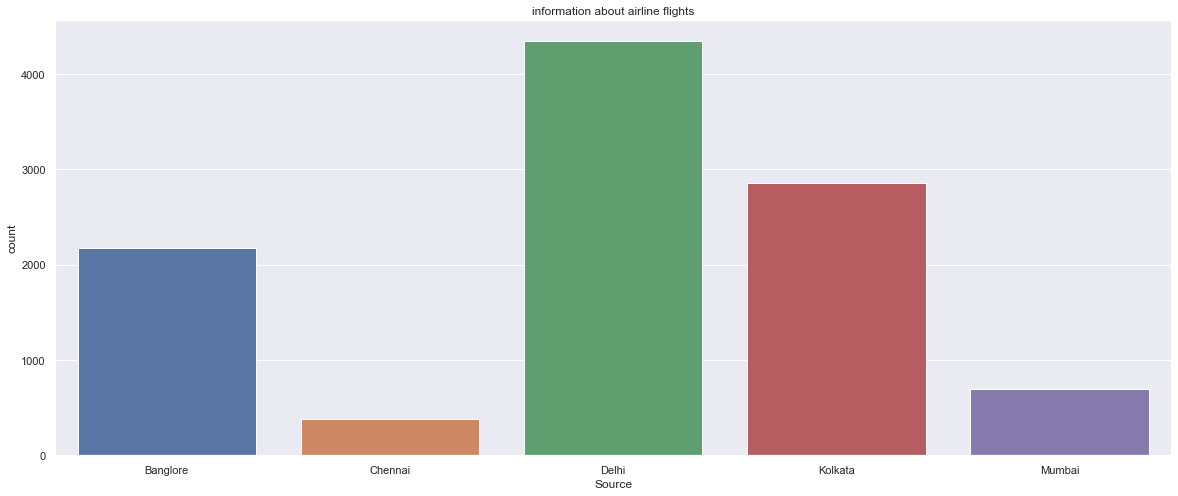

In [47]:
#uçuş yerlerine göre uçuş sayısı gözlemleme
#en çok uçuş yapılan yer Delhi olmuştur.
sns.set()
plt.figure(figsize=(20,8))
plt.xlabel("Source")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.countplot(x=df.Source, data=df)

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Destination', ylabel='count'>

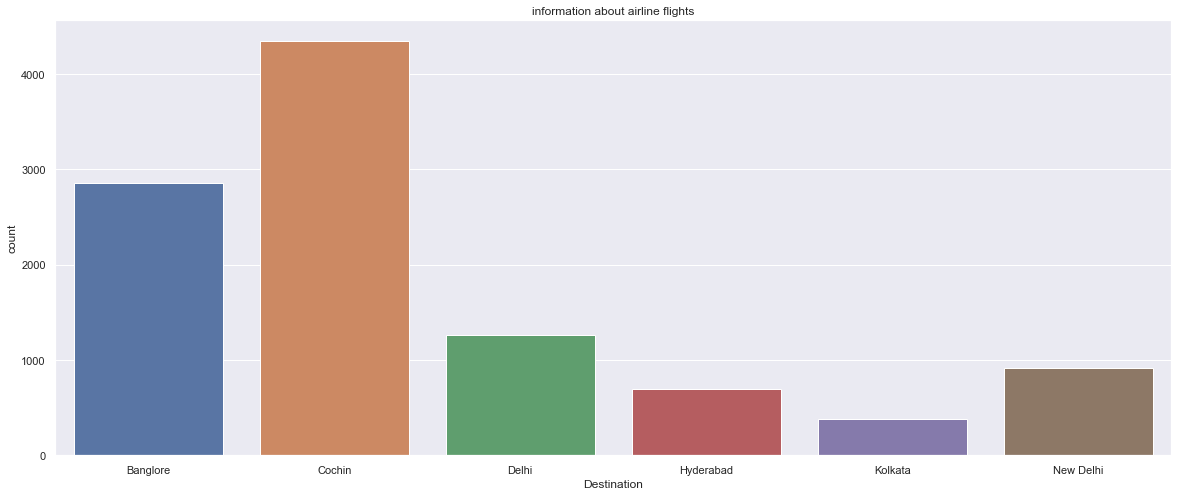

In [49]:
# Cochin bölgesine çok sayıda uçuş var.
# En az da Kolkataya uçuş var.
sns.set()
plt.figure(figsize=(20,8))
plt.xlabel("Destination")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.countplot(x=df.Destination, data=df)

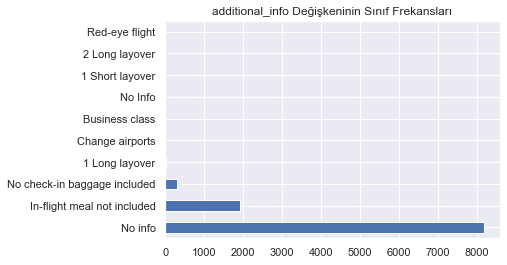

In [50]:
df["Additional_Info"].value_counts().plot.barh().set_title("additional_info Değişkeninin Sınıf Frekansları");

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Additional_Info', ylabel='count'>

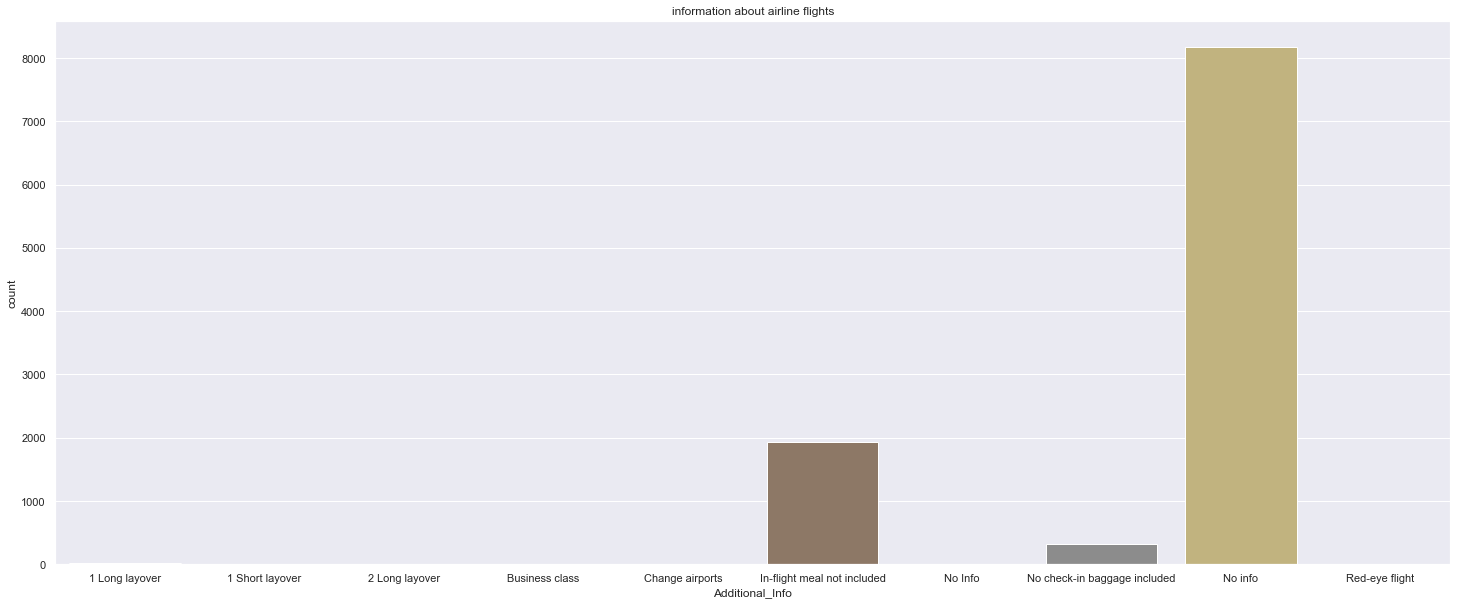

In [51]:
#uçuşla ilgili ekstra bilgiler incelendi, hiç bir ek özelliği bulunmayan uçuşlar tercih edilmiştir.
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Additonal_Information")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.countplot(x=df.Additional_Info, data=df)

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Total_Stops', ylabel='count'>

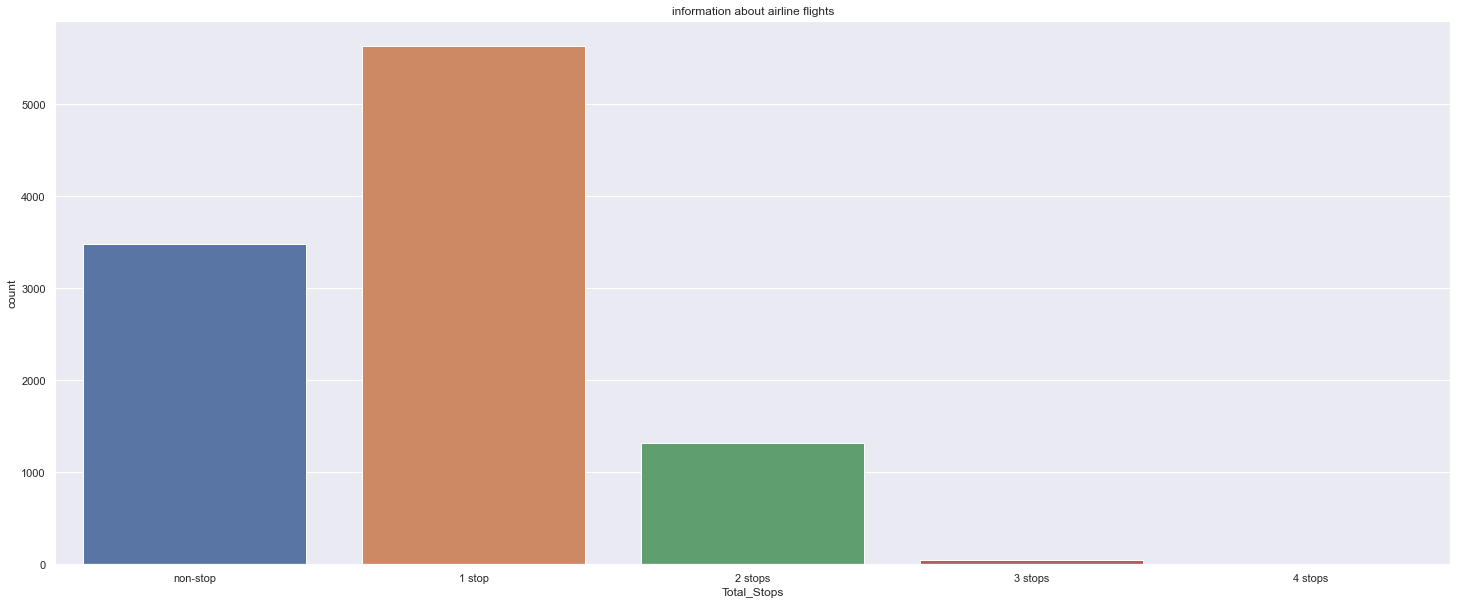

In [52]:
#burada uçuşla ilgili uçak gideceği yere en fazla 4 kere durarak gitmiş
#lakin en çok uçuş 1 kere duran uçuşlar olmuştur.
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Total_Stops")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.countplot(x=df.Total_Stops, data=df)

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Dep_Time', ylabel='count'>

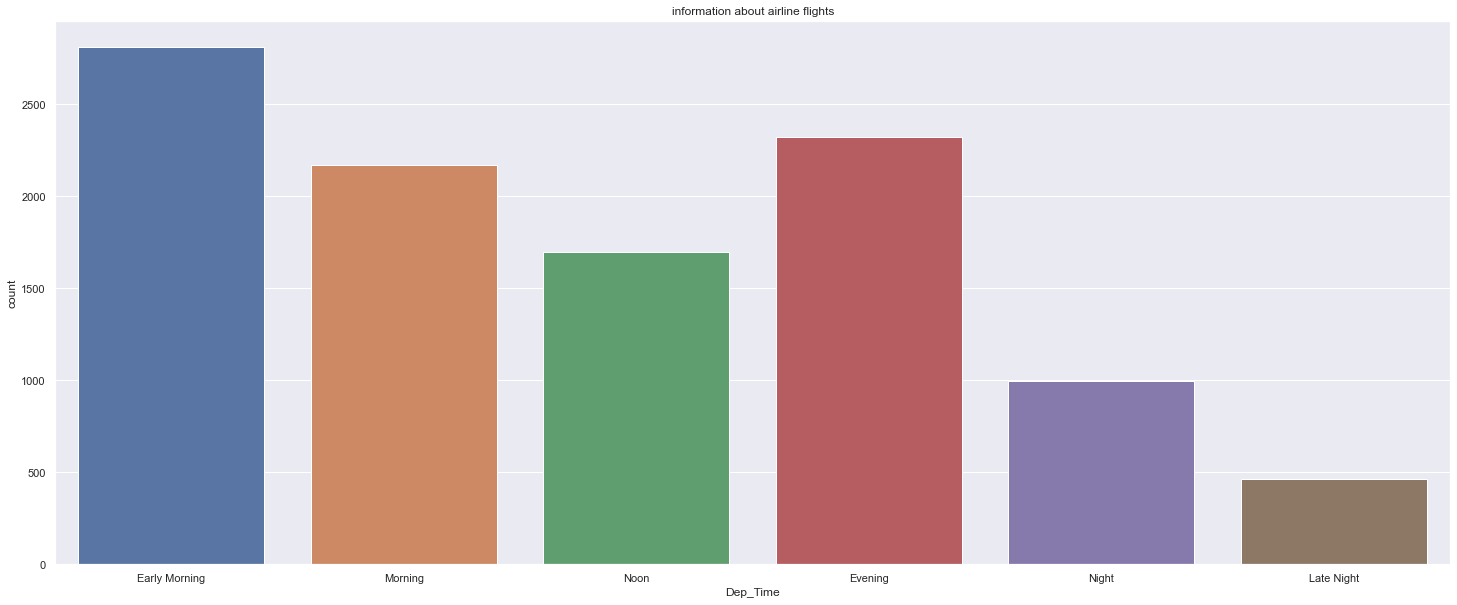

In [53]:
#uçuş zamanı incelendiğinde en çok sabahın erken saatlerinde uçuş olduğu gözlemlendi.
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Dep_Time")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.countplot(x=df.Dep_Time, data=df)

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Arrival_Time', ylabel='count'>

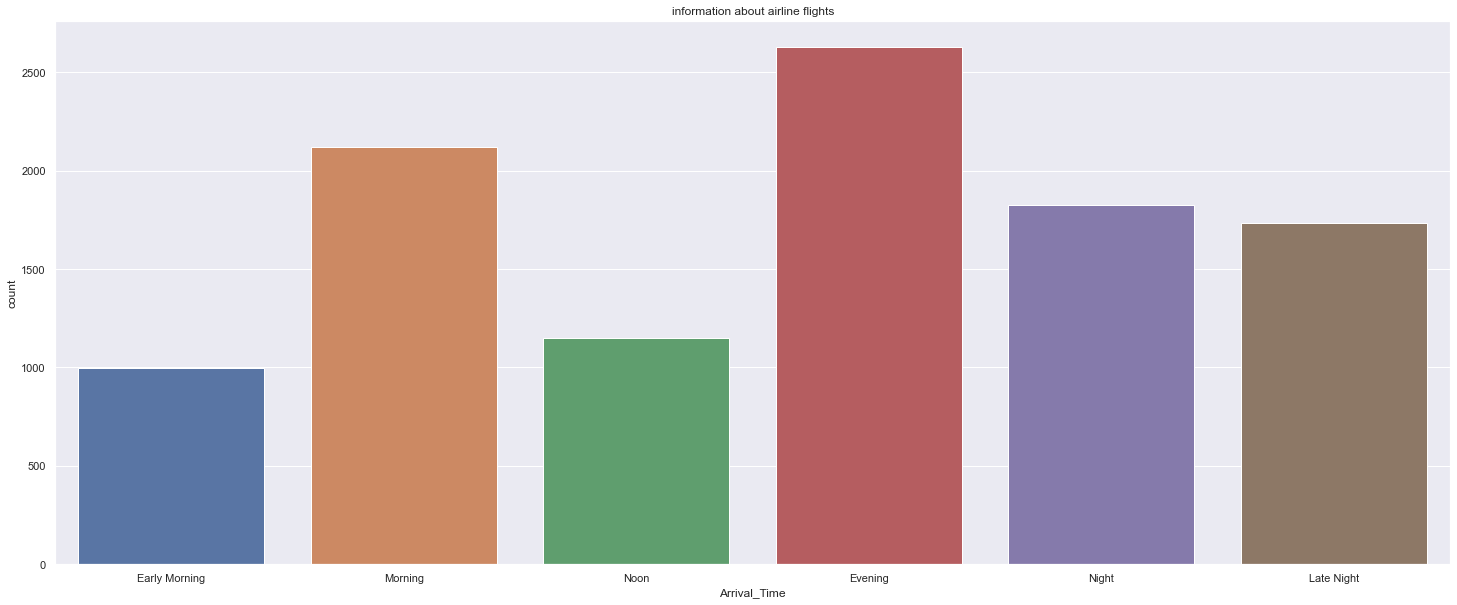

In [54]:
#varış zamanı incelendiğinde en çok akaşam saatlerinde uçuş olduğu gözlemlendi.
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Arrival_Time")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.countplot(x=df.Arrival_Time, data=df)

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Journey_DayName', ylabel='count'>

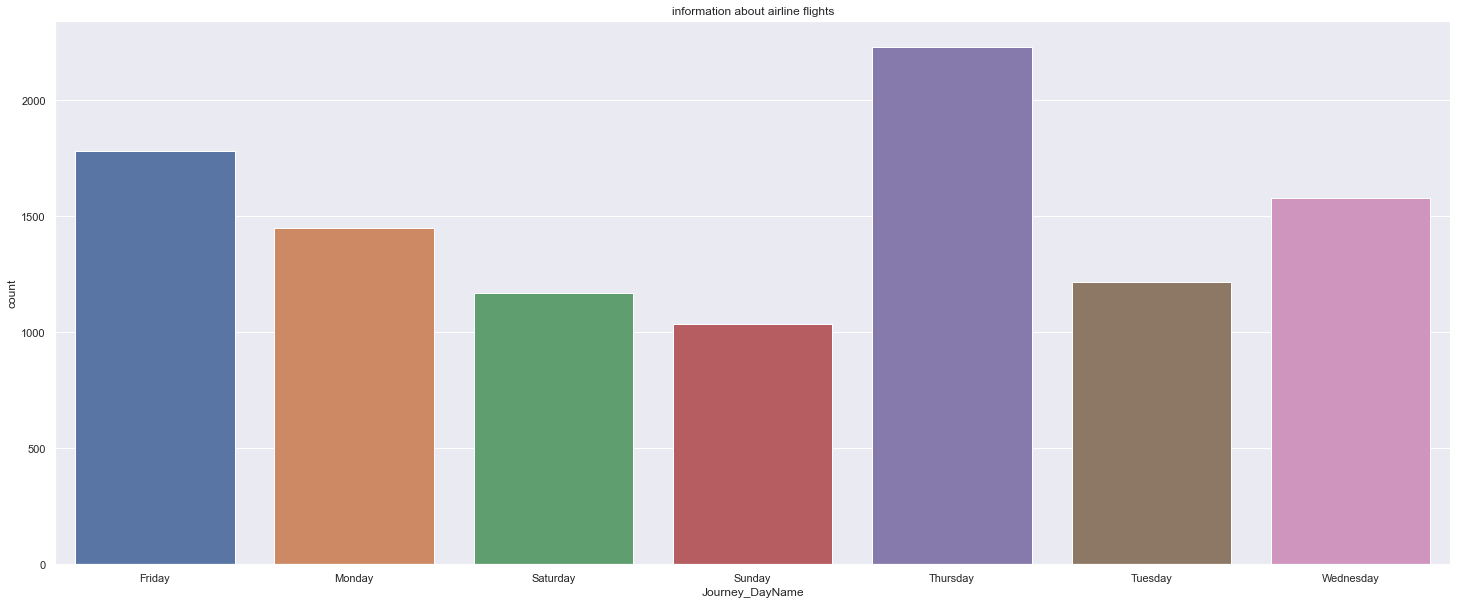

In [55]:
#uçuş yapılan günler incelendiğinde en çok perşembe günü uçuş olduğu görülür.
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Day_Name")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.countplot(x=df.Journey_DayName, data=df)

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Season', ylabel='count'>

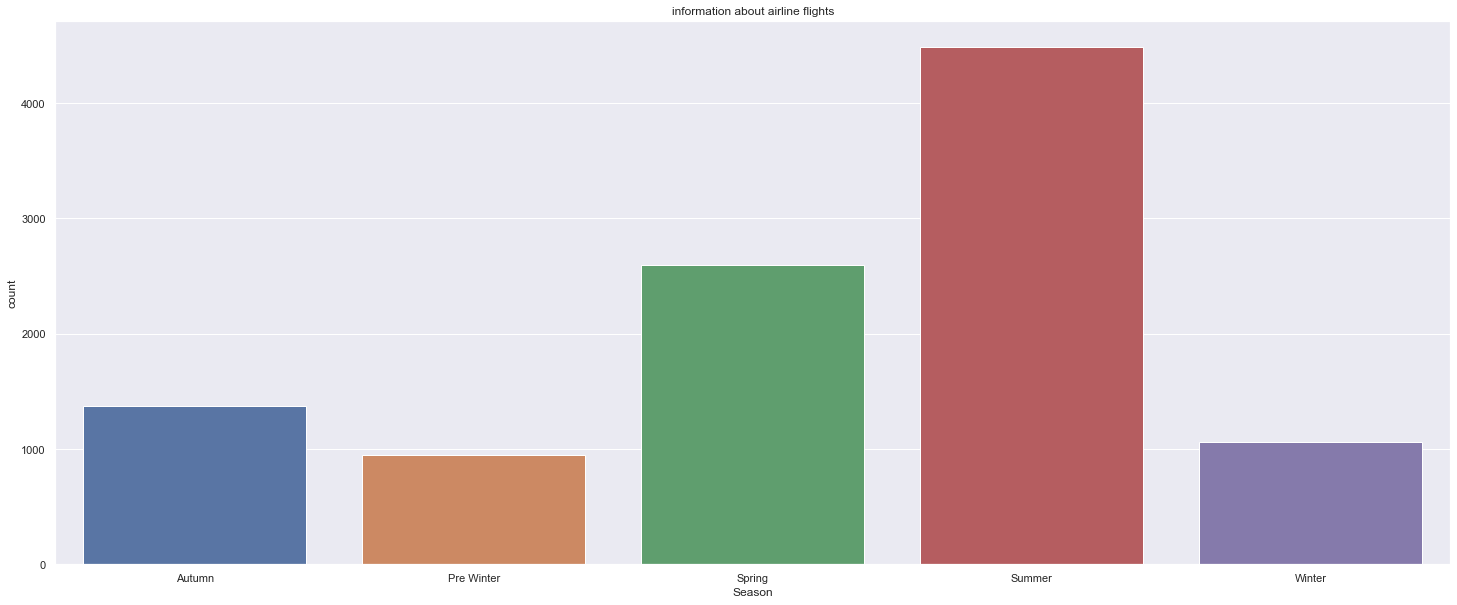

In [56]:
#mevsimlerde yapılan uçuşlar incelendiğinde en çok yazın uçuş olmuş
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Season")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.countplot(x=df.Season, data=df)

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Journey_Month', ylabel='count'>

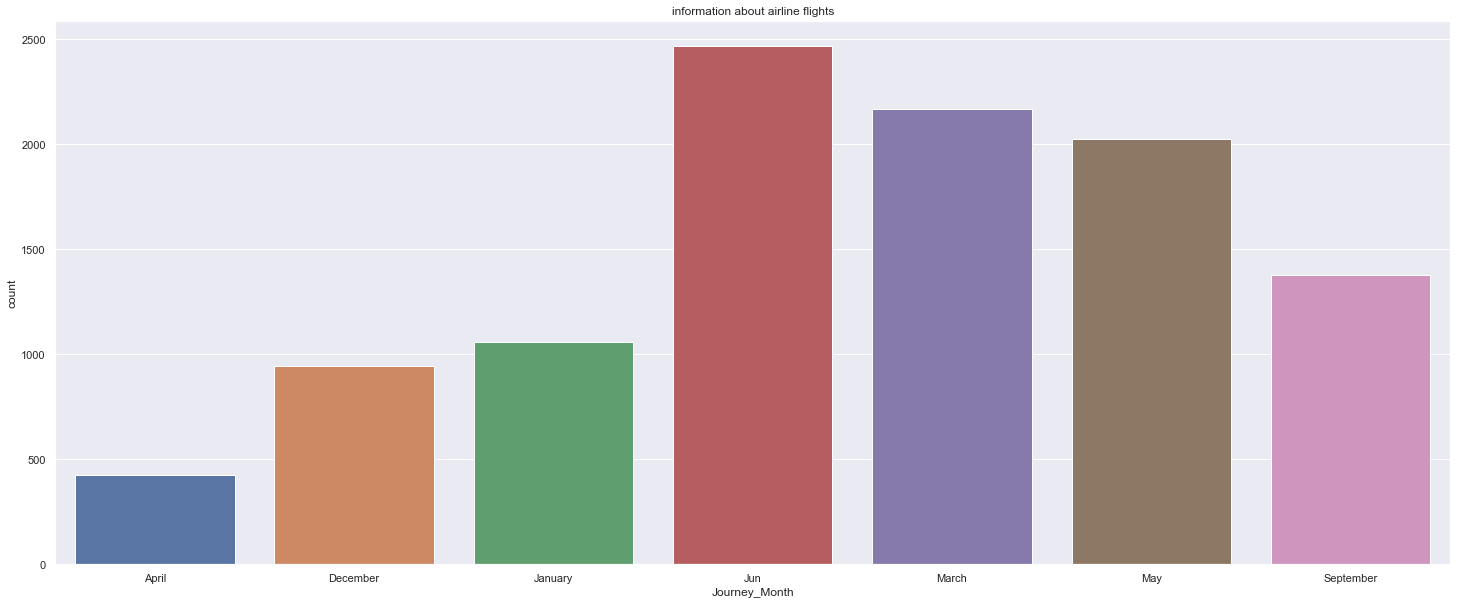

In [57]:
#en çok yapılan uçuşlar haziran ayında yapılmıştır.
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Journey_Month")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.countplot(x=df.Journey_Month, data=df)

## SÜTUN GRAFİKLERİNİN ÇAPRAZLANMASI

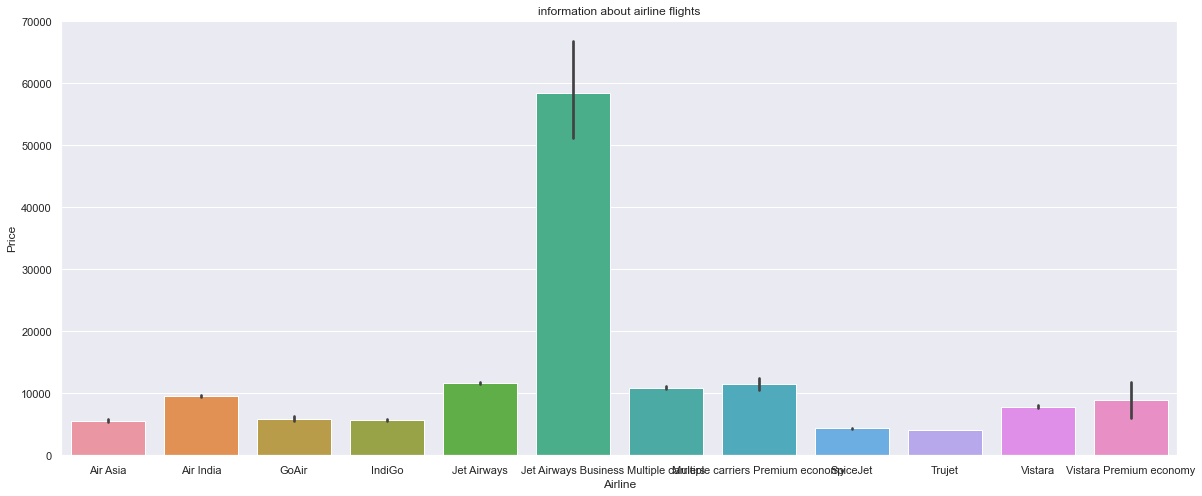

In [58]:
#hava yolu şirketleri ile bilet ücreti arasındaki ilişki gözlemlendi.
#Jet airway business en pahalı hava yolu şirketidir.
sns.set()
plt.figure(figsize=(20,8))
plt.xlabel("Airline")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Airline, y=df.Price)
plt.show()

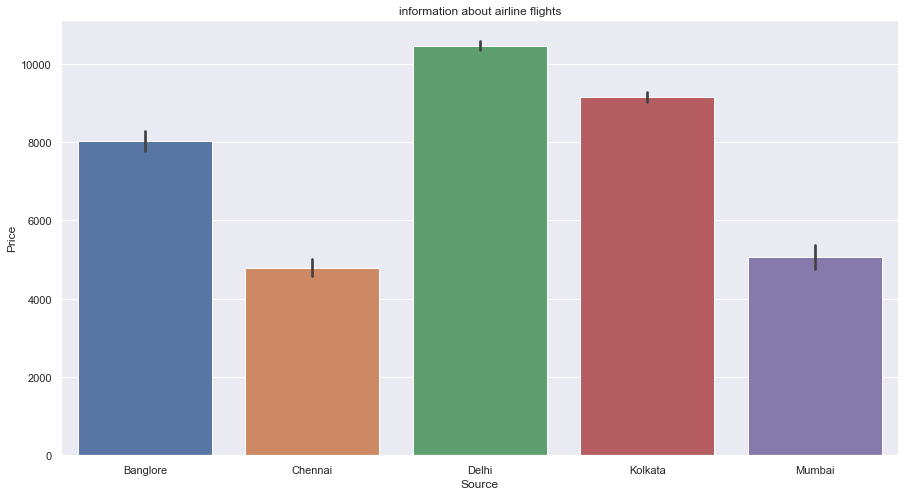

In [59]:
#uçuş yapılan yer ile bilet ücreti arasındaki ilişki gözlemlendi.
#delhide yapılan uçuşlar daha pahalı.
sns.set()
plt.figure(figsize=(15,8))
plt.xlabel("Source")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Source, y=df.Price)
plt.show()

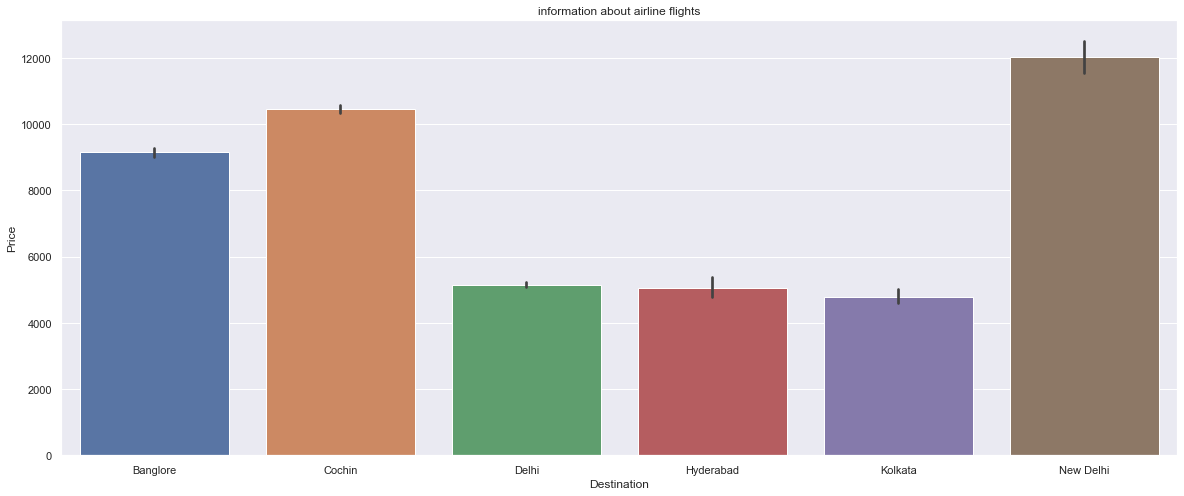

In [60]:
#varış yerleri ile bilet ücreti arasındaki ilişki gözlemlendi.
#New Delhiye yapılan uçuşlar pahalı
sns.set()
plt.figure(figsize=(20,8))
plt.xlabel("Destination")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Destination, y=df.Price)
plt.show()

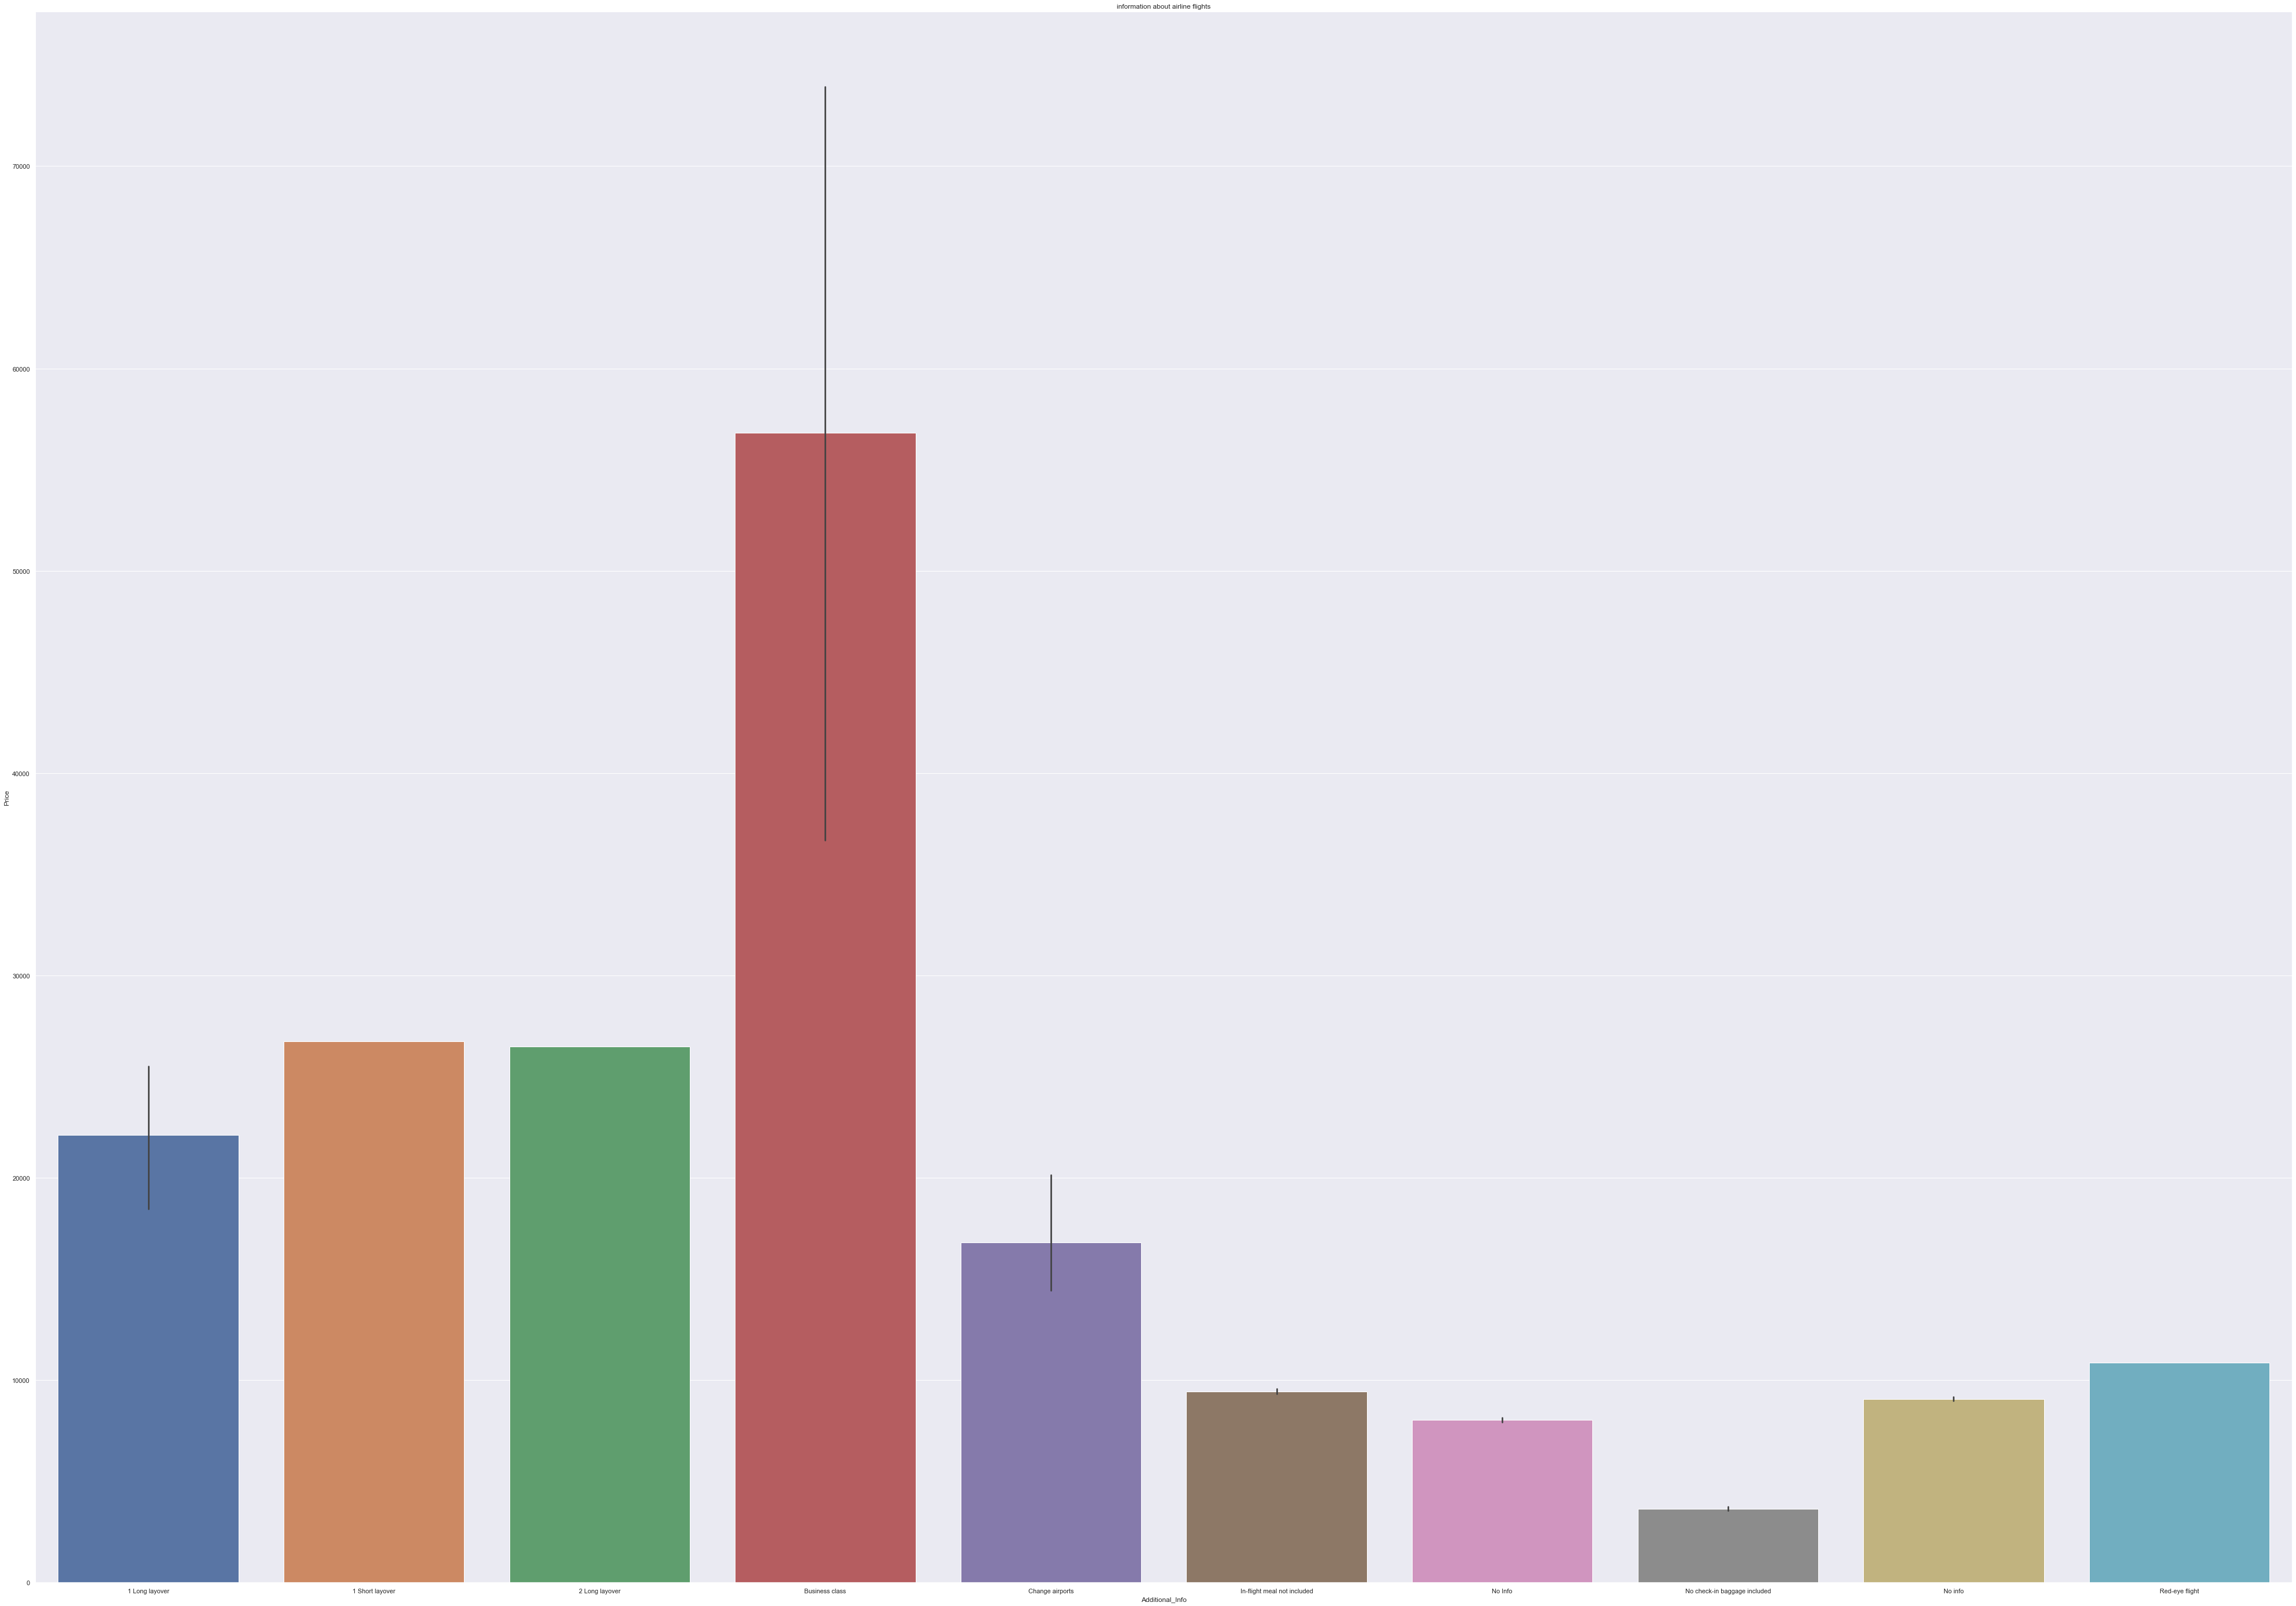

In [61]:
#uçuşa eklenen özellikler ile bilet ücreti arasındaki ilişki gözlemlendi.
#Business class en pahalı sınıf
sns.set()
plt.figure(figsize=(70,50))
plt.xlabel("Additional_Information")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Additional_Info,y=df.Price)
plt.show()

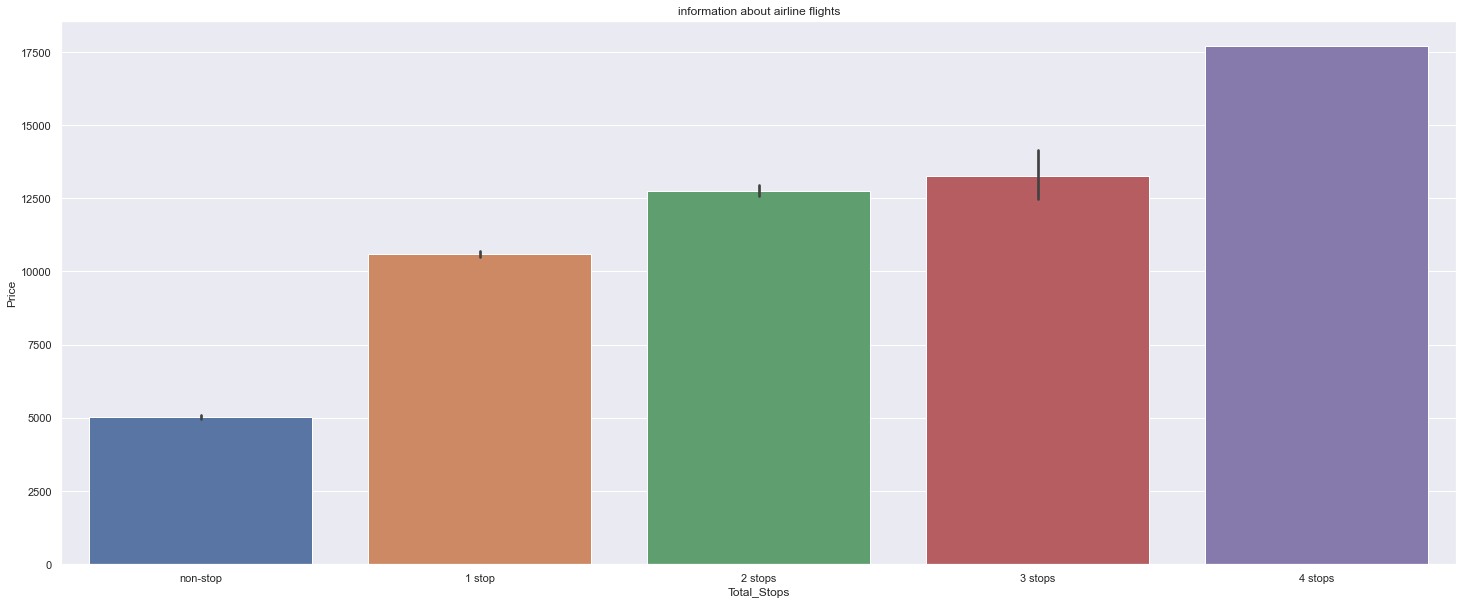

In [62]:
#totalde durarak ilereleyen uçuşlar ile bilet ücreti arasındaki ilişki gözlemlendi.
#4 defa duran uçuşlar en pahalıdır.
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Total_Stops")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Total_Stops,y=df.Price)
plt.show()

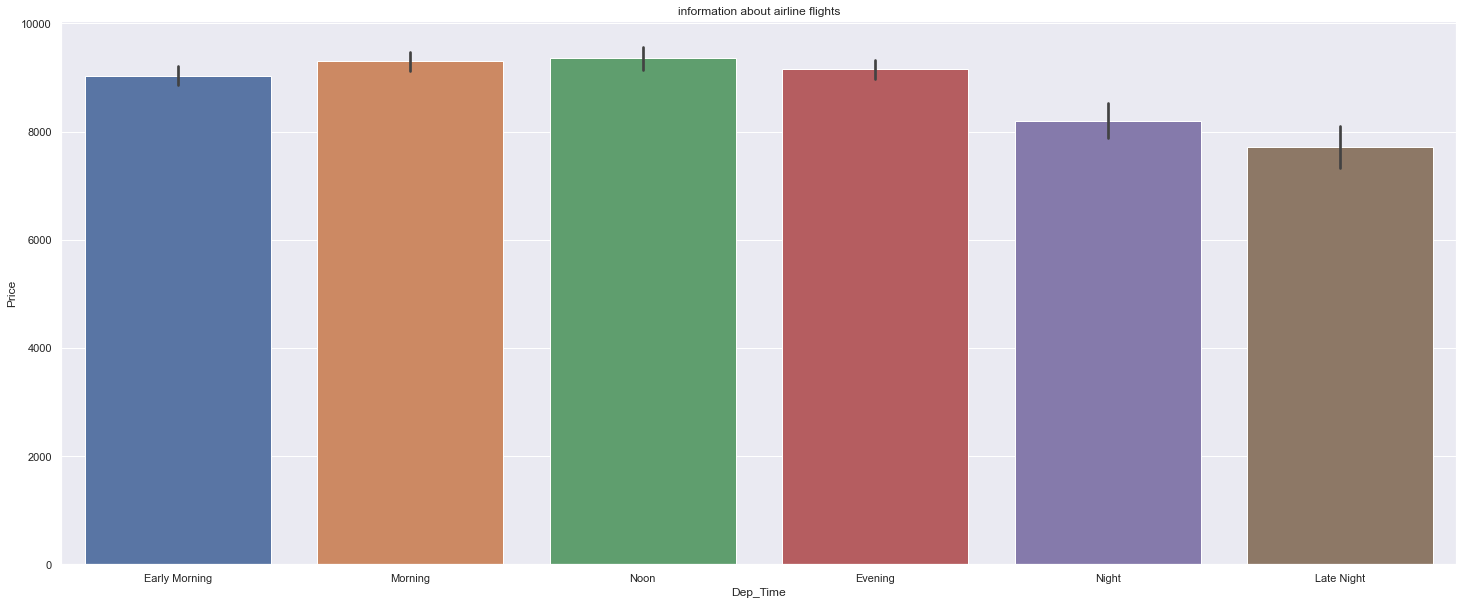

In [63]:
#uçuş zamanı ile bilet ücreti arasındaki ilişki gözlemlendi.
#sabah ile öğle saatlerinde yapılan uçuşlar pahalı görünüyor.
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Dep_Time")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Dep_Time,y=df.Price)
plt.show()

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Arrival_Time', ylabel='Price'>

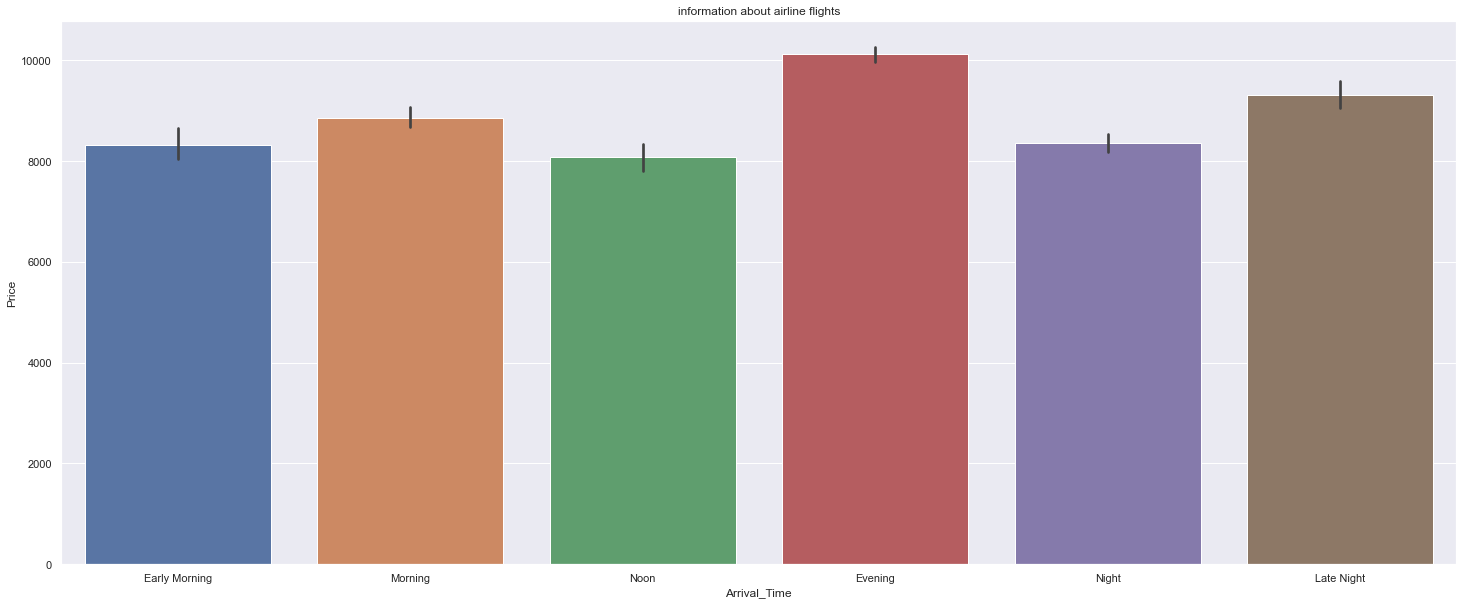

In [64]:
#varış zamanı ile bilet ücreti arasındaki ilişki gözlemlendi.
#akşam varılan zamanda yapılan uçuşlar daha pahalı
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Arrival_Time")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Arrival_Time,y=df.Price)

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Journey_DayName', ylabel='Price'>

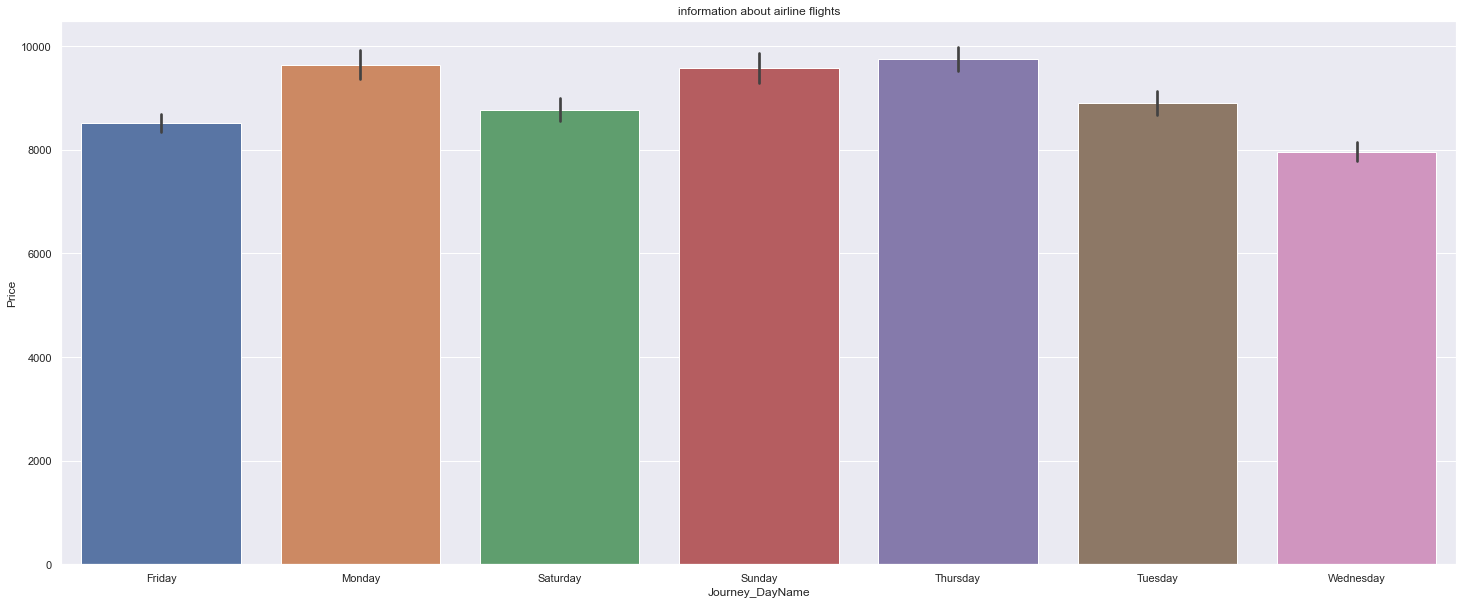

In [65]:
#uçuş yapılan gün ile bilet ücreti arasındaki ilişki gözlemlendi.
#pazartesi günü yapılan uçuşlar daha pahalı
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Day_Name")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Journey_DayName,y=df.Price)

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Season', ylabel='Price'>

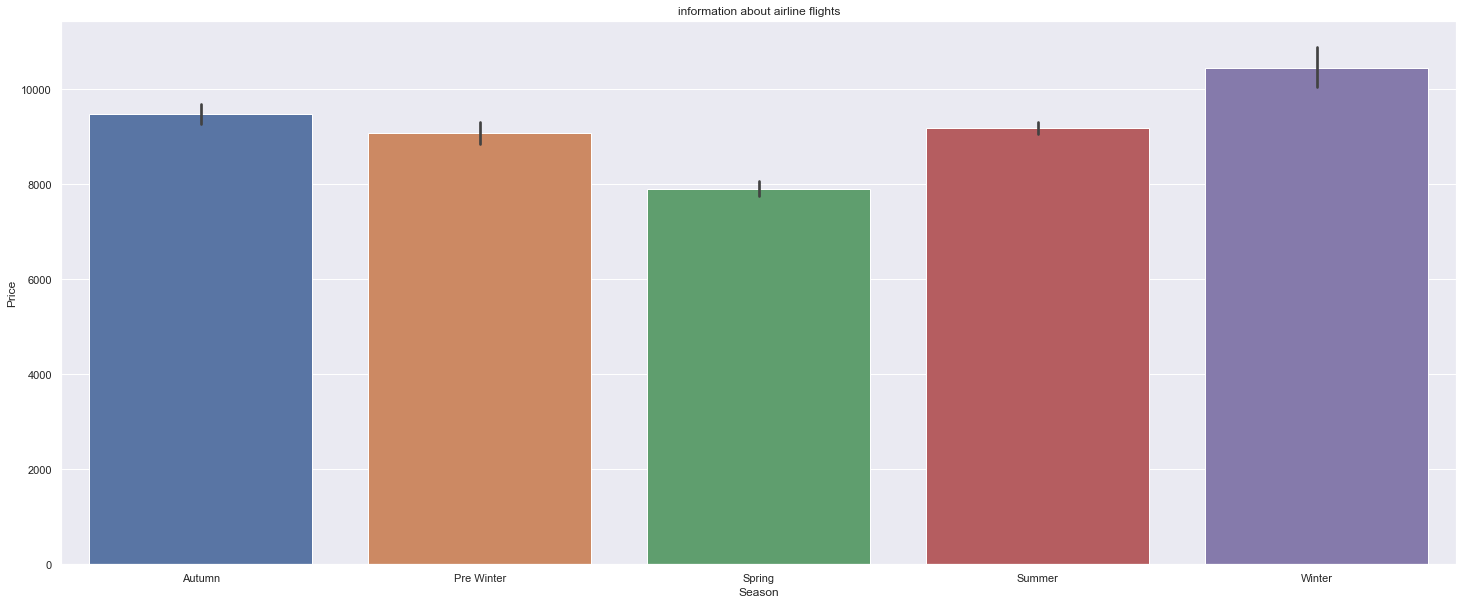

In [66]:
#mevsimlerde yapılan uçuşlar ile bilet ücreti arasındaki ilişki gözlemlendi.
#kış mevsiminde yapılan uçuşlar daha pahalı
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Season")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Season,y=df.Price)

<AxesSubplot:title={'center':'information about airline flights'}, xlabel='Journey_Month', ylabel='Price'>

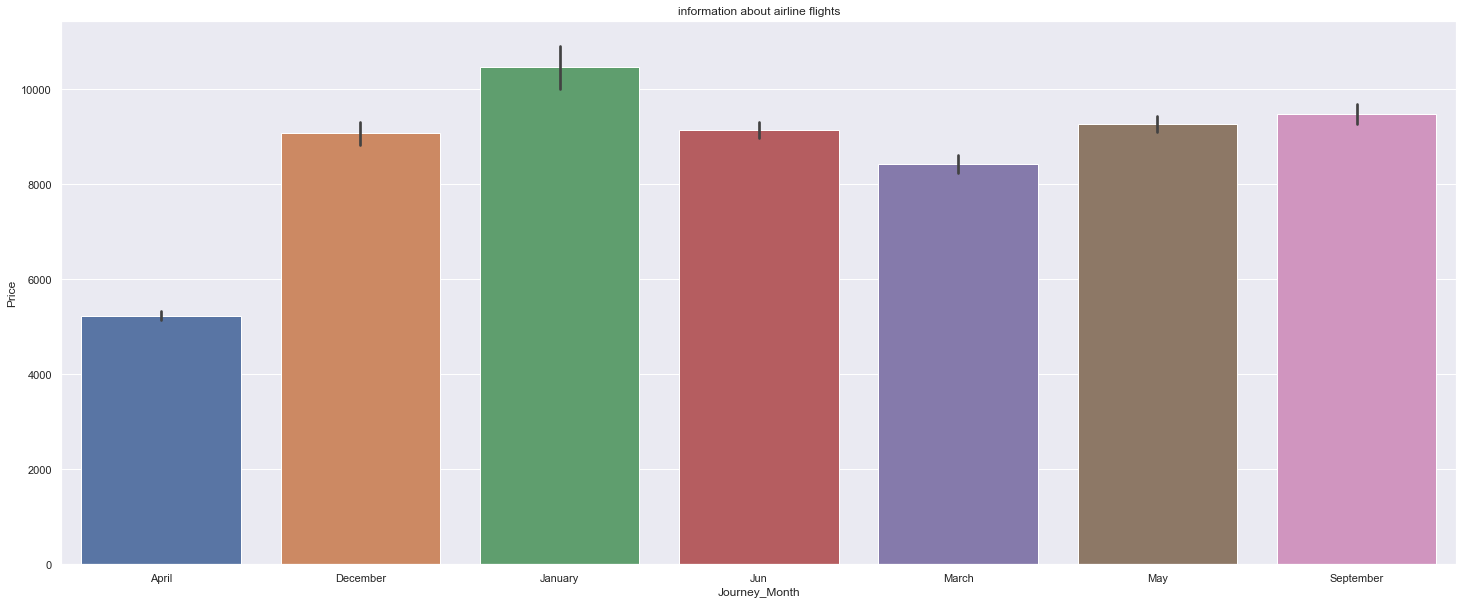

In [67]:
#uçuş yapılan ay bilet ücreti arasındaki ilişki gözlemlendi.
#ocak ayında yapılan uçuşlar daha pahalı
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Journey_Month")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Journey_Month,y=df.Price)

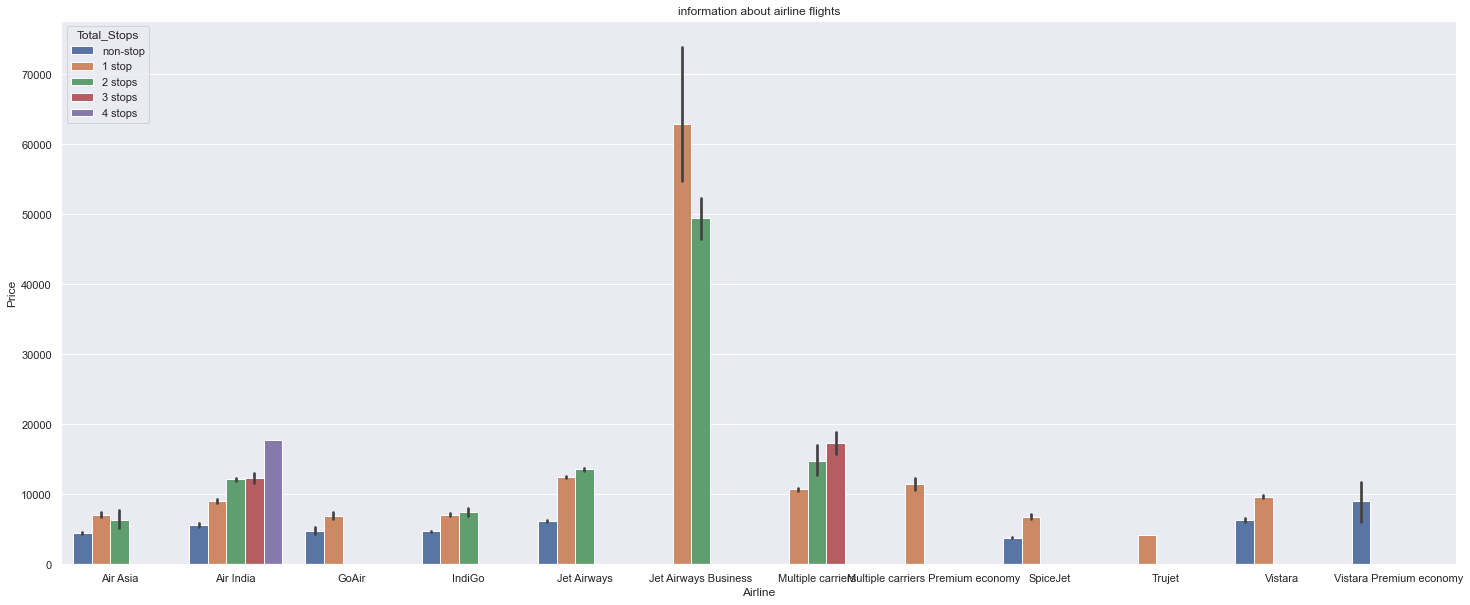

In [68]:
#hava yolu şirketleri, totalde duruş ve bilet ücreti arasındaki ilişki gözlemlendi.
#Jet airway business şirketinde 1 kere duran uçaklar daha pahalı
sns.set()
plt.figure(figsize=(25,10))
plt.xlabel("Airline")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Airline, y=df.Price, hue=df.Total_Stops)
plt.show()

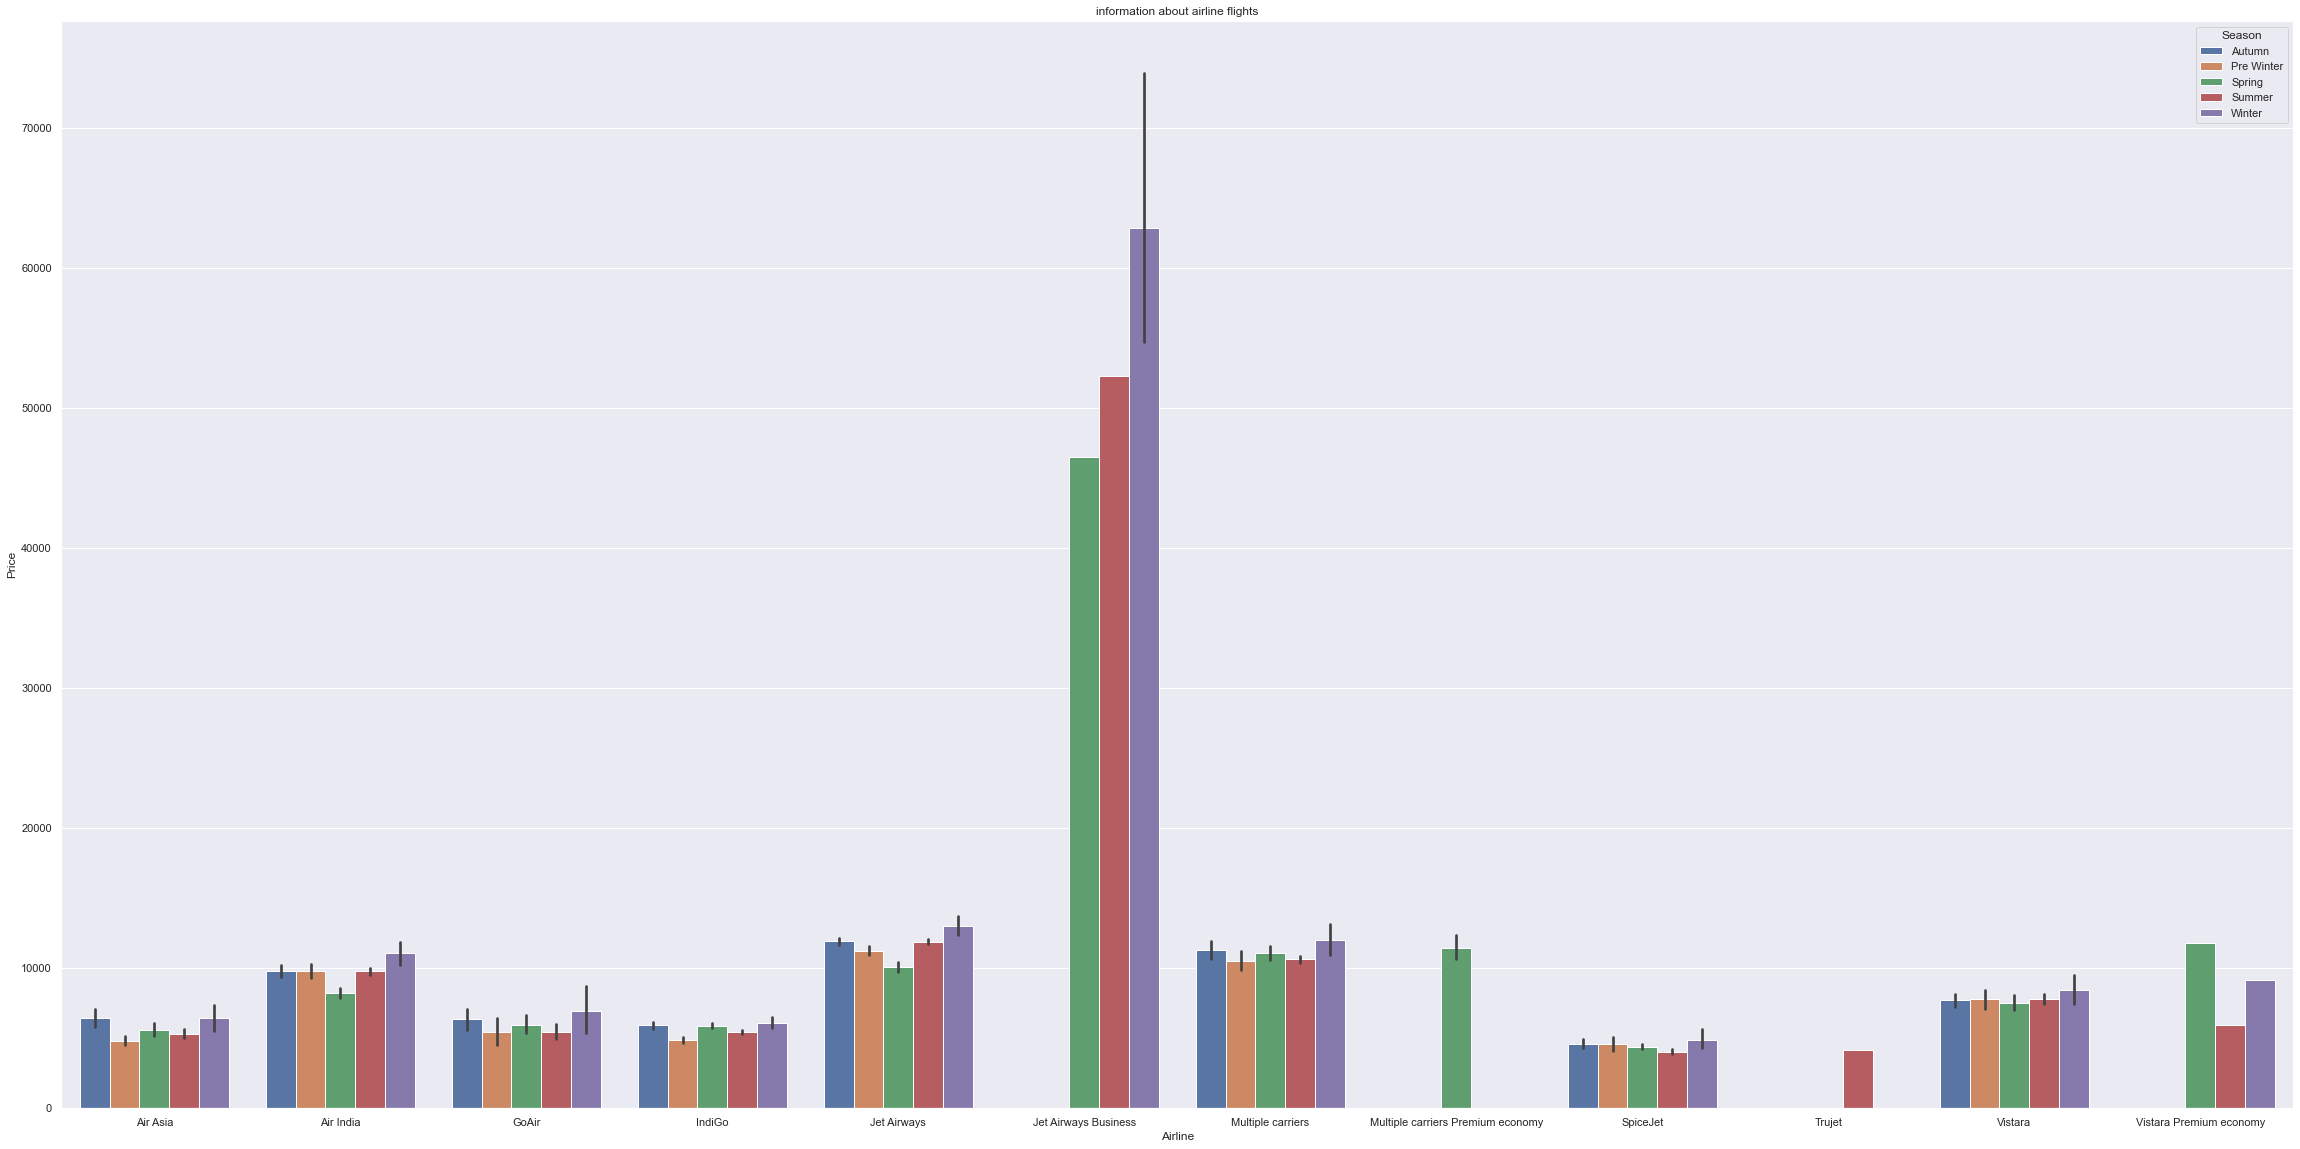

In [69]:
#hava yolu şirketleri ile bilet ücreti arasındaki ilişki gözlemlendi.
#Jet airway business şirketinde kış ayında yapılan uçuşlar pahalı
sns.set()
plt.figure(figsize=(40,20))
plt.xlabel("Airline")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Airline, y=df.Price, hue=df.Season)
plt.show()

In [102]:
#üstteki grafiğin doğruluğunu da analiz etmeliyiz
df.groupby(["Airline","Season"])["Price"].mean()

Airline                            Season    
Air Asia                           Autumn         6419.634146
                                   Pre Winter     4834.206897
                                   Spring         5585.637363
                                   Summer         5322.646154
                                   Winter         6416.392857
Air India                          Autumn         9765.358079
                                   Pre Winter     9778.269461
                                   Spring         8257.076355
                                   Summer         9777.980085
                                   Winter        11075.994709
GoAir                              Autumn         6357.869565
                                   Pre Winter     5445.250000
                                   Spring         5913.784615
                                   Summer         5417.027397
                                   Winter         6934.857143
IndiGo                  

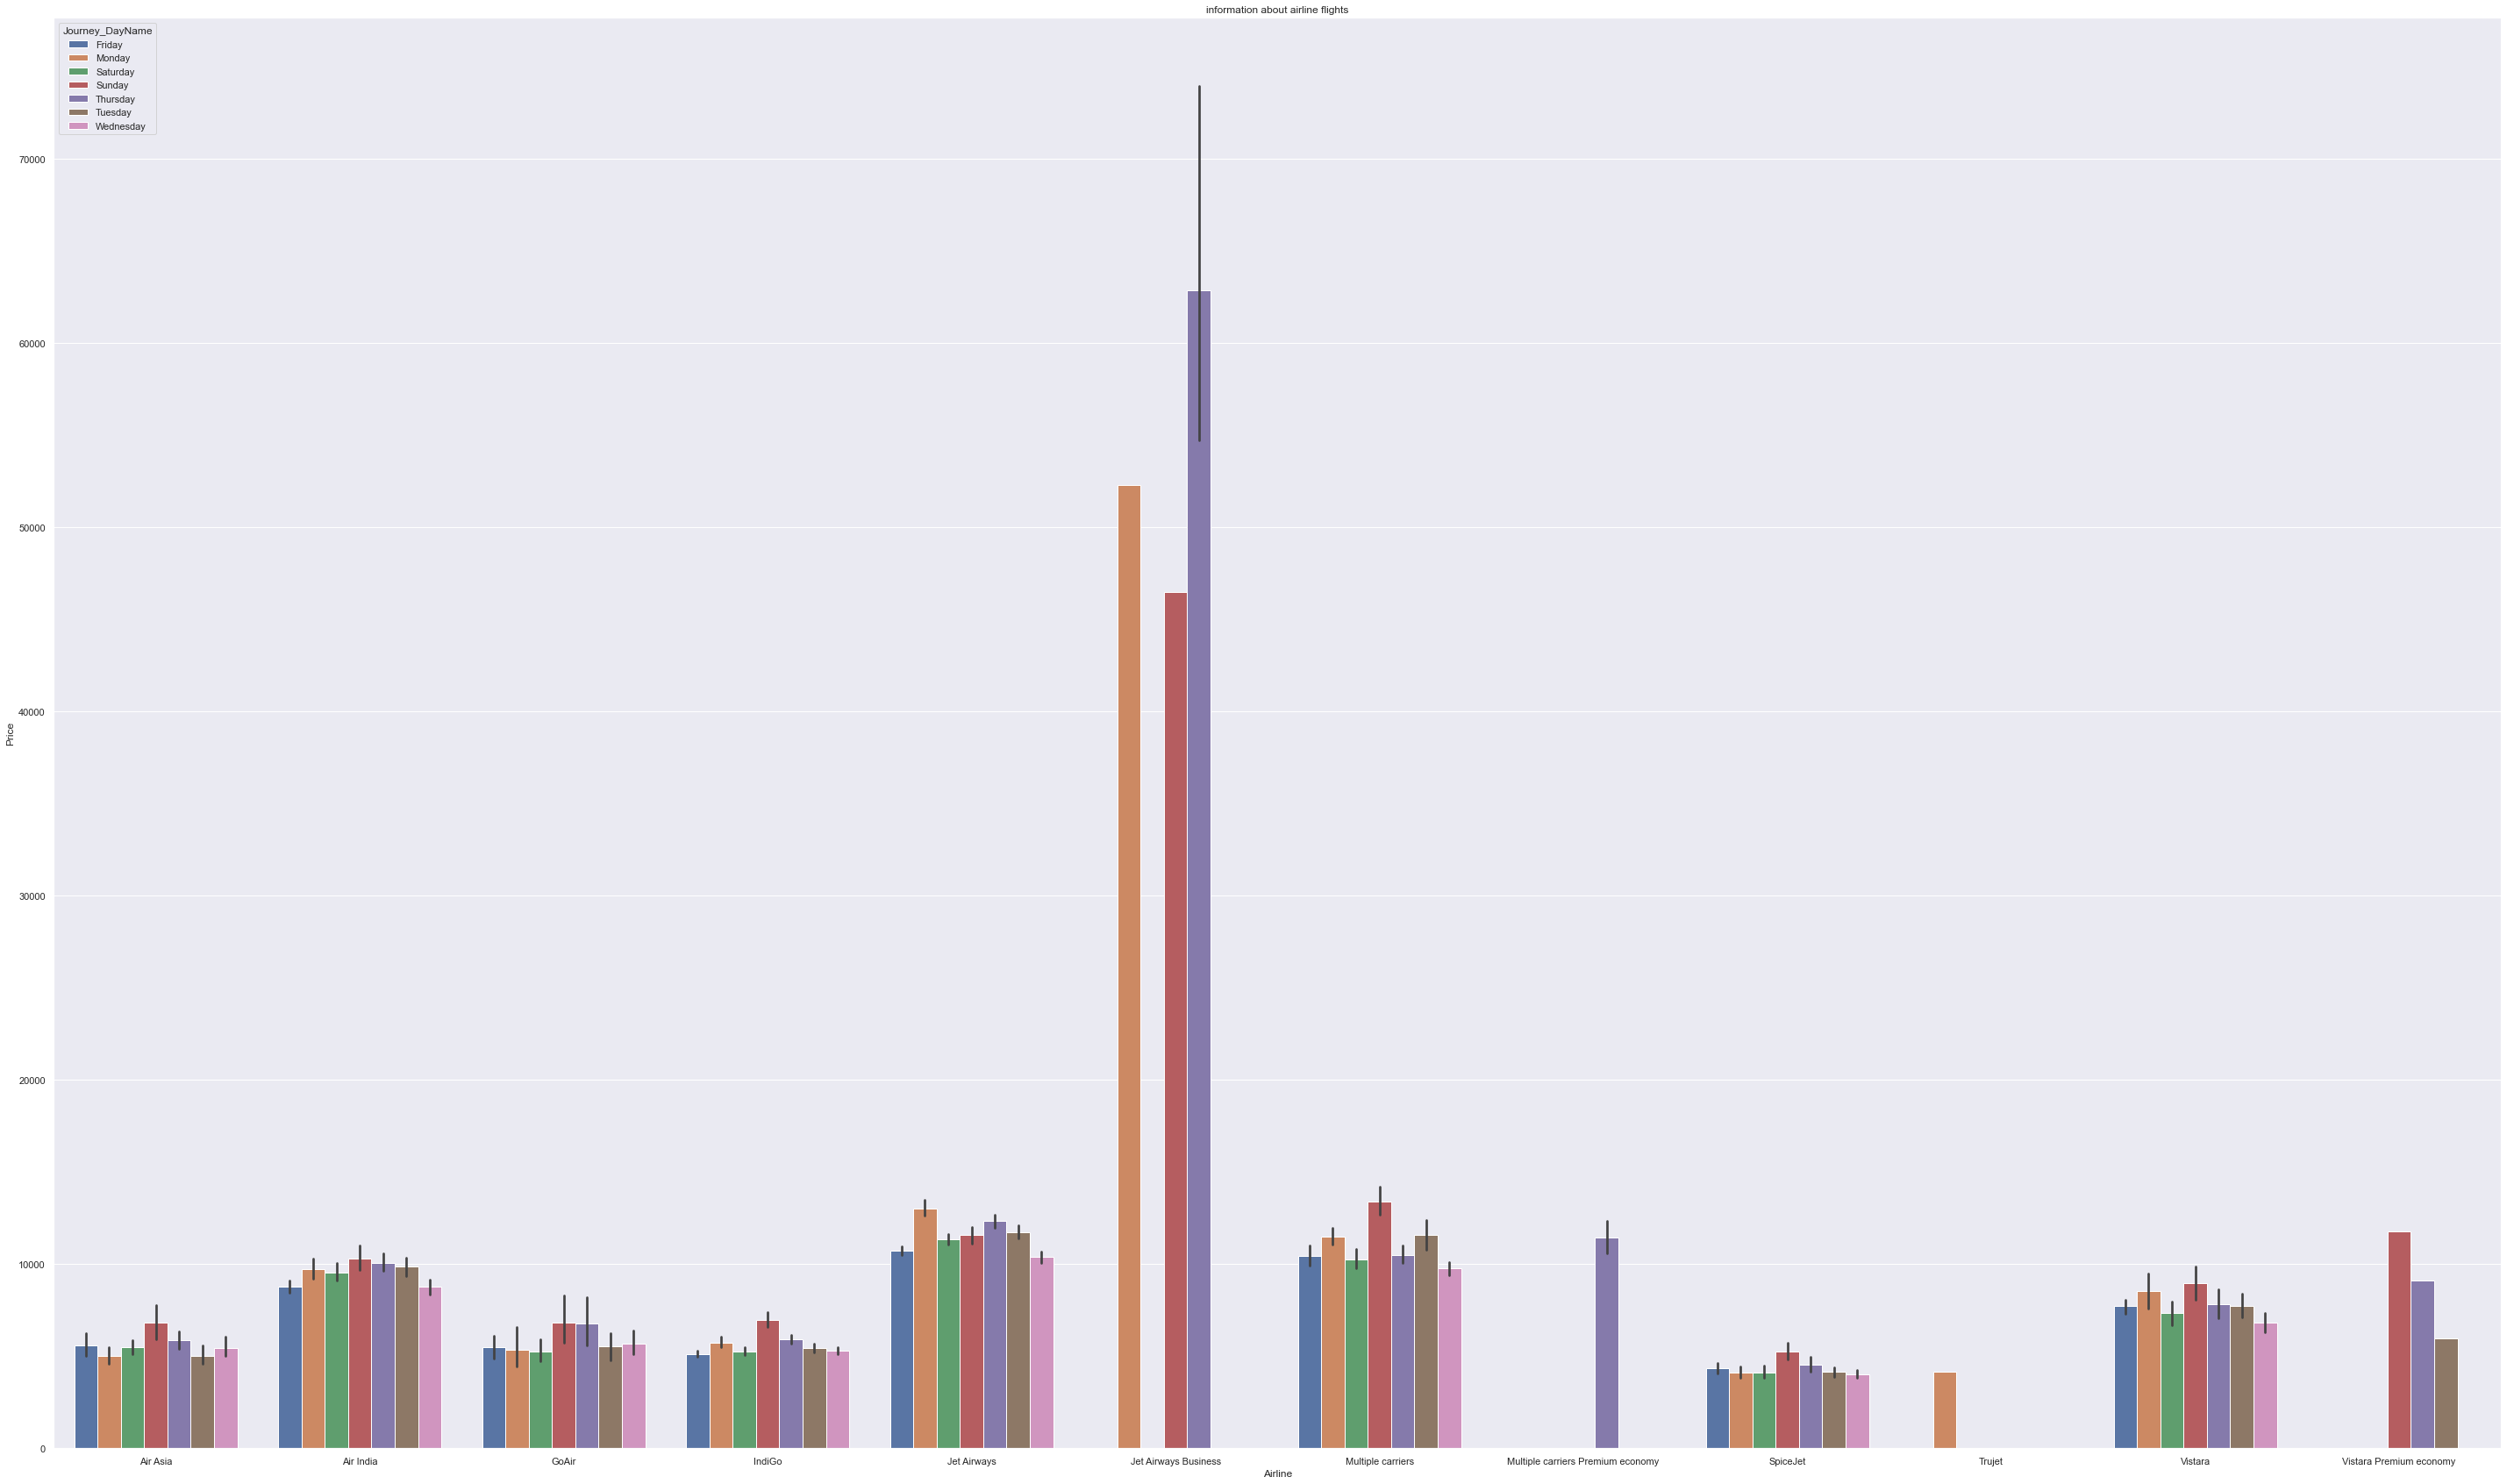

In [70]:
#hava yolu şirketleri ile bilet ücreti arasındaki ilişki gözlemlendi.
#Jet airway business şirketinde perşembe günü yapılan uçuşlar pahalı
sns.set()
plt.figure(figsize=(50,30))
plt.xlabel("Airline")
plt.ylabel("Uçuşlar")
plt.title("information about airline flights")
sns.barplot(x=df.Airline, y=df.Price, hue=df.Journey_DayName)
plt.show()

## HİSTOGRAM VE YOĞUNLUK GRAFİKLERİ

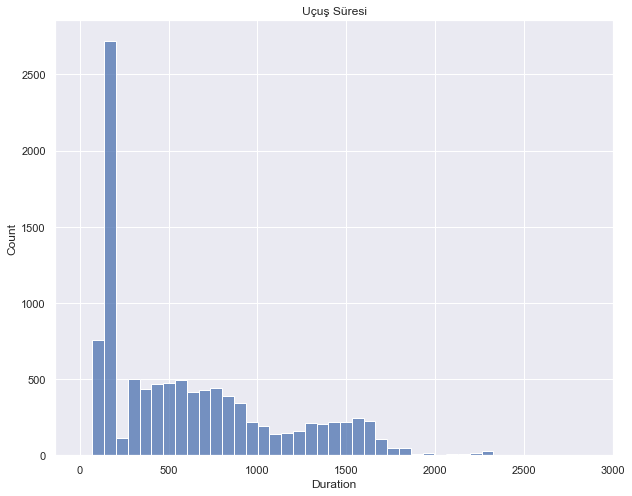

In [71]:
#süre başına düşen uçuşlar gözlemlendi.
sns.set()
plt.figure(figsize=(10,8))
sns.histplot(df["Duration"])
plt.title('Uçuş Süresi')
plt.show()

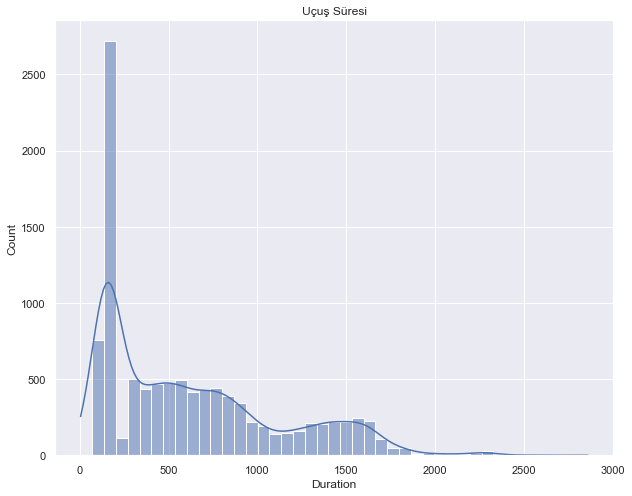

In [72]:
#süre başına düşen uçuşların yoğunluğu
sns.set()
plt.figure(figsize=(10,8))
sns.histplot(df["Duration"],kde=True)
plt.title('Uçuş Süresi')
plt.show()

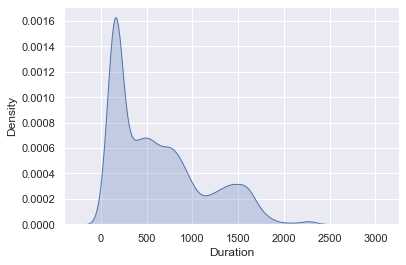

In [73]:
sns.kdeplot(df.Duration, shade = True);
#buradan anlıyoruzki en çok 0-500 dk arası uçuşlar çoğunlukta

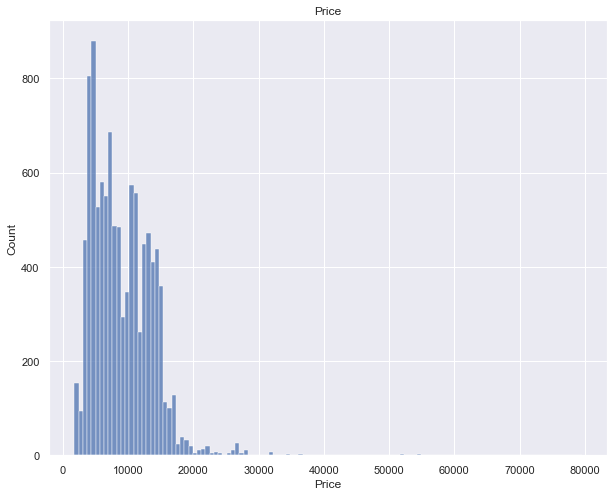

In [74]:
#ücret başına düşen uçuşlar gözlemlendi.
sns.set()
plt.figure(figsize=(10,8))
sns.histplot(df["Price"])
plt.title('Price')
plt.show()

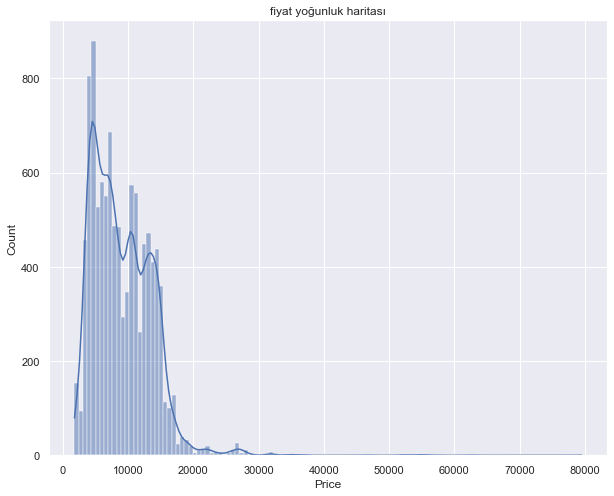

In [75]:
#ücret başına düşen uçuşların yoğunluğu
sns.set()
plt.figure(figsize=(10,8))
sns.histplot(df["Price"],kde=True)
plt.title("fiyat yoğunluk haritası")
plt.show()

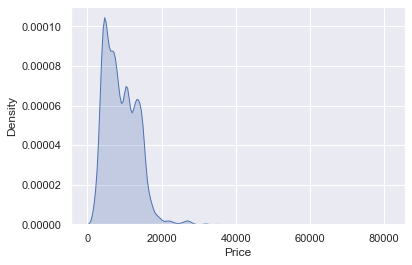

In [76]:
#buradan anlıyoruzki en çok 0-1000 rupi arasındaki uçuşlar çoğunlukta
sns.kdeplot(df.Price, shade = True);

In [77]:
df["Price"].describe()

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64

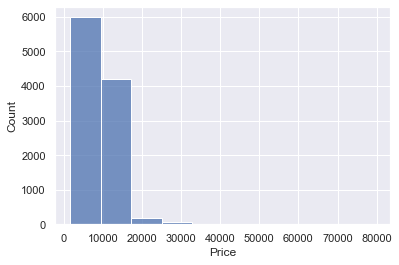

In [78]:
#buradan anlıyoruzki en çok 0-1000 rupi arasındaki uçuşlar çoğunlukta
sns.histplot(df.Price, bins = 10);

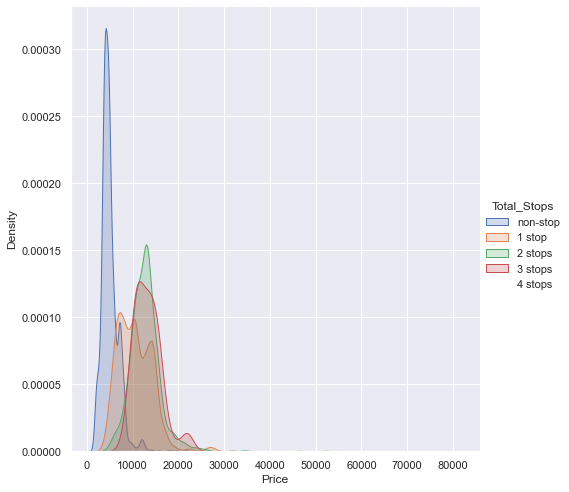

In [79]:
(sns.FacetGrid(df,hue = "Total_Stops",height = 7).map(sns.kdeplot, "Price", shade= True).add_legend())
#grafik incelendiğinde en fazla boyutu olan non-stop, geniş bir alana yayılması bakımından 1 stops olduğunu söyleyebiliriz.

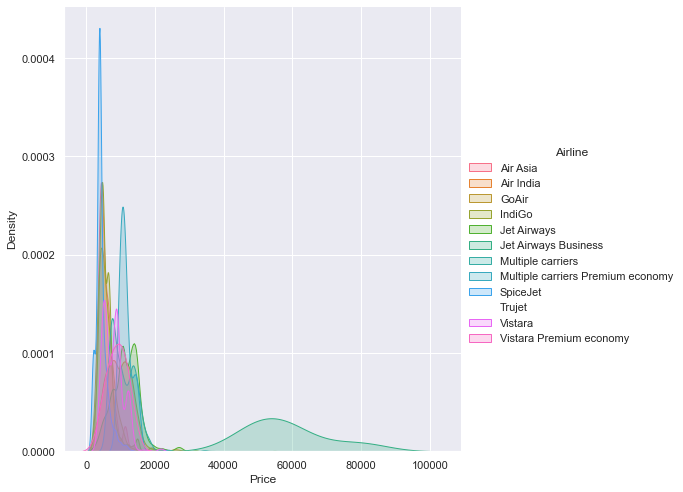

In [80]:
(sns.FacetGrid(df,hue = "Airline",height = 7).map(sns.kdeplot, "Price", shade= True).add_legend())
#grafik incelendiğinde jet airway business ile yapılan uçuşlar geniş bir aralığa ayrılmıştır. spice jet in üzcret aralığı en düşük olmuştur.

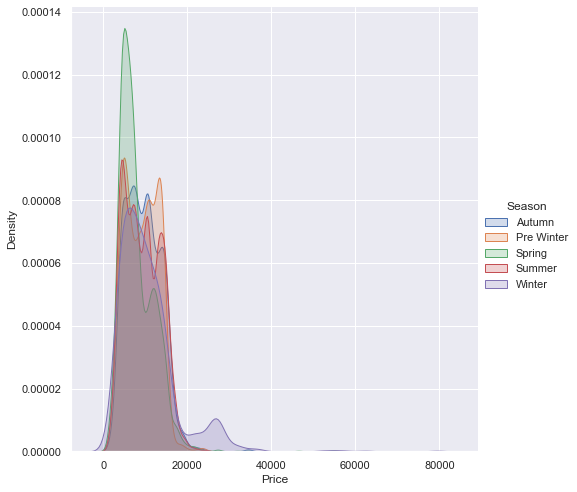

In [81]:
(sns.FacetGrid(df,hue = "Season",height = 7).map(sns.kdeplot, "Price", shade= True).add_legend())
#grafik incelendiğinde yaz ayında yapılan uçuşlar yoğunluktadır. bu mevsimde yer alan fiyatlar 0-2000 arasında yayılmıştır.

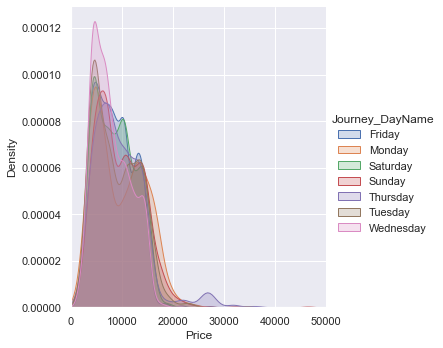

In [82]:
(sns.FacetGrid(df,hue = "Journey_DayName",height = 5,xlim = (0, 50000)).map(sns.kdeplot, "Price", shade= True).add_legend())
#grafik incelendiğinde perşembe günü yapılan uçuşlaraın yoğunluğu daha fazladır.

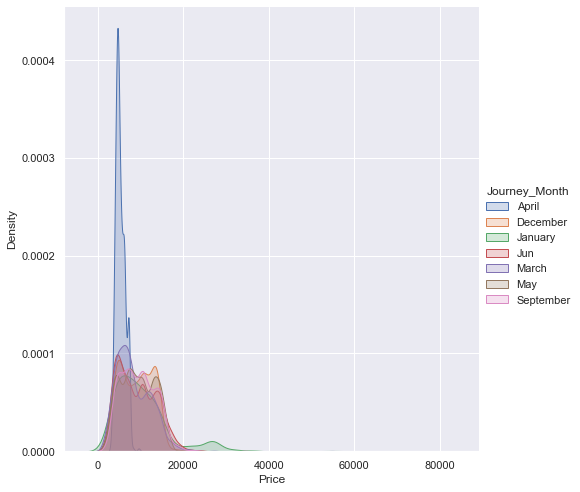

In [83]:
(sns.FacetGrid(df,hue = "Journey_Month",height = 7).map(sns.kdeplot, "Price", shade= True).add_legend())
#grafik incelendiğinde haziran ayında yapılan uçuşların yoğunluğu daha fazladır.

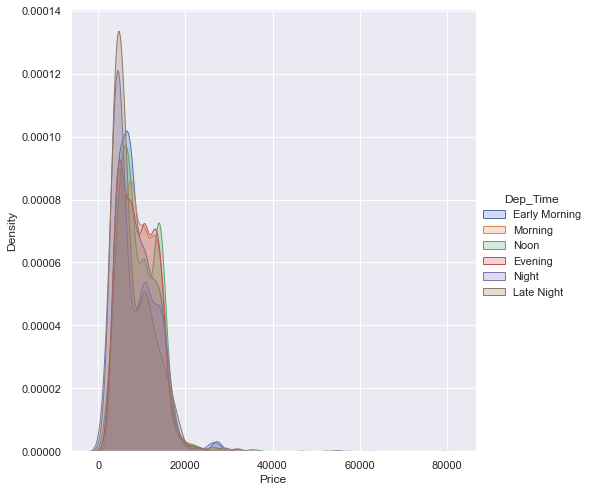

In [84]:
(sns.FacetGrid(df,hue = "Dep_Time",height = 7).map(sns.kdeplot, "Price", shade= True).add_legend())
#grafik incelendiğinde sabahın erken saatlerinde yapılan uçuşlaraın yoğunluğu daha fazladır.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Jet Airways Business'),
  Text(6, 0, 'Multiple carriers'),
  Text(7, 0, 'Multiple carriers Premium economy'),
  Text(8, 0, 'SpiceJet'),
  Text(9, 0, 'Trujet'),
  Text(10, 0, 'Vistara'),
  Text(11, 0, 'Vistara Premium economy')])

<Figure size 4320x720 with 0 Axes>

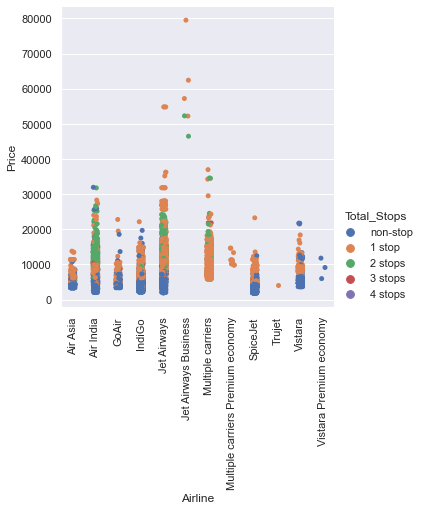

In [88]:
sns.set()
plt.figure(figsize=(60,10))
sns.catplot(x = "Airline", y = "Price", hue = "Total_Stops", data = df);
plt.xticks(rotation = 90)
# en çok multiple carries şirketinde 1 kere duran uçuşlar daha fazladır.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Jet Airways Business'),
  Text(6, 0, 'Multiple carriers'),
  Text(7, 0, 'Multiple carriers Premium economy'),
  Text(8, 0, 'SpiceJet'),
  Text(9, 0, 'Trujet'),
  Text(10, 0, 'Vistara'),
  Text(11, 0, 'Vistara Premium economy')])

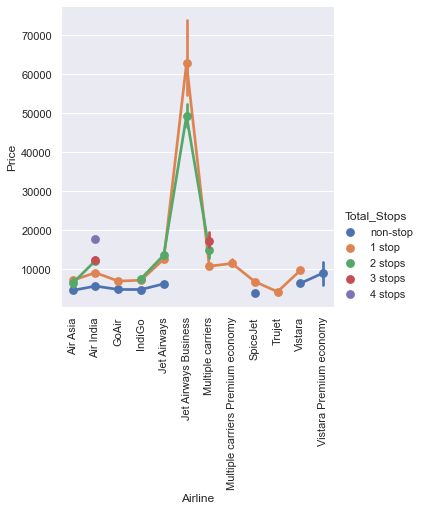

In [90]:
sns.catplot(x = "Airline", y = "Price", hue = "Total_Stops", kind = "point", data = df);
plt.xticks(rotation = 90)
#bir önceki grafik daha net anlaşılır.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Jet Airways Business'),
  Text(6, 0, 'Multiple carriers'),
  Text(7, 0, 'Multiple carriers Premium economy'),
  Text(8, 0, 'SpiceJet'),
  Text(9, 0, 'Trujet'),
  Text(10, 0, 'Vistara'),
  Text(11, 0, 'Vistara Premium economy')])

<Figure size 4320x720 with 0 Axes>

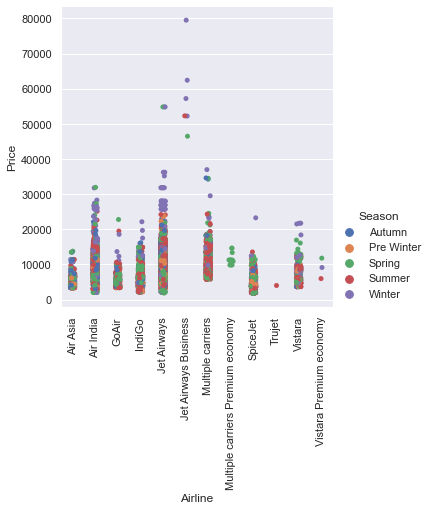

In [92]:
sns.set()
plt.figure(figsize=(60,10))
sns.catplot(x = "Airline", y = "Price", hue = "Season", data = df);
plt.xticks(rotation = 90)
#uçuşlar incelendiğinde yaz ayında yapılan uçuşlar daha fazla

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Jet Airways Business'),
  Text(6, 0, 'Multiple carriers'),
  Text(7, 0, 'Multiple carriers Premium economy'),
  Text(8, 0, 'SpiceJet'),
  Text(9, 0, 'Trujet'),
  Text(10, 0, 'Vistara'),
  Text(11, 0, 'Vistara Premium economy')])

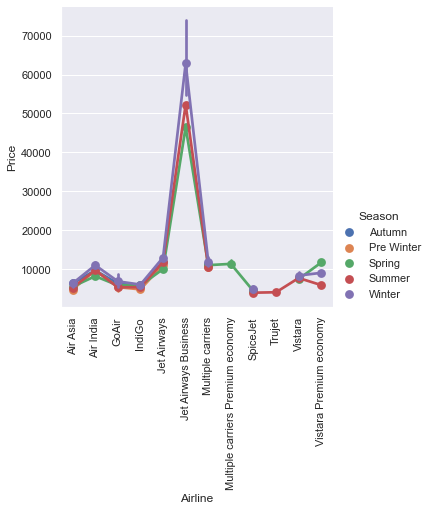

In [93]:
sns.catplot(x = "Airline", y = "Price", hue = "Season", kind = "point", data = df);
plt.xticks(rotation = 90)
#bir önceki grafik daha net anlaşılır.

## BOXPLOT kutu grafiği

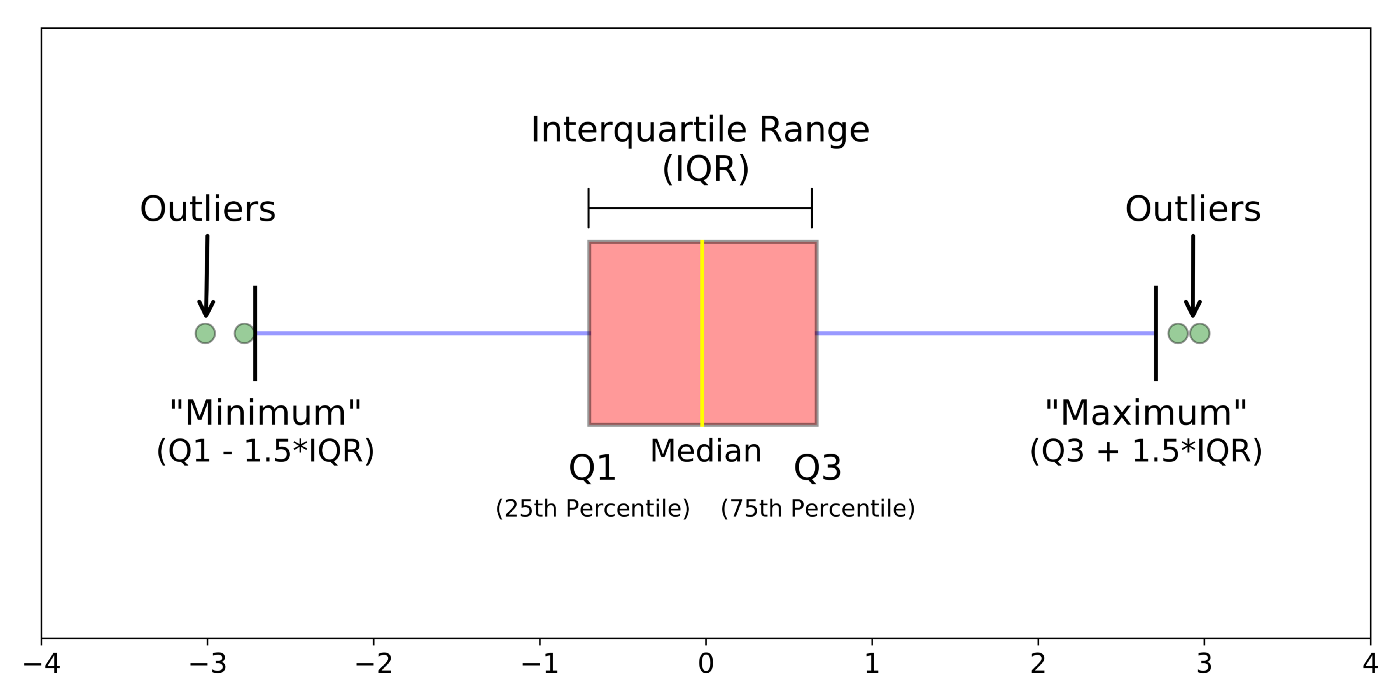

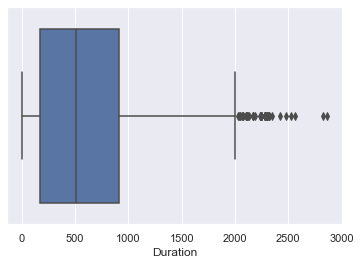

In [94]:
sns.boxplot(x = df["Duration"]);
# aykırı veriler gözlemlenmiştir

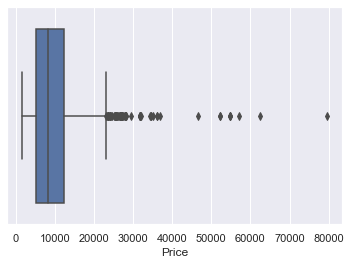

In [95]:
sns.boxplot(x = df["Price"]);
# aykırı veriler gözlemlenmiştir

## BOXPLOT (KUTU GRAFİĞİ) ÇAPRAZLAMA

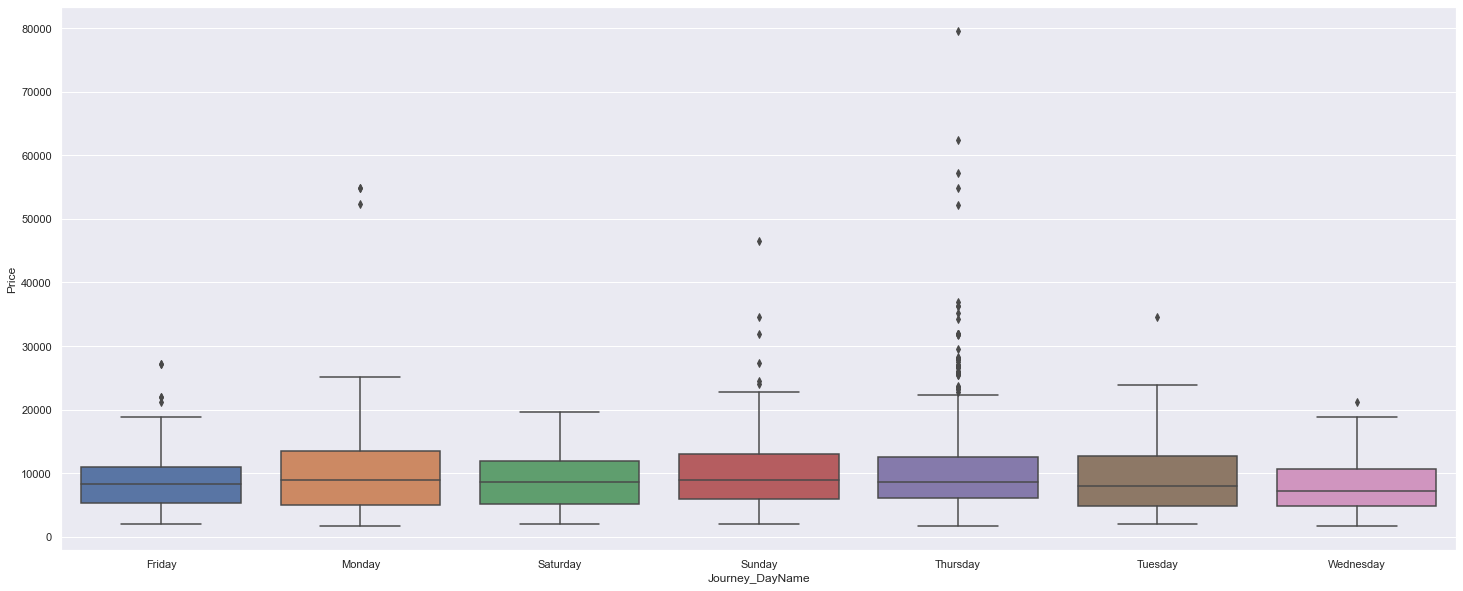

In [96]:
sns.set()
plt.figure(figsize=(25,10))
sns.boxplot(x = df.Journey_DayName, y = df.Price, data = df);
#en çok perşembe günü yapılan uçuşların fiyatlarında aykırılık gözlemlenmiştir.

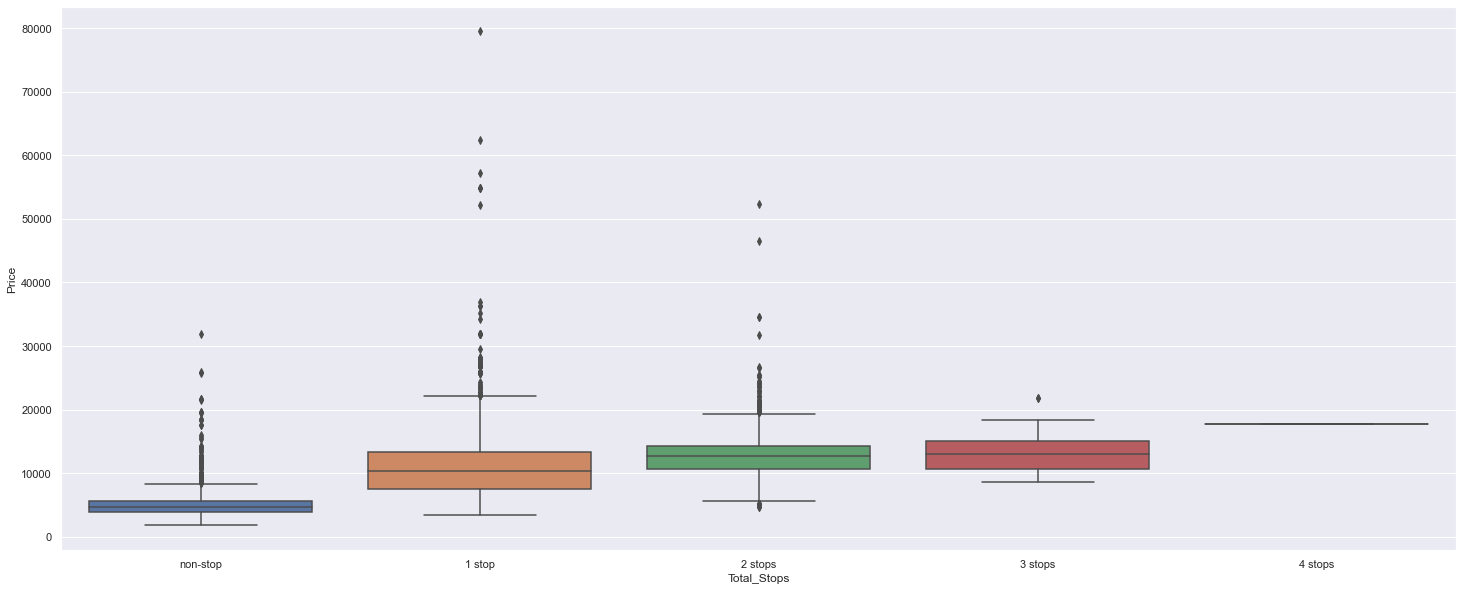

In [97]:
sns.set()
plt.figure(figsize=(25,10))
sns.boxplot(x = df.Total_Stops, y = df.Price, data = df);
#en çok 1 kere duran uçuşların fiyatlarında aykırılık gözlemlenmiştir.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Jet Airways Business'),
  Text(6, 0, 'Multiple carriers'),
  Text(7, 0, 'Multiple carriers Premium economy'),
  Text(8, 0, 'SpiceJet'),
  Text(9, 0, 'Trujet'),
  Text(10, 0, 'Vistara'),
  Text(11, 0, 'Vistara Premium economy')])

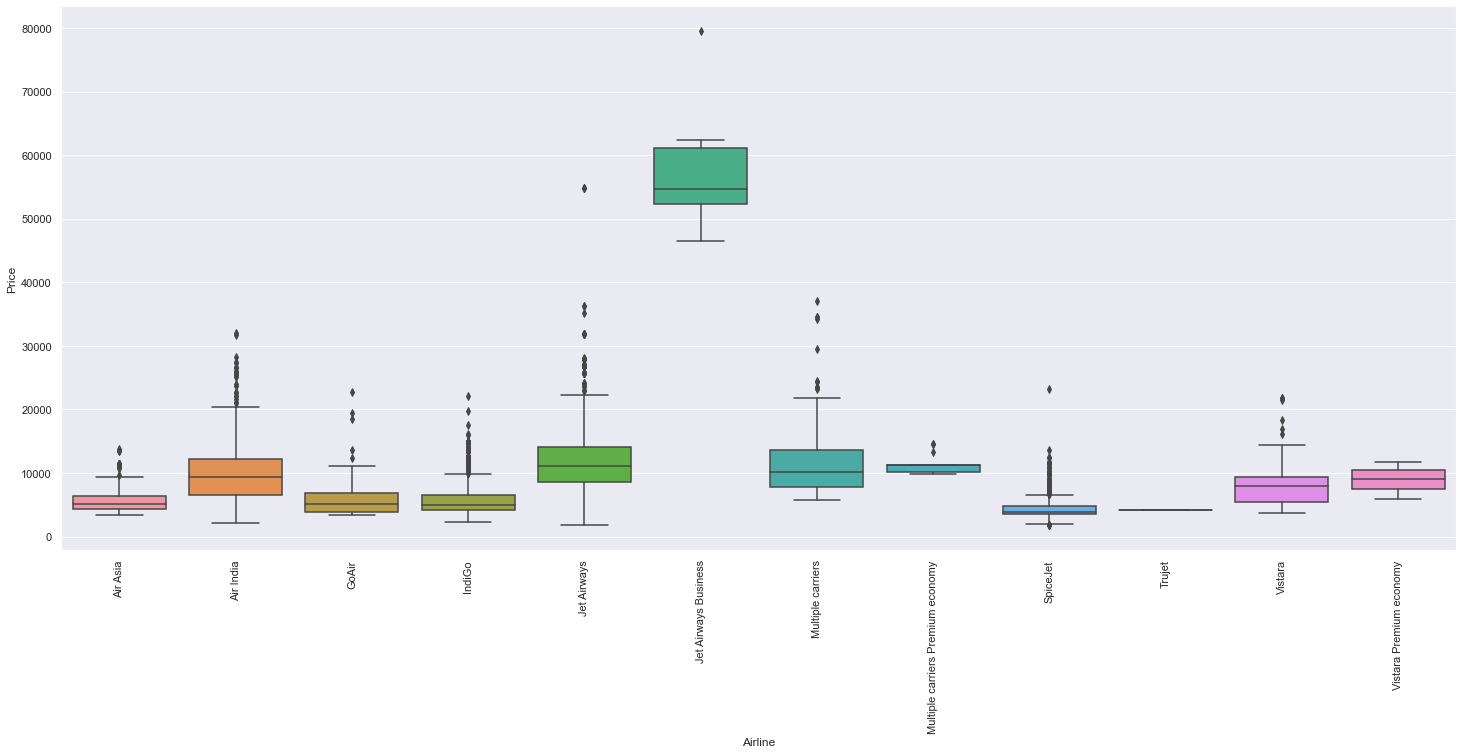

In [98]:
sns.set()
plt.figure(figsize=(25,10))
sns.boxplot(x = df.Airline, y = df.Price, data = df);
plt.xticks(rotation = 90)
#en çok air india ve indigo hava yolu şirketlerinin bilet fiyatlarında aykırılık gözlemlenmiştir.

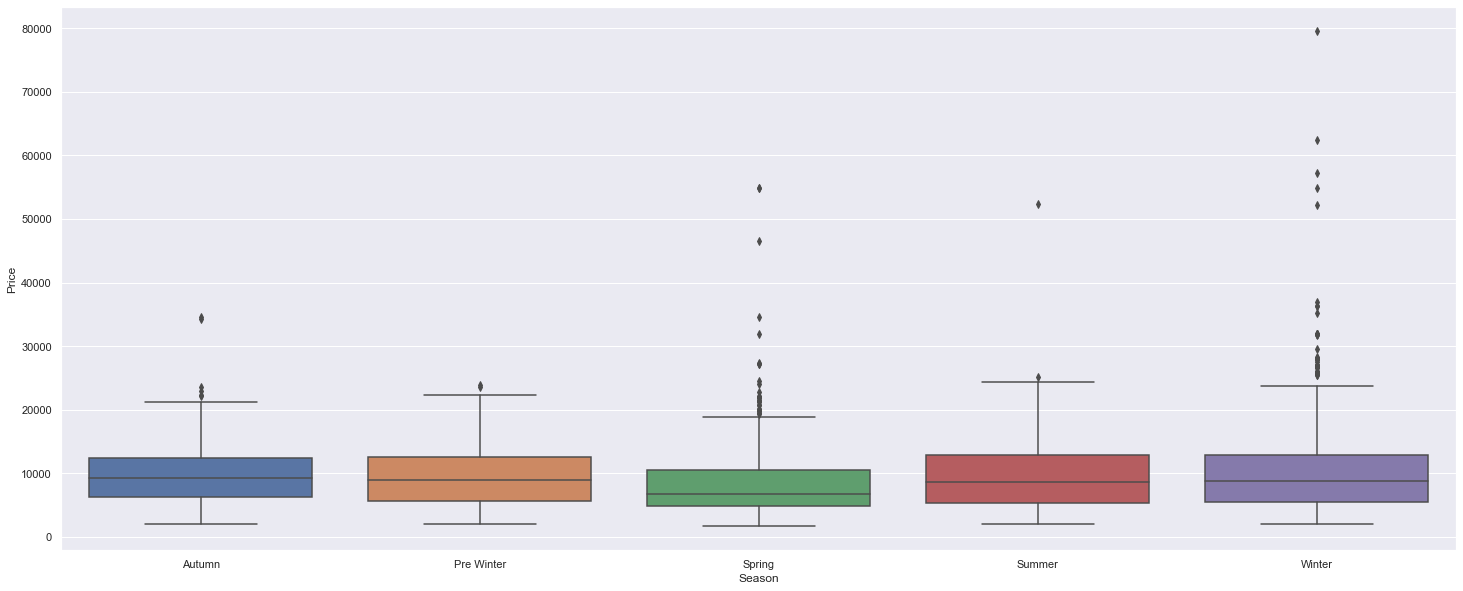

In [99]:
sns.set()
plt.figure(figsize=(25,10))
sns.boxplot(x = df.Season, y = df.Price, data = df);
#en çok kş ayında yapılan uçuşların fiyatlarında aykırılık gözlemlenmiştir.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Jet Airways Business'),
  Text(6, 0, 'Multiple carriers'),
  Text(7, 0, 'Multiple carriers Premium economy'),
  Text(8, 0, 'SpiceJet'),
  Text(9, 0, 'Trujet'),
  Text(10, 0, 'Vistara'),
  Text(11, 0, 'Vistara Premium economy')])

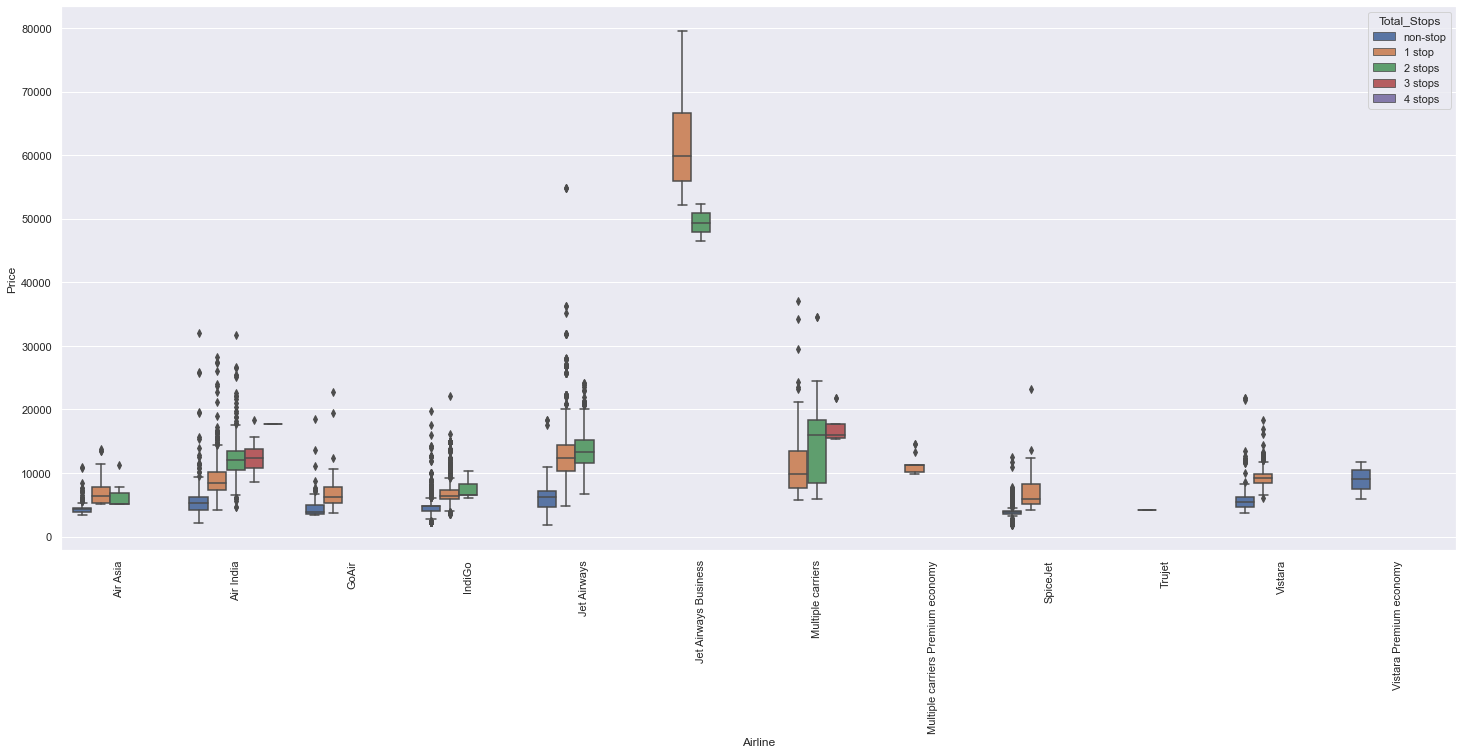

In [101]:
sns.set()
plt.figure(figsize=(25,10))
sns.boxplot(x =df.Airline, y = df.Price, hue = df.Total_Stops, data = df);
plt.xticks(rotation = 90)
#genellikle 1 kere duran uçuşların fiyatlarında aykırılık gözlemlenmiştir.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Air Asia'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'GoAir'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Jet Airways'),
  Text(5, 0, 'Jet Airways Business'),
  Text(6, 0, 'Multiple carriers'),
  Text(7, 0, 'Multiple carriers Premium economy'),
  Text(8, 0, 'SpiceJet'),
  Text(9, 0, 'Trujet'),
  Text(10, 0, 'Vistara'),
  Text(11, 0, 'Vistara Premium economy')])

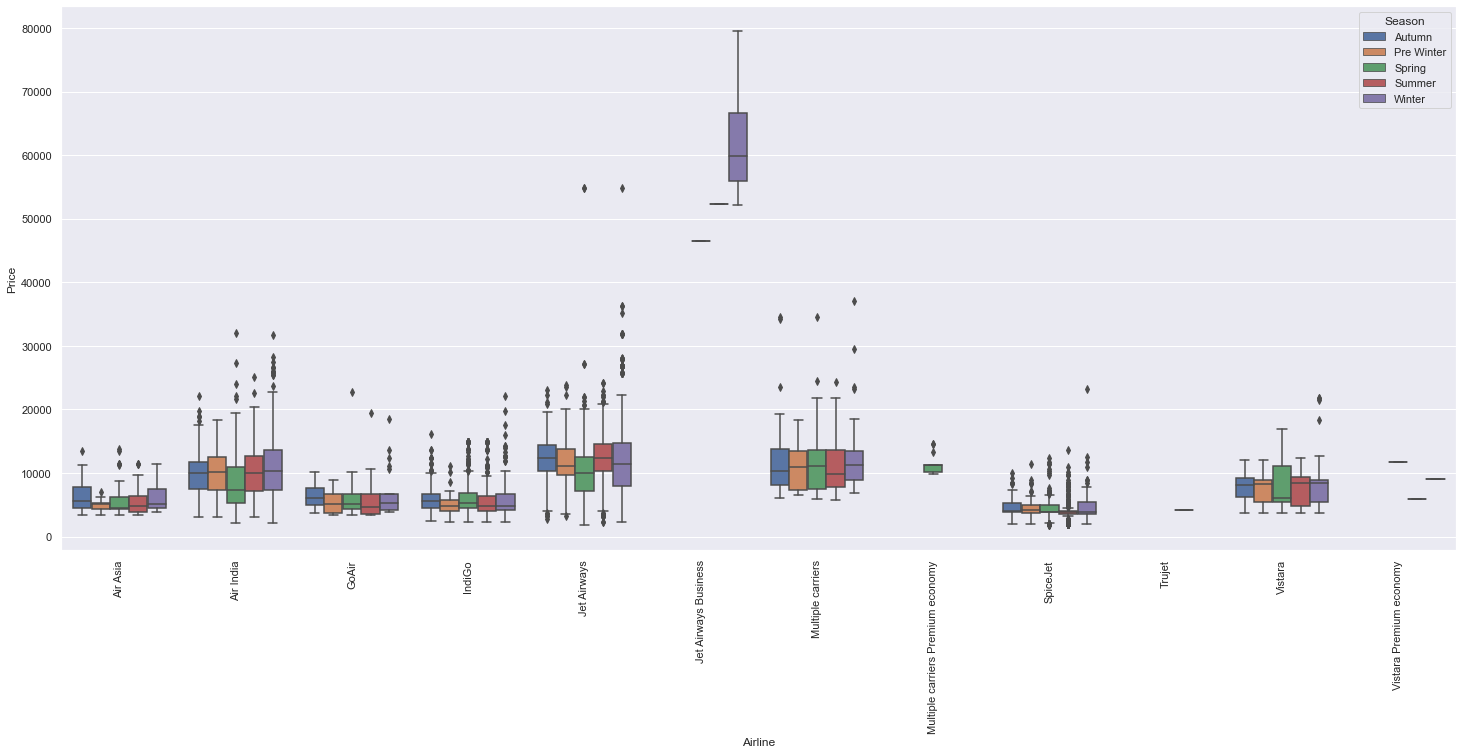

In [102]:
sns.set()
plt.figure(figsize=(25,10))
sns.boxplot(x =df.Airline, y = df.Price, hue = df.Season, data = df);
plt.xticks(rotation = 90)
#genellikle kış ayında yapılan uçuşların fiyatlarında aykırılık gözlemlenmiştir.

## VİOLİNPLOT (VİOLİN GRAFİĞİ)

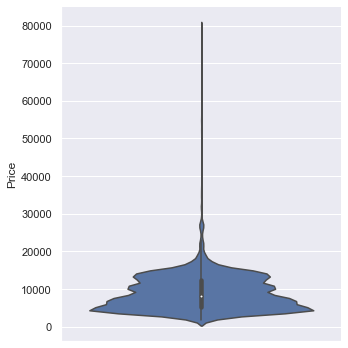

In [103]:
sns.catplot(y ="Price", kind = "violin", data = df);
#bu grafikte bilet fiyatı için aykırı değer aralığı görünmektedir.

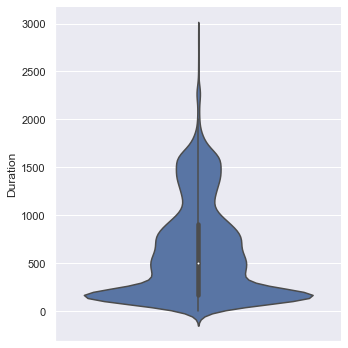

In [104]:
sns.catplot(y ="Duration", kind = "violin", data = df);
#bu grafikte uçuş süresi için aykırı değer aralığı görünmektedir.

### VİOLİNPLOT ÇAPRAZLAMA

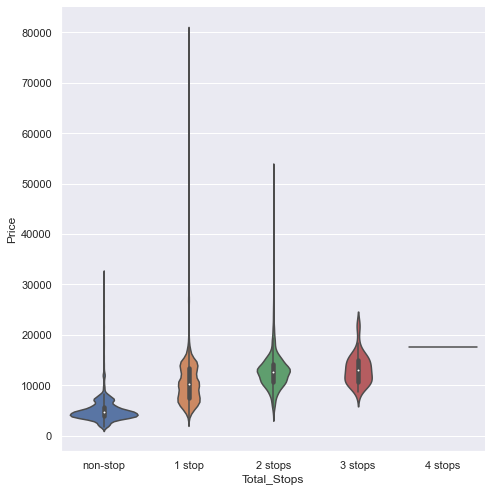

In [105]:
sns.catplot(x= "Total_Stops", y = "Price", kind = "violin",height=7, data = df);
# en çok 1 kere duran uçuşların bilet fiyatlarında ayrkırılık gözlemlenmiştir.

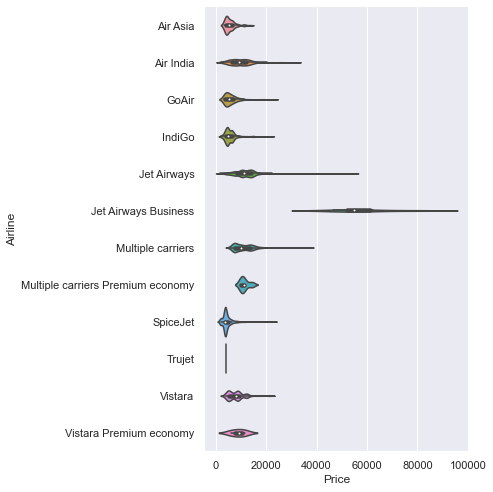

In [106]:
sns.catplot(x= "Price", y = "Airline", kind = "violin",height=7, data = df);
# en çok jet airways business havayolu şirkelerinin bilet fiyatlarında ayrkırılık gözlemlenmiştir.

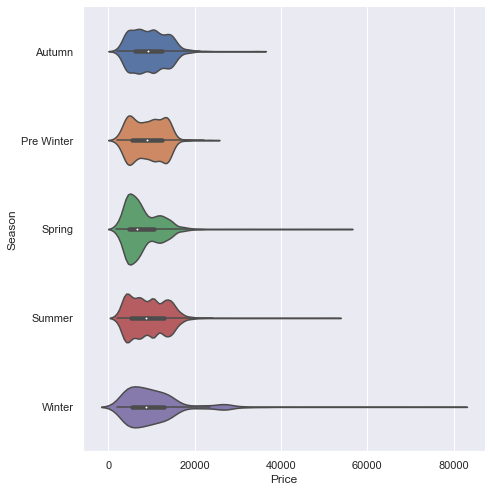

In [107]:
sns.catplot(x= "Price", y = "Season", kind = "violin",height=7, data = df);
# en çok kış ayında yapılan uçuşların bilet fiyatlarında ayrkırılık gözlemlenmiştir.

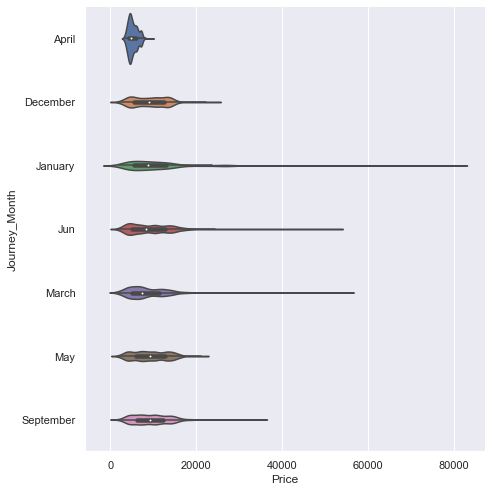

In [108]:
sns.catplot(x= "Price", y = "Journey_Month", kind = "violin",height=7, data = df);
# en çok ocak ayında yapılan uçuşların bilet fiyatlarında ayrkırılık gözlemlenmiştir.

<Figure size 1800x720 with 0 Axes>

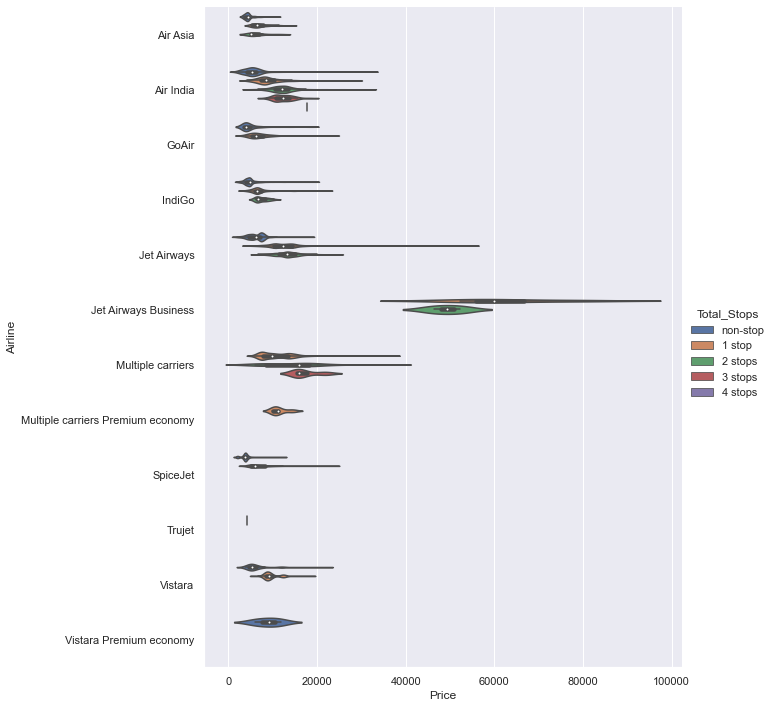

In [109]:
sns.set()
plt.figure(figsize=(25,10))
sns.catplot(x= "Price", y = "Airline", hue = "Total_Stops",kind = "violin", height=10,data = df);
# en çok jet Airways business havayolu şirketinin 1 kere duran uçuşların bilet fiyatlarında ayrkırılık gözlemlenmiştir.

## KORELASYON GRAFİKLERİ

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Airline          10462 non-null  category
 1   Source           10462 non-null  category
 2   Destination      10462 non-null  category
 3   Dep_Time         10462 non-null  category
 4   Arrival_Time     10462 non-null  category
 5   Duration         10462 non-null  int64   
 6   Total_Stops      10462 non-null  category
 7   Additional_Info  10462 non-null  category
 8   Price            10462 non-null  int64   
 9   Journey_DayName  10462 non-null  category
 10  Journey_Month    10462 non-null  category
 11  Season           10462 non-null  category
dtypes: category(10), int64(2)
memory usage: 350.1 KB


### SCATTER PLOT

İki sayısal veri arasındaki ilişki gözlemlenir

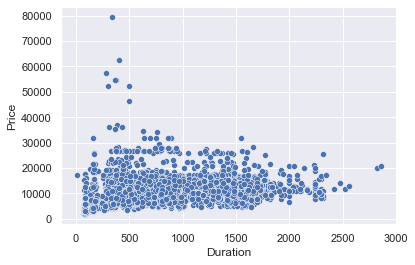

In [137]:
sns.scatterplot(x = "Duration", y = "Price", data = df);
#duration ile price arasındaki ilişki inceleniyor

### SCATTER PLOT ÇAPRAZLAMA 

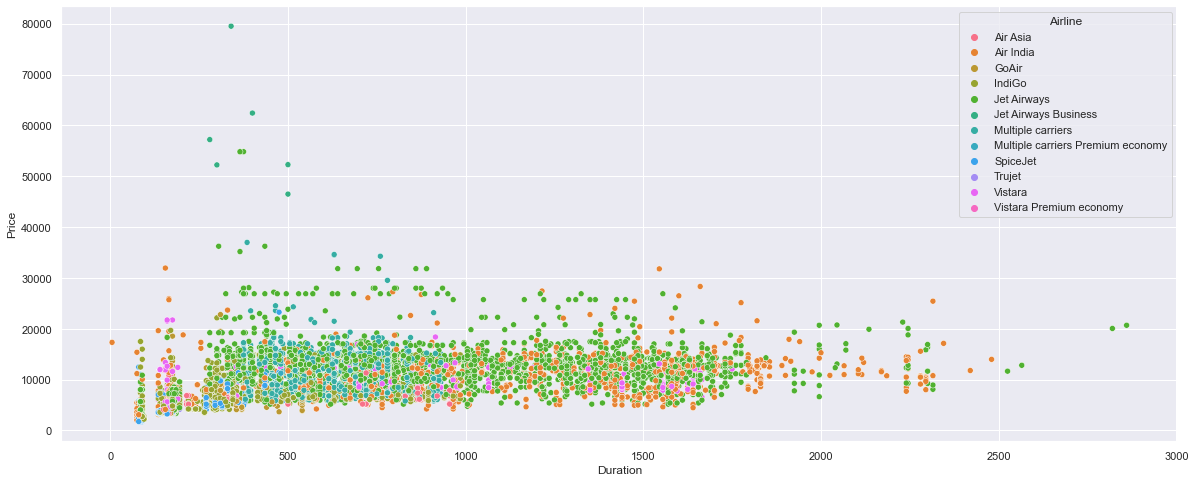

In [110]:
sns.set()
plt.figure(figsize=(20,8))
sns.scatterplot(x = "Duration", y = "Price", hue = "Airline",data = df);
#en çok jet airways hava yolu şirketinin uçuş yaptığı ortaya çıkar.
#aykırı değerlerde görünmektedir.

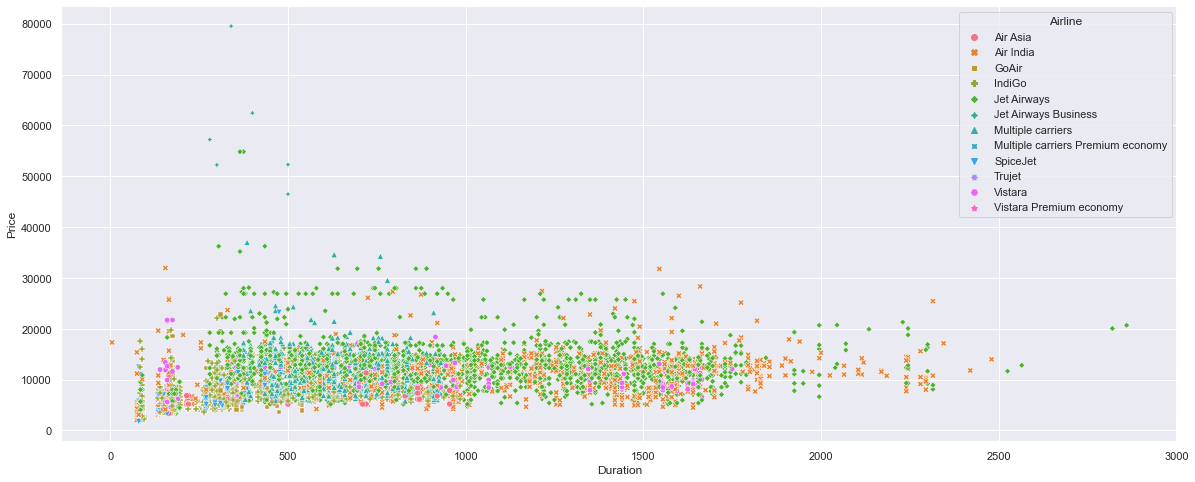

In [111]:
sns.set()
plt.figure(figsize=(20,8))
sns.scatterplot(x = "Duration", y = "Price", hue = "Airline", style = "Airline",data = df);
#en çok jet airways hava yolu şirketinin uçuş yaptığı ortaya çıkar.
#aykırı değerlerde görünmektedir.

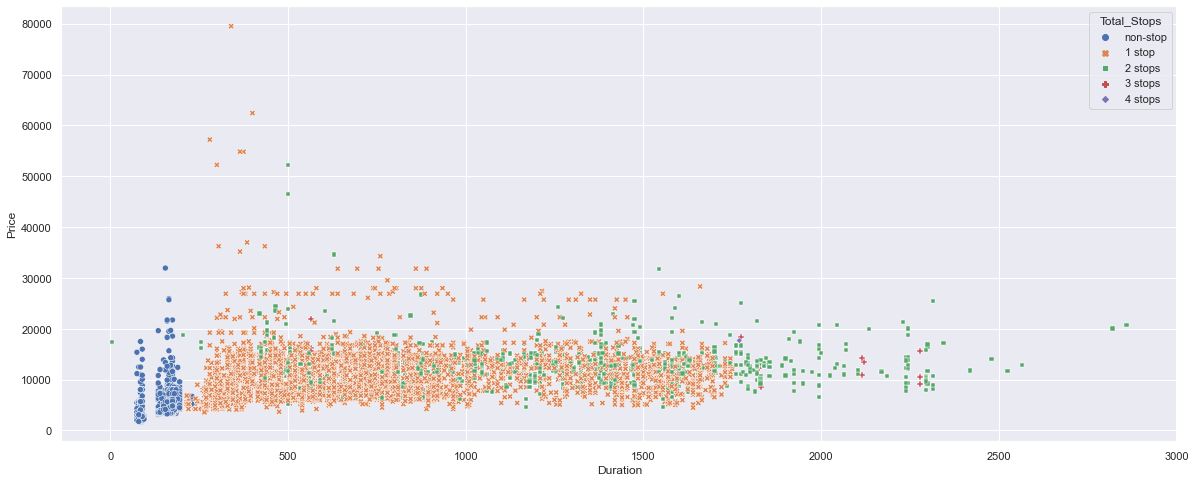

In [112]:
sns.set()
plt.figure(figsize=(20,8))
sns.scatterplot(x = "Duration", y = "Price", hue = "Total_Stops", style = "Total_Stops",data = df);
#en çok 1 kere duran uçuşların olduğu gözlemlenmiştir.
#aykırı değerlerde görünmektedir.

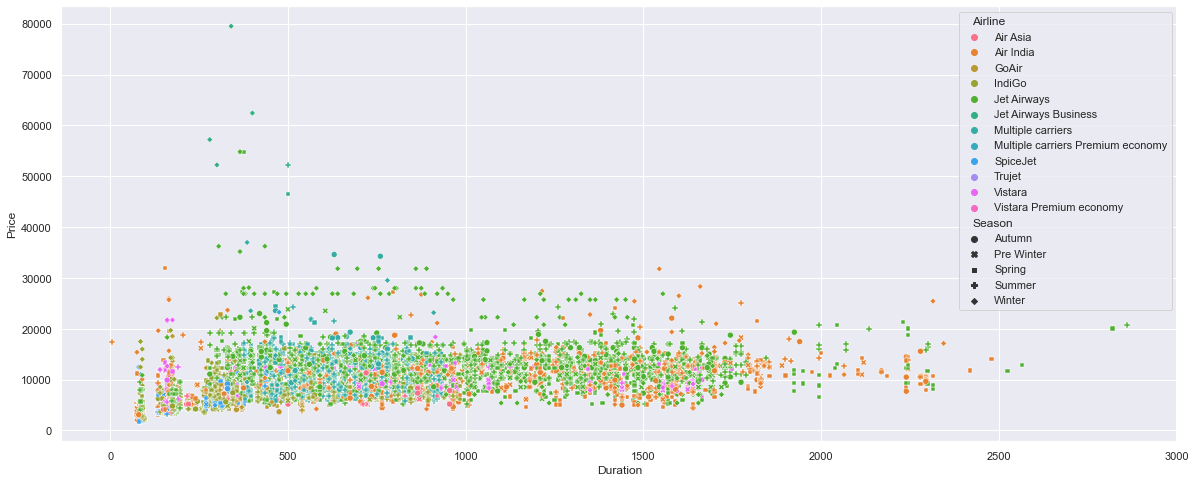

In [113]:
sns.set()
plt.figure(figsize=(20,8))
sns.scatterplot(x = "Duration", y = "Price", hue = "Airline", style = "Season",data = df);
# en çok jet airways havayolunun yaptığı uçuşlar olmuş aynı zamanda yaz ayında yapılan uçuşlar fazladır.

## DOĞRUSAL İLİŞKİNİN GÖZLEMLENMESİ

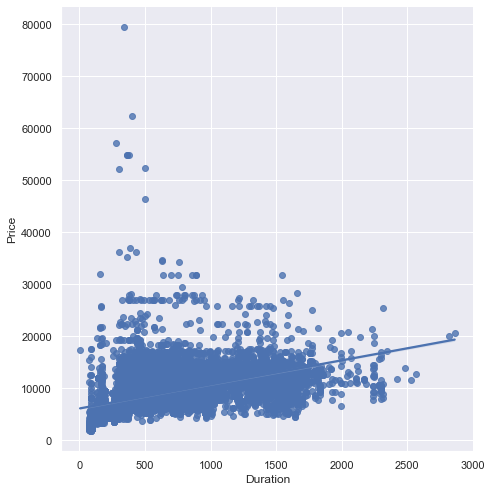

In [114]:
sns.lmplot(x = "Duration", y = "Price",height=7, data = df);
# düzgün artış yapan bir doğrusal ilişki yoktur. aykırı değerler görünmektedir. grafiğe bakıldığında doğrusal ilşkinin 
#az da olsa olduğunu görürüz.

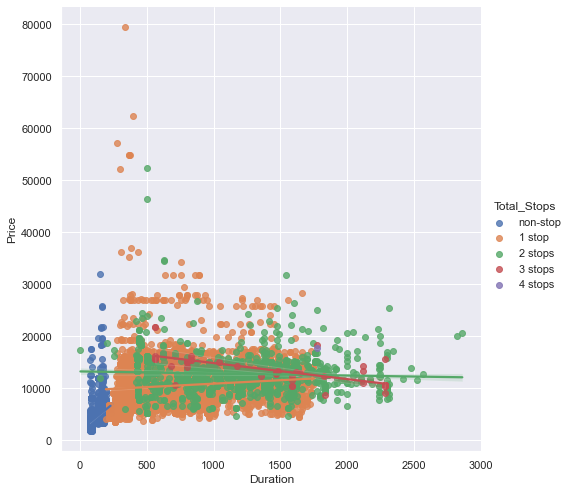

In [115]:
sns.lmplot(x = "Duration", y = "Price", hue = "Total_Stops", height=7, data = df);
#total stops incelnediğinde doğrusal bir ilşki olmadığını söyleyebilirz.

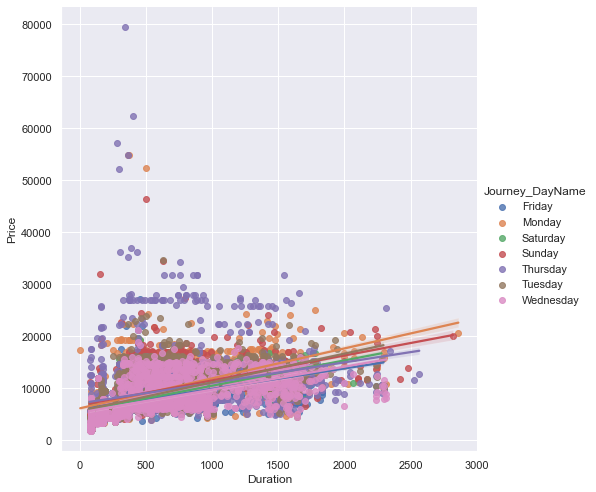

In [116]:
sns.lmplot(x = "Duration", y = "Price", hue = "Journey_DayName", height=7, data = df);
#bu günlerde yapılan uçuşlar gözlemlendiğinde doğrusal bir ilişki var diyebiliriz.

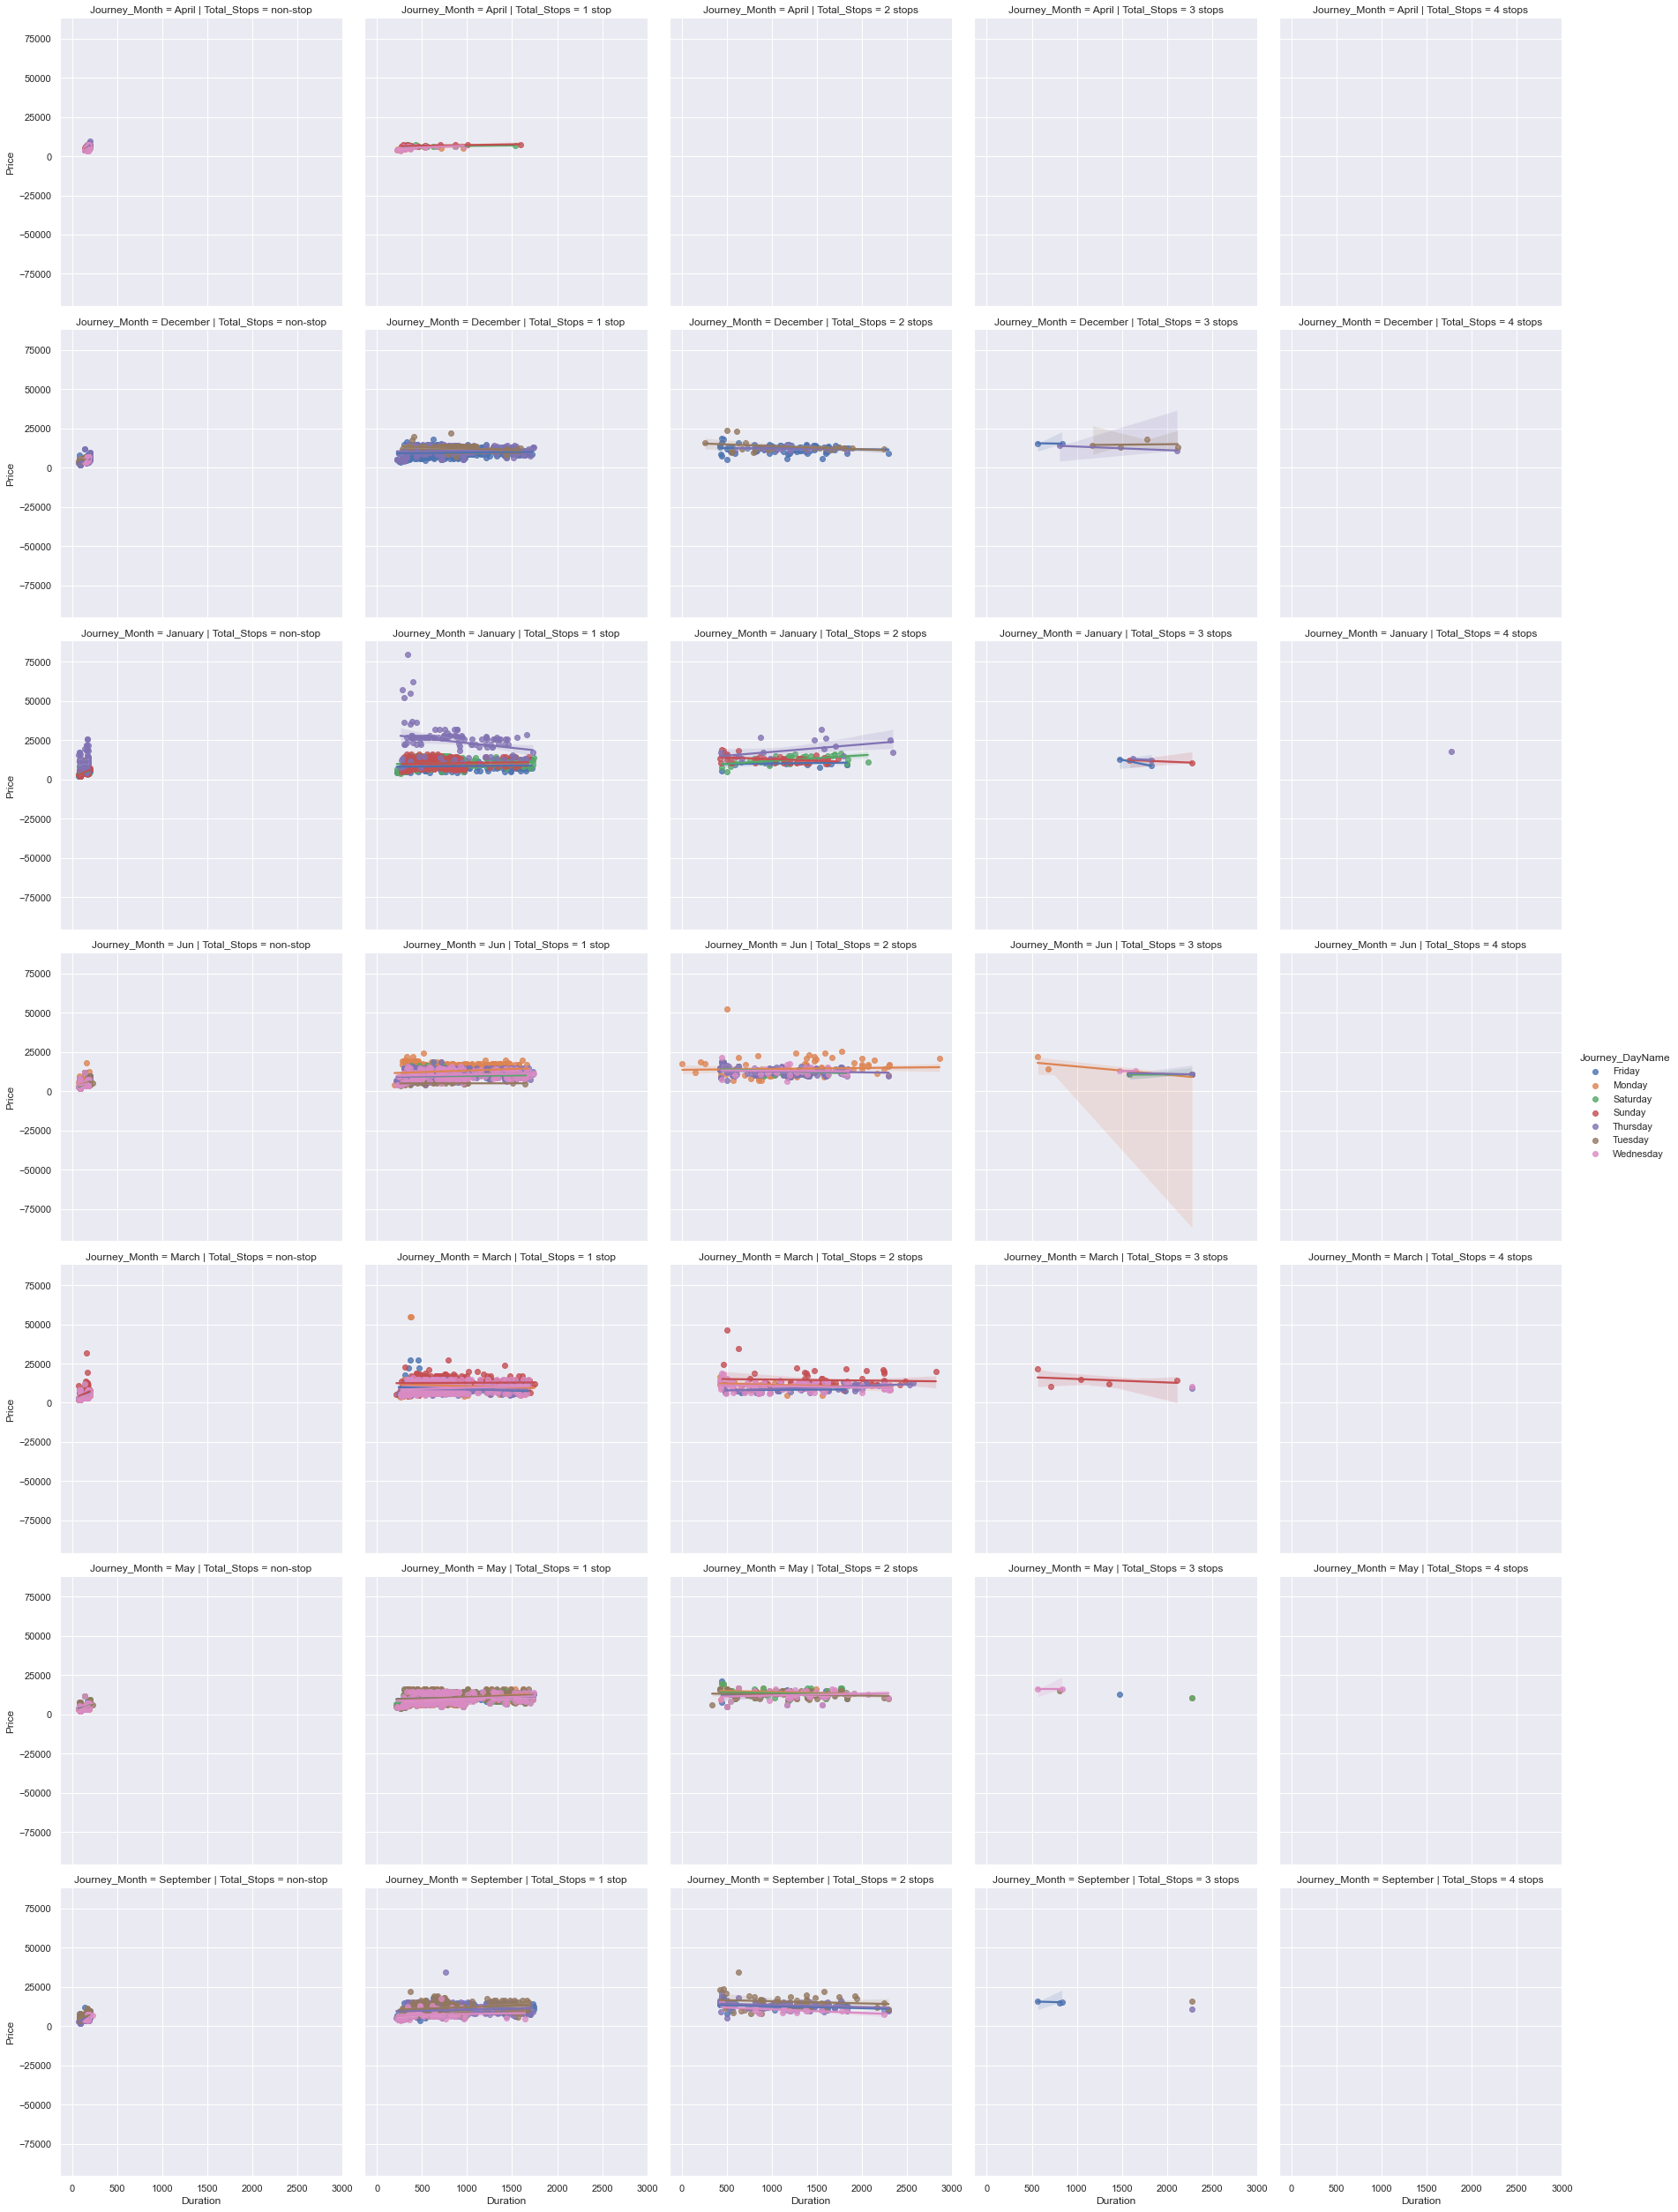

In [117]:
sns.lmplot(x = "Duration", y = "Price", hue = "Journey_DayName", col = "Total_Stops", row="Journey_Month",height=5 ,data = df);
#grafiğe bakıldığında bu kategorik değişkenler birbirinden bağımsız görünüyor. 
#hiç bir şekilde doğrusal ilişki gözlenmemiştir.

### SCATTER PLOT MATRİSİ

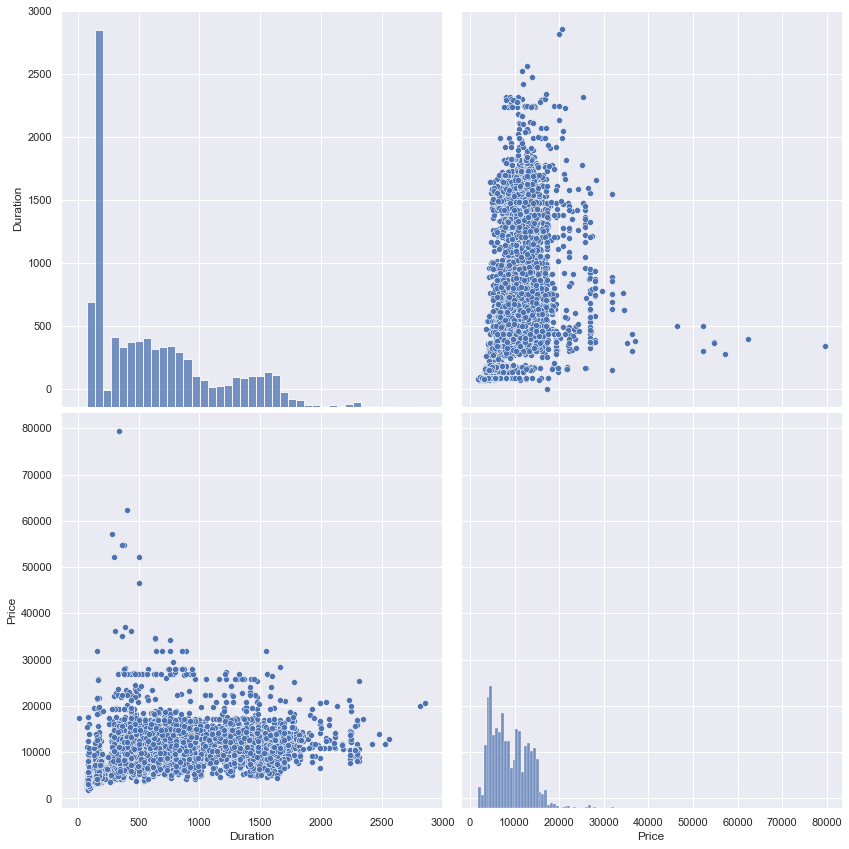

In [118]:
#solda satır isimleri altta sutun isimlerinin çaprazlanma sonuçları
sns.pairplot(df, height=6);

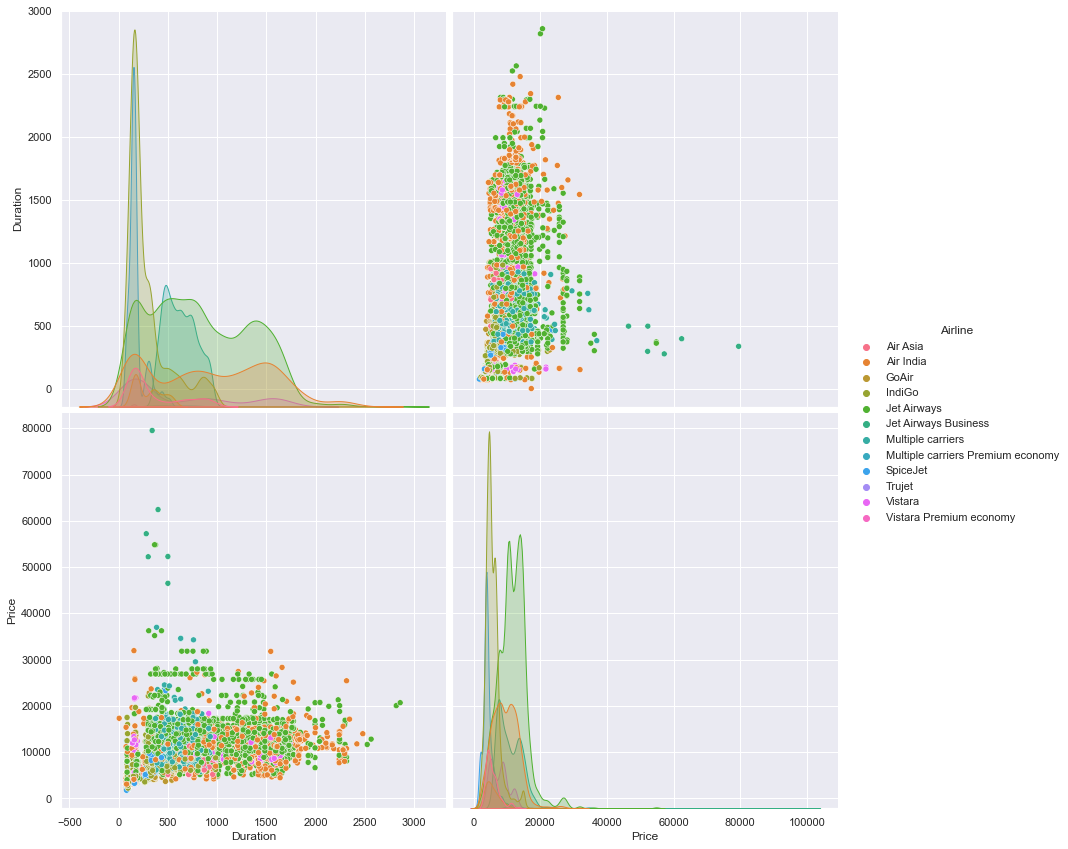

In [119]:
#tür bilgisini de grafiğe ekleyelim
sns.pairplot(df, height=6,hue = "Airline");

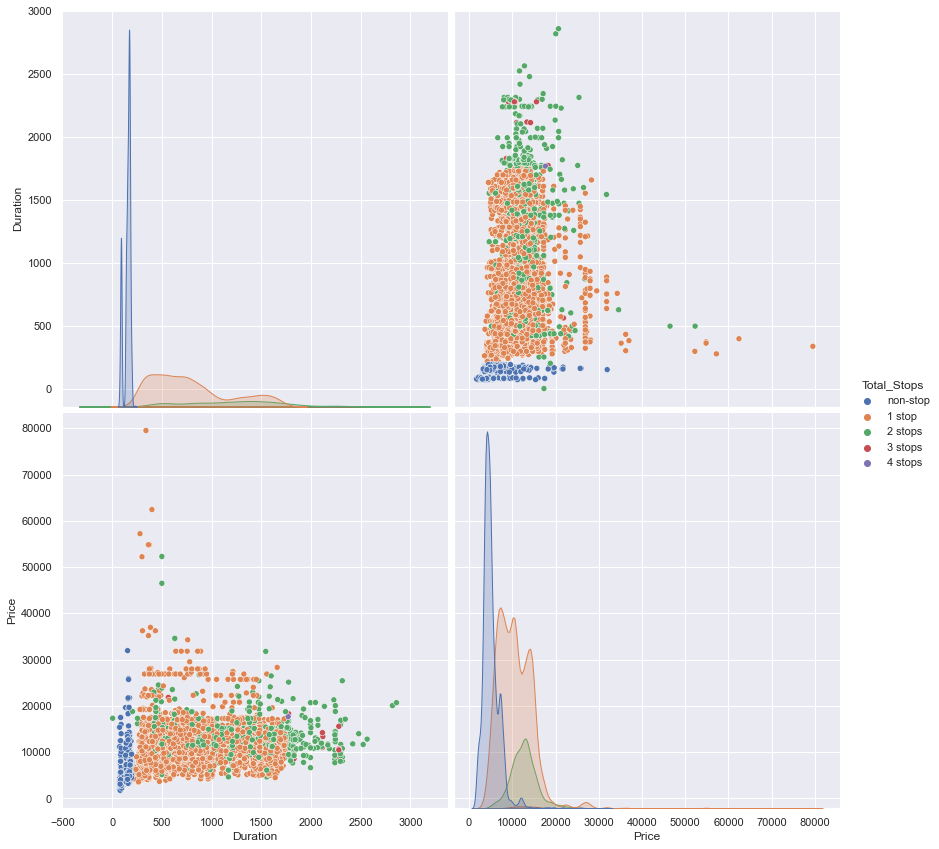

In [120]:
sns.pairplot(df, height=6,hue = "Total_Stops");
#  diğerlerine göre 1 kere duran uçuşların sayısı fazladır.

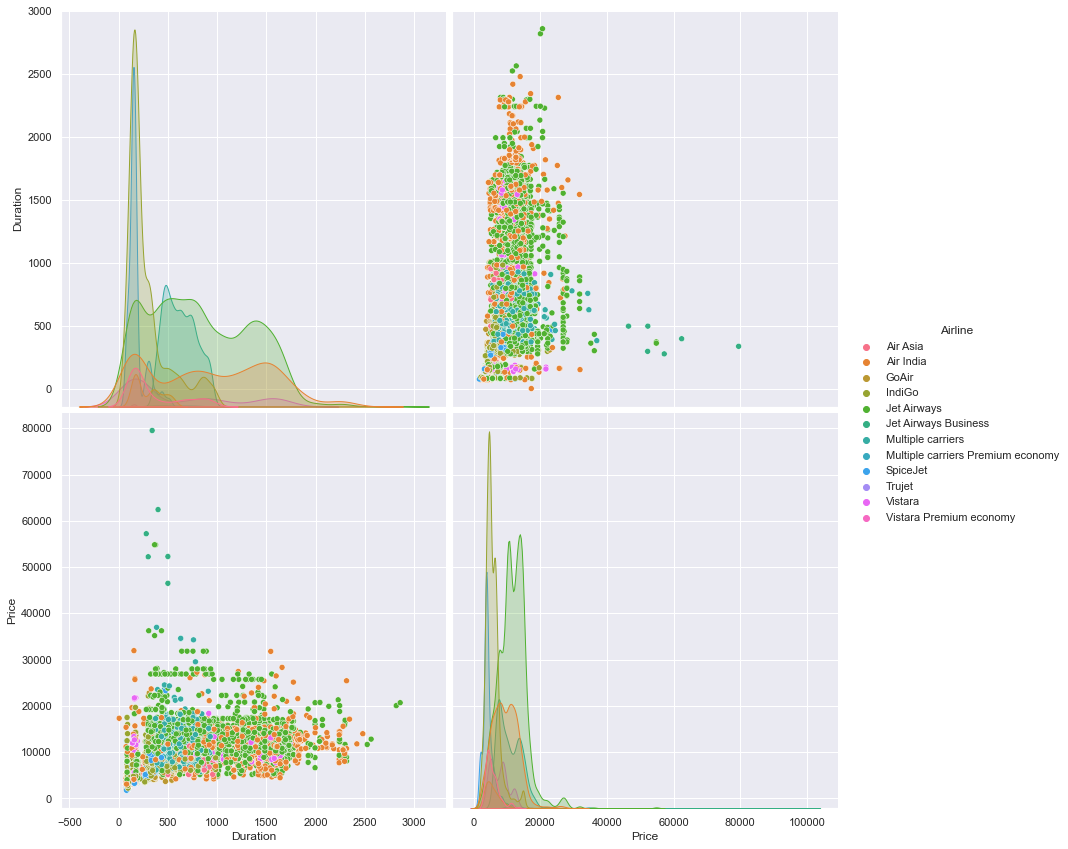

In [121]:
sns.pairplot(df, height=6,hue = "Airline");
#jet airways hava yolu şirketi çoğunluktadır.

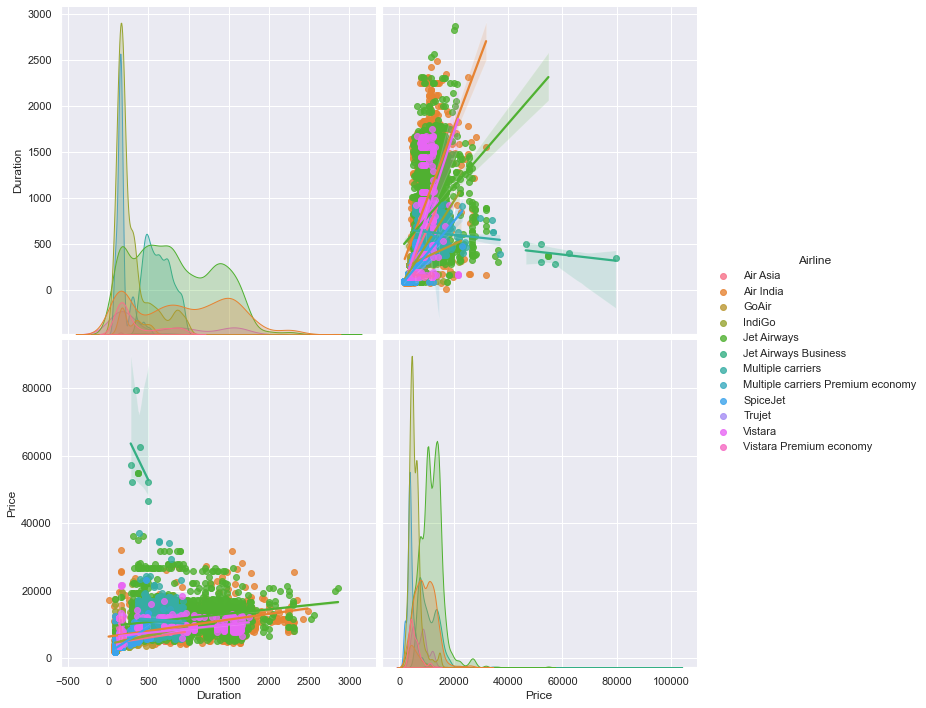

In [122]:
sns.pairplot(df, kind = "reg", hue = "Airline",height=5);
#jet airways hava yolu şirketi için doğrusallık ön plandadır.

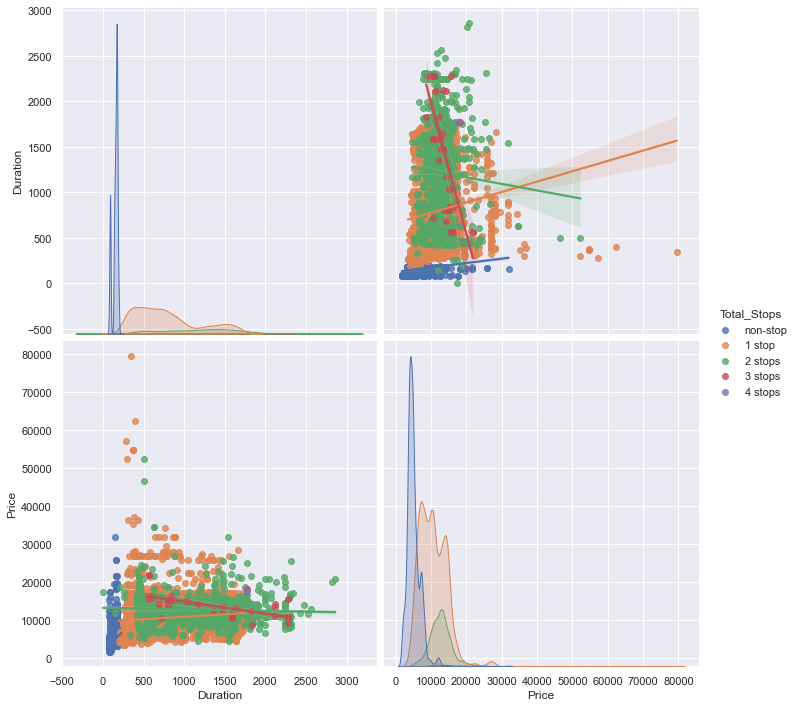

In [151]:
sns.pairplot(df, kind = "reg", hue = "Total_Stops",height=5);

## VARSAYIM KONTROLÜ 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


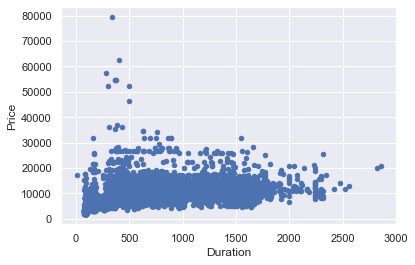

In [123]:
df.plot.scatter("Duration","Price");
#iki sayısal arasındaki ilişki gözlemlenmiş aykırı değerler göz önüne çıkmıştır.
#bu iki sayısal değişkeni daha yakından inceleyelim

In [124]:
from scipy.stats import shapiro
test_istatistigi, pvalue = shapiro(df["Duration"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["Price"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

#bu sonuçtan anlıyoruzki p değerine bakarak uçuş süresi ile ücret arasında anlamlı bir ilişki yok.

Test İstatistiği = 0.8853, p-değeri = 0.0000
Test İstatistiği = 0.8924, p-değeri = 0.0000


##### HO: p = 0 (değişkenler arasında korelasyon yoktur)

##### H1: p != 0 (değişkenler arasında korelasyon vardır yani değişkenler arasında anlamlı bir ilişki vardır)

In [125]:
df["Duration"].corr(df["Price"]) #defaultta pearson metodunu kullanır. varsayım sağlanmadığından spearman kullanmamız gerekir

0.5017579376022412

##### 0.50 değerinden çıkartıyoruz ki;
##### (+) değer olduğundan pozitif yönlü
##### 0.5'e yakın olduğundan da düşük bir korelasyon olduğunu varsayabiliriz.

In [126]:
#H0'ı reddetmis olmasaydık
from scipy.stats.stats import pearsonr
test_istatistigi, pvalue = pearsonr(df["Duration"],df["Price"])
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5018, p-değeri = 0.0000


In [127]:
from scipy.stats import stats
stats.spearmanr(df["Duration"],df["Price"])

SpearmanrResult(correlation=0.6939713611835066, pvalue=0.0)

In [128]:
#spearman'a alternatif olarak (işi garantiye almak için de diyebiliriz)
test_istatistigi, pvalue = stats.kendalltau(df["Duration"],df["Price"])
print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5006, p-değeri = 0.0000


## ÇİZGİ GRAFİĞİ

In [129]:
df.head()

Airline    Source Destination       Dep_Time Arrival_Time  Duration  \
0       IndiGo  Banglore   New Delhi          Night   Late Night       170   
1    Air India   Kolkata    Banglore  Early Morning         Noon       445   
2  Jet Airways     Delhi      Cochin        Morning   Late Night      1140   
3       IndiGo   Kolkata    Banglore        Evening        Night       325   
4       IndiGo  Banglore   New Delhi           Noon        Night       285   

  Total_Stops Additional_Info  Price Journey_DayName Journey_Month      Season  
0    non-stop         No info   3897          Sunday         March      Spring  
1     2 stops         No info   7662        Saturday       January      Winter  
2     2 stops         No info  13882          Friday     September      Autumn  
3      1 stop         No info   6218        Thursday      December  Pre Winter  
4      1 stop         No info  13302        Thursday       January      Winter

In [130]:
df.Duration.describe()

count    10462.000000
mean       629.781591
std        500.699045
min          5.000000
25%        170.000000
50%        505.000000
75%        910.000000
max       2860.000000
Name: Duration, dtype: float64

In [131]:
df.Price.describe()

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64

In [132]:
df.groupby("Duration")["Price"].describe()
#iki değişkenin arasındaki ilişkiyi görelim

count          mean          std      min       25%      50%  \
Duration                                                                 
5           1.0  17327.000000          NaN  17327.0  17327.00  17327.0   
75         24.0   3944.333333  3028.131849   2050.0   2968.75   3100.0   
80         61.0   3286.377049  1468.076533   1759.0   2575.00   3100.0   
85        135.0   5011.162963  2571.991485   1759.0   3207.50   4995.0   
90        386.0   3721.484456  1938.385329   1759.0   2227.00   3100.0   
...         ...           ...          ...      ...       ...      ...   
2480        1.0  13990.000000          NaN  13990.0  13990.00  13990.0   
2525        1.0  11664.000000          NaN  11664.0  11664.00  11664.0   
2565        1.0  12819.000000          NaN  12819.0  12819.00  12819.0   
2820        1.0  20064.000000          NaN  20064.0  20064.00  20064.0   
2860        1.0  20694.000000          NaN  20694.0  20694.00  20694.0   

               75%      max  
Duration                     
5         17327.00  17327.0  
75         3231.25  15385.0  
80         3100.00  12475.0  
85         5678.00  17501.0  
90         4575.00  16000.0  
...            ...      ...  
2480      13990.00  13990.0  
2525      11664.00  11664.0  
2565      12819.00  12819.0  
2820      20064.00  20064.0  
2860      20694.00  20694.0  

[368 rows x 8 columns]

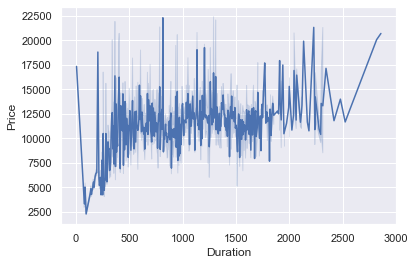

In [133]:
#koyu mavi ortalama değerler, açık mavi ise standart sapmayı ifade ediyor
sns.lineplot(x = "Duration", y = "Price", data = df);
#ikisi arasında doğrusal ilişki olduğunu söyleyebiliriz.

<AxesSubplot:xlabel='Duration', ylabel='Price'>

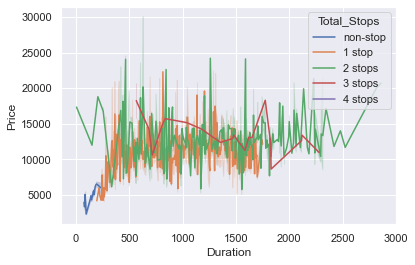

In [134]:
sns.lineplot(x = "Duration", y = "Price", hue = "Total_Stops", data = df)
# 1 ve 2 keren duran uçuşlarda doğrusallık  gözlemlenmiştir.

<AxesSubplot:xlabel='Duration', ylabel='Price'>

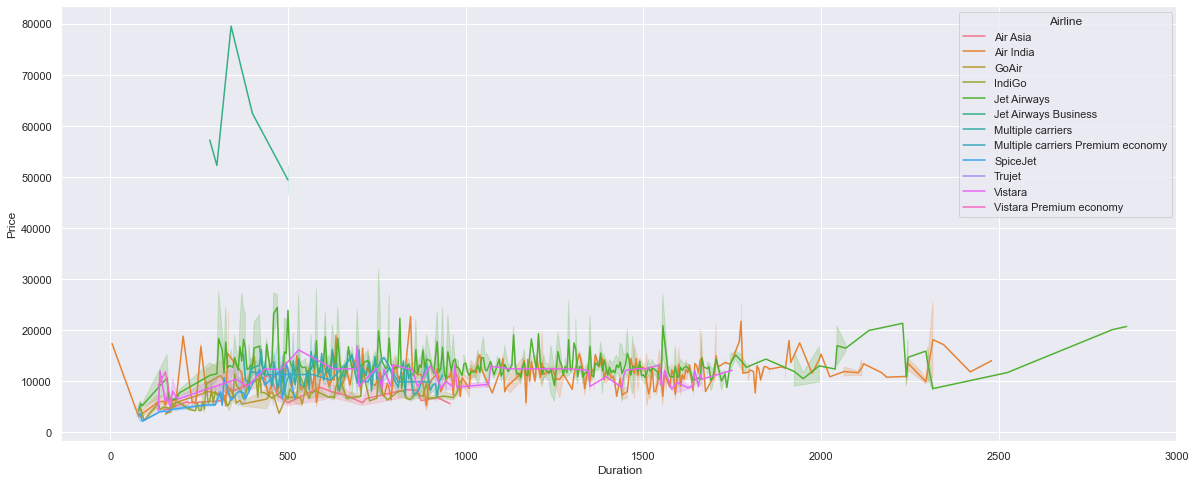

In [135]:
sns.set()
plt.figure(figsize=(20,8))
sns.lineplot(x = "Duration", y = "Price", hue = "Airline",data = df)
#jet airways havayolu şirketinde yapılan uçuşlarda doğrusallık var lakin aykırı değerler olduğundan sapmalar olmuştur.

<AxesSubplot:xlabel='Duration', ylabel='Price'>

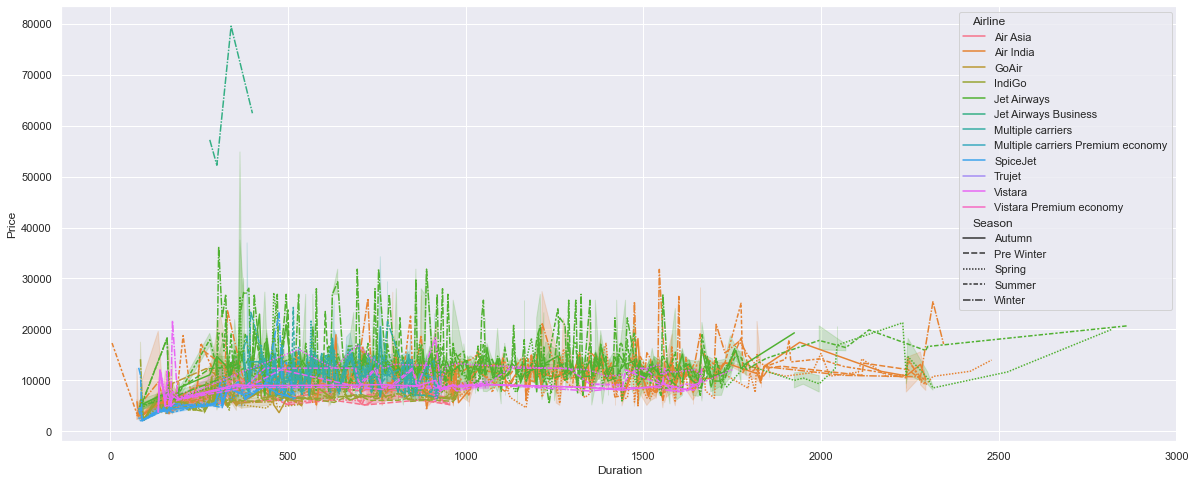

In [136]:
sns.set()
plt.figure(figsize=(20,8))
sns.lineplot(x = "Duration", y = "Price", hue = "Airline", style = "Season", data = df)
#jet airways havayolu şirketinde yapılan uçuşlarda doğrusallık var lakin aykırı değerler olduğundan sapmalar olmuştur.
#yaz ayında yapılan uçuşlar ön plandadır.

## VERİ ÖN İŞLEME

### Veri Temizleme

In [137]:
df.isnull().sum()
#null olan veriler var mı kontrol ediyoruz.

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_DayName    0
Journey_Month      0
Season             0
dtype: int64

In [138]:
df.duplicated().sum()
#tekrar eden veriler var mı kontrol ediyoruz.

260

In [139]:
df.drop_duplicates(inplace=True)
#tekrar eden veirleri siliyoruz.

In [140]:
df.duplicated().sum()

0

## AYKIRI GÖZLEM ANALİZİ

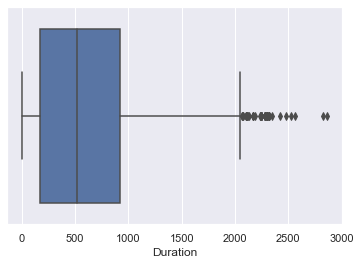

Q1: 170.0 , Q2: 515.0 ve Q3: 920.0 IQR=750.0
alt sınır:  -955.0    üst sınır:  2045.0
verilerdeki outlier:             Airline    Source Destination       Dep_Time Arrival_Time  \
226    Jet Airways     Delhi      Cochin  Early Morning      Evening   
553      Air India     Delhi      Cochin  Early Morning      Evening   
919      Air India   Kolkata    Banglore        Morning        Night   
925    Jet Airways     Delhi      Cochin           Noon   Late Night   
966      Air India     Delhi      Cochin  Early Morning      Evening   
...            ...       ...         ...            ...          ...   
9703     Air India     Delhi      Cochin  Early Morning      Evening   
10020    Air India     Delhi      Cochin  Early Morning      Evening   
10326    Air India  Banglore   New Delhi  Early Morning        Night   
10456  Jet Airways     Delhi      Cochin        Evening      Evening   
10639    Air India     Delhi      Cochin  Early Morning      Evening   

       Duration Total_Stops

In [141]:
#veriyi hazır hale getirmek için öncelikle outlier verileri çıkarmamız gerekir.
sns.boxplot(x=df["Duration"])
plt.show()

sorted_Duration=df["Duration"].sort_values()
Q1=df["Duration"].quantile(0.25)
Q2=df["Duration"].quantile(0.5)
Q3=df["Duration"].quantile(0.75)
IQR=Q3-Q1
print(f"Q1: {Q1} , Q2: {Q2} ve Q3: {Q3} IQR={IQR}")
alt_sınır=Q1-(1.5*IQR)
ust_sınır=Q3+(1.5*IQR)
print("alt sınır: ", alt_sınır, " ", " üst sınır: ",ust_sınır)

outlier_df = df[(sorted_Duration < alt_sınır) | (sorted_Duration > ust_sınır)]
print("verilerdeki outlier: ", outlier_df)


In [142]:
outlier_df.sort_values(by='Duration', ascending=True).head()
#aykırı verileri küçükten büyüğe doğru sıralıyoruz.

Airline    Source Destination       Dep_Time Arrival_Time  Duration  \
2980    Air India   Kolkata    Banglore  Early Morning         Noon      2065   
2571    Air India   Kolkata    Banglore  Early Morning         Noon      2065   
5061  Jet Airways     Delhi      Cochin        Evening   Late Night      2070   
9190  Jet Airways     Delhi      Cochin        Evening   Late Night      2070   
4785    Air India  Banglore   New Delhi        Morning        Night      2105   

     Total_Stops              Additional_Info  Price Journey_DayName  \
2980     2 stops                      No info  10991        Saturday   
2571     2 stops                      No info  12723       Wednesday   
5061     2 stops  In-flight meal not included  15812          Monday   
9190     2 stops                      No info  17072          Monday   
4785     2 stops                      No info  11948          Sunday   

     Journey_Month  Season  
2980       January  Winter  
2571           May  Summer  
5061           Jun  Summer  
9190           Jun  Summer  
4785         March  Spring

In [143]:
#outlier verileri data dan sileriz, temizlediğimiz data
df=df[df["Duration"] < 2000]
print(df)

           Airline    Source Destination       Dep_Time   Arrival_Time  \
0           IndiGo  Banglore   New Delhi          Night     Late Night   
1        Air India   Kolkata    Banglore  Early Morning           Noon   
2      Jet Airways     Delhi      Cochin        Morning     Late Night   
3           IndiGo   Kolkata    Banglore        Evening          Night   
4           IndiGo  Banglore   New Delhi           Noon          Night   
...            ...       ...         ...            ...            ...   
10677     SpiceJet  Banglore       Delhi  Early Morning  Early Morning   
10678     Air Asia   Kolkata    Banglore        Evening          Night   
10679    Air India   Kolkata    Banglore        Evening          Night   
10681      Vistara  Banglore   New Delhi        Morning           Noon   
10682    Air India     Delhi      Cochin        Morning        Evening   

       Duration Total_Stops               Additional_Info  Price  \
0           170    non-stop                

<AxesSubplot:xlabel='Duration'>

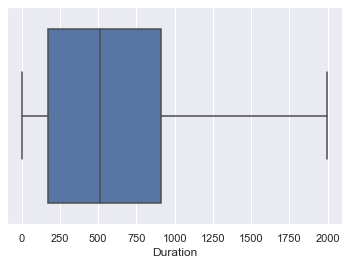

In [144]:
sns.boxplot(x = df["Duration"])
#tekrar bi kontrol edelim aykırı değer var mı

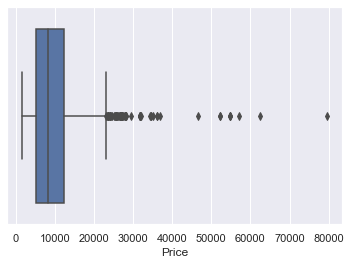

Q1: 5228.0 , Q2: 8307.0 ve Q3: 12373.0 IQR=7145.0
alt sınır:  -5489.5    üst sınır:  23090.5
verilerdeki outlier:                      Airline    Source Destination       Dep_Time  \
123               Air India     Delhi      Cochin          Night   
396       Multiple carriers     Delhi      Cochin        Morning   
486             Jet Airways  Banglore   New Delhi  Early Morning   
510             Jet Airways  Banglore   New Delhi  Early Morning   
597               Air India    Mumbai   Hyderabad        Morning   
...                     ...       ...         ...            ...   
10353           Jet Airways    Mumbai   Hyderabad        Evening   
10364  Jet Airways Business  Banglore   New Delhi        Morning   
10383           Jet Airways  Banglore   New Delhi  Early Morning   
10439           Jet Airways  Banglore   New Delhi        Evening   
10511             Air India  Banglore   New Delhi  Early Morning   

        Arrival_Time  Duration Total_Stops Additional_Info  Price  \

In [145]:
#veriyi hazır hale getirmek için öncelikle outlier verileri çıkarmamız gerekir.
sns.boxplot(x=df["Price"])
plt.show()

sorted_Duration=df["Price"].sort_values()
Q1=df["Price"].quantile(0.25)
Q2=df["Price"].quantile(0.5)
Q3=df["Price"].quantile(0.75)
IQR=Q3-Q1
print(f"Q1: {Q1} , Q2: {Q2} ve Q3: {Q3} IQR={IQR}")
alt_sınır=Q1-(1.5*IQR)
ust_sınır=Q3+(1.5*IQR)
print("alt sınır: ", alt_sınır, " ", " üst sınır: ",ust_sınır)

outlier_df = df[(sorted_Duration < alt_sınır) | (sorted_Duration > ust_sınır)]
print("verilerdeki outlier: ", outlier_df)

In [146]:
outlier_df.sort_values(by='Price', ascending=True).head()
#93 tane satır olduğundan dolayı küçükten büyüğe doğru sıralayarak en küçük Price verisini bulduk

Airline    Source Destination       Dep_Time Arrival_Time  \
8020  Multiple carriers     Delhi      Cochin     Late Night         Noon   
5136           SpiceJet  Banglore   New Delhi        Morning      Evening   
8990        Jet Airways    Mumbai   Hyderabad  Early Morning         Noon   
1341  Multiple carriers     Delhi      Cochin        Evening   Late Night   
1196  Multiple carriers     Delhi      Cochin        Evening   Late Night   

      Duration Total_Stops Additional_Info  Price Journey_DayName  \
8020       910      1 stop         No info  23170        Thursday   
5136       475      1 stop         No info  23267        Thursday   
8990       605     2 stops         No info  23528         Tuesday   
1341       395      1 stop         No info  23533        Thursday   
1196       465     2 stops         No info  23583         Tuesday   

     Journey_Month      Season  
8020       January      Winter  
5136       January      Winter  
8990      December  Pre Winter  
1341       January      Winter  
1196     September      Autumn

In [147]:
#outlier verileri data dan sileriz, temizlediğimiz data
# en düşük 23170 görünüyor lakin boxplotta hala aykırı değer gözüktüğü için 22800 aldım
df=df[df["Price"] < 22800]
print(df)

           Airline    Source Destination       Dep_Time   Arrival_Time  \
0           IndiGo  Banglore   New Delhi          Night     Late Night   
1        Air India   Kolkata    Banglore  Early Morning           Noon   
2      Jet Airways     Delhi      Cochin        Morning     Late Night   
3           IndiGo   Kolkata    Banglore        Evening          Night   
4           IndiGo  Banglore   New Delhi           Noon          Night   
...            ...       ...         ...            ...            ...   
10677     SpiceJet  Banglore       Delhi  Early Morning  Early Morning   
10678     Air Asia   Kolkata    Banglore        Evening          Night   
10679    Air India   Kolkata    Banglore        Evening          Night   
10681      Vistara  Banglore   New Delhi        Morning           Noon   
10682    Air India     Delhi      Cochin        Morning        Evening   

       Duration Total_Stops               Additional_Info  Price  \
0           170    non-stop                

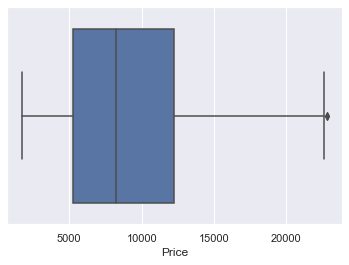

In [148]:
sns.boxplot(x = df["Price"]);
#Aykırı veri silindiği teyit edildi.

## ONE HOT ENCODİNG 

##### one hot encoding ile kategorik değişkenleri 0 veya 1 olarak düzenleyeceğiz. 

In [149]:
df = pd.get_dummies(df, columns=["Airline", "Source", "Destination", "Dep_Time", "Arrival_Time", "Total_Stops",
                                 "Additional_Info", "Journey_DayName", "Journey_Month", "Season"])
df.head()
#kategorik değişkenler get_dummies ile 0 veya 1 değerlerini alırlar

Duration  Price  Airline_Air Asia  Airline_Air India  Airline_GoAir  \
0       170   3897                 0                  0              0   
1       445   7662                 0                  1              0   
2      1140  13882                 0                  0              0   
3       325   6218                 0                  0              0   
4       285  13302                 0                  0              0   

   Airline_IndiGo  Airline_Jet Airways  Airline_Jet Airways Business  \
0               1                    0                             0   
1               0                    0                             0   
2               0                    1                             0   
3               1                    0                             0   
4               1                    0                             0   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  ...  \
0                          0                                          0  ...   
1                          0                                          0  ...   
2                          0                                          0  ...   
3                          0                                          0  ...   
4                          0                                          0  ...   

   Journey_Month_January  Journey_Month_Jun  Journey_Month_March  \
0                      0                  0                    1   
1                      1                  0                    0   
2                      0                  0                    0   
3                      0                  0                    0   
4                      1                  0                    0   

   Journey_Month_May  Journey_Month_September  Season_Autumn  \
0                  0                        0              0   
1                  0                        0              0   
2                  0                        1              1   
3                  0                        0              0   
4                  0                        0              0   

   Season_Pre Winter  Season_Spring  Season_Summer  Season_Winter  
0                  0              1              0              0  
1                  0              0              0              1  
2                  0              0              0              0  
3                  1              0              0              0  
4                  0              0              0              1  

[5 rows x 71 columns]

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10032 entries, 0 to 10682
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Duration                                      10032 non-null  int64
 1   Price                                         10032 non-null  int64
 2   Airline_Air Asia                              10032 non-null  uint8
 3   Airline_Air India                             10032 non-null  uint8
 4   Airline_GoAir                                 10032 non-null  uint8
 5   Airline_IndiGo                                10032 non-null  uint8
 6   Airline_Jet Airways                           10032 non-null  uint8
 7   Airline_Jet Airways Business                  10032 non-null  uint8
 8   Airline_Multiple carriers                     10032 non-null  uint8
 9   Airline_Multiple carriers Premium economy     10032 non-null  uint8
 10  Airline_Sp

# MODEL DEĞERLENDİRME

## 1. DOĞRUSAL REGRESYON

In [151]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error          # MSe
from sklearn.metrics import r2_score # R²  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [152]:
X = df.drop('Price', axis = 1)
y = df['Price']
#randomstate her üretme işleminde farklı değerler çıkmasını istemedigimizden rastgele bir değer veriyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8025, 70)
(8025,)
(2007, 70)
(2007,)


## DEĞİŞKEN STANDARDİZASYONU

In [153]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
#standart scale işlemi yapıldı

In [154]:
models = {
    "Lineer Regression" : LinearRegression(),
    "      PLSRegression" : PLSRegression(),
    "     Ridge" : Ridge(alpha=0.1),
    "     Lasso" : Lasso(alpha = 0.1)
}

In [155]:
for name,model in models.items():
    print(name," :")
    lr=model.fit(X_train,y_train)
    lr_pred_test = lr.predict(X_test)
    lr_pred_egitim = lr.predict(X_train)
    predictions = lr.predict(X_test).round()
    dogruluk = accuracy_score(y_test, predictions)
    print("Accuracy: {:.4%}".format(dogruluk))
    print('Training Score:',lr.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,lr_pred_test))
    print('Diğer metrikler: ')
    b=np.sqrt(mean_squared_error(y_test,lr_pred_test))
    print('Test Hatası--> MSE: ',b)
    c=np.sqrt(mean_squared_error(y_train,lr_pred_egitim))
    print('Eğitim Hatası--> MSE: ',c)
    print('MAE:',np.sqrt(mean_absolute_error(y_test,lr_pred_test)))
    cross_val=cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()
    print("Adjusted_r2 : ",cross_val)
    print("------------------------------")
    print("cross-validation : ",cross_val_score(model, X_train, y_train, cv = 10).mean() )
    print(" ")

Lineer Regression  :
Accuracy: 0.0498%
Training Score: 0.7199154290982229
Testing Score: 0.7126504421100459
Diğer metrikler: 
Test Hatası--> MSE:  2156.0797707993365
Eğitim Hatası--> MSE:  2154.7114869267084
MAE: 39.877568625621095
Adjusted_r2 :  0.7163535637205547
------------------------------
cross-validation :  0.7163535637205547
 
      PLSRegression  :
Accuracy: 0.0000%
Training Score: 0.6614904233043444
Testing Score: 0.6580134924984471
Diğer metrikler: 
Test Hatası--> MSE:  2352.144748529351
Eğitim Hatası--> MSE:  2368.8088345064584
MAE: 42.23819663320761
Adjusted_r2 :  0.6582103351707335
------------------------------
cross-validation :  0.6582103351707335
 
     Ridge  :
Accuracy: 0.0498%
Training Score: 0.7199129882491431
Testing Score: 0.7126652758523511
Diğer metrikler: 
Test Hatası--> MSE:  2156.024118817978
Eğitim Hatası--> MSE:  2154.7208757232333
MAE: 39.877110521132
Adjusted_r2 :  0.7163799563844129
------------------------------
cross-validation :  0.7163799563844129

##### Burada mse ve mae en az olana baktığımızda Ridge ile lineer in olduğunu görürüz. ikisinde de r2 skorları aynı gibi. Addjusted r2 skora baktığımız değer hangisinde daha yüksekse o model daha iyidir. böylelikle Ridge bu modeller arasında iyi olandır.

### 2. DOĞRUSAL OLMAYAN REGRESYON

In [156]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error          # MSe
from sklearn.metrics import r2_score                    # R²  
from sklearn import metrics
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [157]:
models = {
    "Destek vektör regresyonu -->SVR" : LinearSVR(),
    "Kneighbor regresyon" : KNeighborsRegressor(),
    "     Yapay Sinir Ağı -->YSA" : MLPRegressor(hidden_layer_sizes = (100,20)),
    "     Decision Tree" : DecisionTreeRegressor(),
    "Gradient boosting Regressor ":GradientBoostingRegressor()
}

In [159]:
for name,model in models.items():
    print(name," :")
    lr=model.fit(X_train,y_train)
    lr_pred_test = lr.predict(X_test)
    lr_pred_egitim = lr.predict(X_train)
    predictions = lr.predict(X_test).round()
    dogruluk = accuracy_score(y_test, predictions)
    print("Accuracy: {:.4%}".format(dogruluk))
    print('Training Score:',lr.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,lr_pred_test))
    print('Diğer metrikler: ')
    b=np.sqrt(mean_squared_error(y_test,lr_pred_test))
    print('Test Hatası--> MSE: ',b)
    c=np.sqrt(mean_squared_error(y_train,lr_pred_egitim))
    print('Eğitim Hatası--> MSE: ',c)
    print('MAE:',np.sqrt(mean_absolute_error(y_test,lr_pred_test)))
    cross_val=cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()
    print("Adjusted_r2 : ",cross_val)
    print("------------------------------")
    print("cross-validation : ",cross_val_score(model, X_train, y_train, cv = 10).mean() )
    print(" ")

Destek vektör regresyonu -->SVR  :
Accuracy: 0.0498%
Training Score: 0.3766410913021757
Testing Score: 0.39048736098319337
Diğer metrikler: 
Test Hatası--> MSE:  3140.153773958101
Eğitim Hatası--> MSE:  3214.5014019552123
MAE: 46.83595605075182
Adjusted_r2 :  0.34465764351458056
------------------------------
cross-validation :  0.33025174805902735
 
Kneighbor regresyon  :
Accuracy: 1.5944%
Training Score: 0.7952087166011386
Testing Score: 0.6941151213834571
Diğer metrikler: 
Test Hatası--> MSE:  2224.53151271482
Eğitim Hatası--> MSE:  1842.4693334098572
MAE: 38.54586562591404
Adjusted_r2 :  0.6772599473821895
------------------------------
cross-validation :  0.6772599473821895
 
     Yapay Sinir Ağı -->YSA  :
Accuracy: 0.0498%
Training Score: 0.7298207895698383
Testing Score: 0.7193021901714697
Diğer metrikler: 
Test Hatası--> MSE:  2130.9785108964065
Eğitim Hatası--> MSE:  2116.267187570441
MAE: 39.02365838824987
Adjusted_r2 :  0.720063359282564
------------------------------
cross-

##### Bu modellere bakıldığında en iyi model Decision Tree olmuştur. training score aynı zamanda modelin skorunu da vermketedir. mse-mae değerleride düşük olduğundan uygundur.

### Kneighbor regression

In [160]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
print(knn_model.n_neighbors) 
print(knn_model.effective_metric_)

5
euclidean


In [161]:
y_pred = knn_model.predict(X_test)
print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))
RMSE = [] 
RMSE_CV = []
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse, "   RMSE_CV değeri: ", rmse_cv )


test hatası: 2224.53151271482
k = 1 için RMSE değeri:  694.9549261701076    RMSE_CV değeri:  2888.6264164012805
k = 2 için RMSE değeri:  1444.0416096731042    RMSE_CV değeri:  2473.6870212894128
k = 3 için RMSE değeri:  1639.42363285009    RMSE_CV değeri:  2353.096350313418
k = 4 için RMSE değeri:  1760.337112777849    RMSE_CV değeri:  2311.1039185365585
k = 5 için RMSE değeri:  1842.4693334098572    RMSE_CV değeri:  2311.621303604544
k = 6 için RMSE değeri:  1905.242564629541    RMSE_CV değeri:  2308.000444937409
k = 7 için RMSE değeri:  1964.690834373113    RMSE_CV değeri:  2322.6225349228584
k = 8 için RMSE değeri:  2014.2726677621026    RMSE_CV değeri:  2328.223966123659
k = 9 için RMSE değeri:  2051.0420496513716    RMSE_CV değeri:  2351.0413419607303
k = 10 için RMSE değeri:  2091.2740630963317    RMSE_CV değeri:  2378.4284105799106


### Yapay Sinir Ağları

In [138]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train, y_train)
print(mlp_model)
print(mlp_model.n_layers_)
print(mlp_model.hidden_layer_sizes)

MLPRegressor(hidden_layer_sizes=(100, 20))
4
(100, 20)


### Karar Ağaçları

In [162]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1902.7717342280523

In [163]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)
#gridsearch çok büyük veri setlerinde zaman almaktadır.

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [164]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 2}

In [165]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [166]:
y_pred= cart_tuned.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2231.4655847259346


## SINIFLANDIRMA PROBLEMLERİ

In [169]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error          # MSe
from sklearn.metrics import r2_score                    # R²  
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [172]:
models = {
    "Lojistik-Regresyon" : LogisticRegression(solver = "liblinear"),
    "Gaussian Naive Bayes" : GaussianNB(),
    "Knn-Classifier " : KNeighborsClassifier(),
    "Rastgele Ağaçlar ": RandomForestClassifier(),
    "Gradient boosting machine ":GradientBoostingClassifier()
}

In [173]:
for name,model in models.items():
    print(name," :")
    lr=model.fit(X_train,y_train)
    lr_pred_test = lr.predict(X_test)
    lr_pred_egitim = lr.predict(X_train)
    predictions = lr.predict(X_test).round()
    dogruluk = accuracy_score(y_test, predictions)
    print("Accuracy: {:.4%}".format(dogruluk))
    print('Training Score:',lr.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,lr_pred_test))
    print('Diğer metrikler: ')
    b=np.sqrt(mean_squared_error(y_test,lr_pred_test))
    print('Test Hatası--> MSE: ',b)
    c=np.sqrt(mean_squared_error(y_train,lr_pred_egitim))
    print('Eğitim Hatası--> MSE: ',c)
    print('MAE:',np.sqrt(mean_absolute_error(y_test,lr_pred_test)))
    cross_val=cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()
    print("Adjusted_r2 : ",cross_val)
    print("------------------------------")
    print("cross-validation : ",cross_val_score(model, X_train, y_train, cv = 10).mean() )
    print(" ")

Lojistik-Regresyon  :
Accuracy: 42.1525%
Training Score: 0.5416822429906542
Testing Score: 0.65730838928313
Diğer metrikler: 
Test Hatası--> MSE:  2354.5683102753387
Eğitim Hatası--> MSE:  2167.8064070201835
MAE: 35.27712905805932
Adjusted_r2 :  0.6483592280489645
------------------------------
cross-validation :  0.43701192224917157
 
Gaussian Naive Bayes  :
Accuracy: 32.7354%
Training Score: 0.5933956386292835
Testing Score: 0.6996094561357514
Diğer metrikler: 
Test Hatası--> MSE:  2204.4623546444027
Eğitim Hatası--> MSE:  1596.011438680423
MAE: 35.07473691854768
Adjusted_r2 :  0.6834518467225041
------------------------------
cross-validation :  0.32797380769744383
 
Knn-Classifier   :
Accuracy: 29.0982%
Training Score: 0.4846105919003115
Testing Score: 0.4407783543308771
Diğer metrikler: 
Test Hatası--> MSE:  3007.8179365467017
Eğitim Hatası--> MSE:  2776.2970163269715
MAE: 42.41000906576942
Adjusted_r2 :  0.42601303527477274
------------------------------
cross-validation :  0.294

KeyboardInterrupt: 

#####  modeller incelendiğinde en iyi modelin "rastgele ağaçlar" olduğu gözlemlenmiştir. training skoruna, mse, mae değerlerine bakarak en iyi model seçilimiştir.